In [ ]:
#hard code c min
#this is the code I use to do the McMC analysis

In [1]:
#load data and packages
import pandas as pd
import numpy as np
from numpy import inf
import os

app_folder = 'D:/GIT/NGA_particles_flux_publication/Plots/particle_images/particle_data/' #'C:/Users/Stephanie/GIT/NGA_particles_flux_publication/Plots/particle_images/particle_data/'
data = pd.read_pickle(f"{app_folder}pickle_files_particle_data/SKQ201915S_data_all_volume.pkl")
cruise_meta = pd.read_excel(r'D:/GIT/NGA_particles_flux_publication/Data/SKQ201915S_Drifting_Sediment_Trap_Cruise_Metadata.xlsx') #C:/Users/Stephanie/GIT/NGA_particles_flux_publication/Data/SKQ201915S_Drifting_Sediment_Trap_Cruise_Metadata.xlsx')
depth_level= pd.read_excel(r'D:/GIT/NGA_particles_flux_publication/Data/SKQ201915S_Drifting_Sediment_Trap_Depth_Level_Data.xlsx')#C:/Users/Stephanie/GIT/NGA_particles_flux_publication/Data/SKQ201915S_Drifting_Sediment_Trap_Depth_Level_Data.xlsx')

In [2]:
#format data like Durkin et al., 2021 supp materials
size_bins_uvp = np.array([10.1, 12.7, 16, 20.2, 25.4, 32, 40.3, 50.8, 64, 80.6, 102, 128, 161, 203, 256, 323, 406, 512, 645, 813, 1020, 1290, 1630, 2050, 2580, 3250, 4100, 5160, 6500, 8190, 10300, 13000, 16400, 20600, 26000])
size_bins_uvp_middle = (size_bins_uvp[1:35]+size_bins_uvp[0:34])/2
particle_types = ['aggregate', 'amphipod', 'copepod', 'dense_detritus', 'fiber', 'foraminifera', 'large_loose_pellet', 'long_fecal_pellet',
                  'mini_pellet', 'phytoplankton', 'pteropod', 'pteropod-like', 'rhizaria', 'salp_pellet', 'short_pellet', 'zooplankton', 'zooplankton_part', 'unidentified']
particle_types2 = ['aggregate', 'amphipod', 'copepod', 'dense_detritus', 'fiber', 'foraminifera', 'large_loose_pellet', 'long_fecal_pellet',
                  'mini_pellet', 'phytoplankton', 'pteropod', 'pteropod_like', 'rhizaria', 'salp_pellet', 'short_pellet', 'zooplankton', 'zooplankton_part', 'unidentified']
particle_types_c = ['aggregate', 'dense_detritus', 'large_loose_pellet', 'long_fecal_pellet', 'mini_pellet', 'phytoplankton', 'rhizaria', 'salp_pellet', 'short_pellet', 'unidentified']
gel_area = (64/(1000*2))**2*np.pi

#New dataframe format
#Station
#Deployment time
#Depth
#bin_mid
#bin_width
#Number counted by type (all types) and size bin

#These will need to be scaled to the imaged gel area to overall gel area before being calculated
#Number flux by type (all types)  and size bin
#Number flux uncertainity by type (all types)  and size bin


#sum of number flux (all types) by size bin
#sum of number flux uncertainity (all types)  by size bin
#Volume flux by type (only carbon types) and size bin

station = []
depth = [] #m
tube = []
bin_mid = [] #um
bin_width = [] #um
imaged_area = [] #scale to go from imaged area to total gel area
deployment_time = np.zeros(884) #days
deployment_time2 = np.zeros(884) #days
number_counted = [] # number
flux = [] # number m^(-2) d^(-1) -- notnormalized 
flux_uncertainity = []  # number m^(-2) d^(-1) -- not normalized 
concentration = pd.DataFrame()

for x in particle_types2:
    globals()[f"{x}_number_counted"] = [] # number
    globals()[f"{x}_flux_uncertainity"] = [] # number m^(-2) d^(-1) 
    globals()[f"{x}_flux"] = []# number m^(-2) d^(-1) 
#for x in particle_types_c:
#    globals()[f"{x}_Vflux"] = []# um^3 m^(-2) d^(-1)
    
index = 0
for x1 in np.unique(data.station_name):
    data_1station = data[data["station_name"] == x1]
    meta_station = cruise_meta[cruise_meta["Station"] == x1]
    dplmnt_time = meta_station["Deployment Length (Days)"]
    output_conc = pd.read_pickle(f"D:/GIT/NGA_particles_flux_publication/Data/SKQ201915S_{x1}_uvp_conc_backgroundsub_edge_thresh.pkl")
    for x2 in np.unique(data_1station.depth):
        data_1depth = data_1station[data_1station["depth"] == x2]
        data_1depth.reset_index(drop=True, inplace = True)
        #data_1depth_ctypes = data_1depth[data_1depth.category.str.contains('aggregate|dense_detritus|large_loose_pellet|long_fecal_pellet|mini_pellet|phytoplankton|rhizaria|salp_pellet|short_pellet|unidentified')]
        #count = 0
        for x7 in np.unique(data_1depth.tube_name):
            data_1tube = data_1depth[data_1depth["tube_name"] == x7]
            data_1tube.reset_index(drop=True, inplace = True)
            data_1depth_ctypes = data_1tube[data_1tube.category.str.contains('aggregate|dense_detritus|large_loose_pellet|long_fecal_pellet|mini_pellet|phytoplankton|rhizaria|salp_pellet|short_pellet|unidentified')]
            if x7 == 'A1':
                x10 = 1
            if x7 == 'A3':
                x10 = 2
            if x7 == 'B1':
                x10 = 3
            if x7 == 'B3':
                x10 = 4
            if x7 == 'C1':
                x10 = 5
            if x7== 'C3':
                x10 = 6
            if x7 == 'D1':
                x10 = 7
            if x7 == 'D3':
                x10 = 8
            if x7 == 'E1':
                x10 = 9
            if x7 == 'E3':
                x10 = 10
            line =(output_conc.shape[0] - x10)
            #print(pd.concat([pd.DataFrame([0,0,0,0,0,0,0,0,0]),output_conc.iloc[line].reset_index(drop = True)], ignore_index=True))
            #concentration.append(pd.concat([pd.DataFrame([0,0,0,0,0,0,0,0,0]),output_conc.iloc[line].reset_index(drop = True)], ignore_index=True))
            #print(concentration)
            #result = pd.concat([df1, df4], axis=1)
            concentration = pd.concat([concentration, pd.concat([pd.DataFrame([0,0,0,0,0,0,0,0]),output_conc.iloc[line].reset_index(drop = True)], ignore_index=True)], axis = 0)#*(size_bins_uvp[1:35] - size_bins_uvp[0:34])
            #print(concentration)
            count = 0
            for x6 in range(0, len(size_bins_uvp_middle)):
                if x6 == 0: 
                    deployment_time2[count] = dplmnt_time
                df_sub2 = data_1depth_ctypes[(data_1depth_ctypes.ESD>=size_bins_uvp[x6]) & (data_1depth_ctypes.ESD< size_bins_uvp[x6+1])]
                number_counted.append(len(df_sub2))
                flux.append((len(df_sub2)*gel_area)/(((data_1depth.height[0]*data_1depth.width[0])/((data_1depth.pxpercm[0]*100)**2))*(cruise_meta.Cast[11] * deployment_time2[count])))
                flux_uncertainity.append(((len(df_sub2)*gel_area)/(((data_1depth.height[0]*data_1depth.width[0])/((data_1depth.pxpercm[0]*100)**2))*(cruise_meta.Cast[11] * deployment_time2[count])))/(len(df_sub2)**(0.5)))
            for x3 in particle_types:
                data_1type = data_1tube[data_1tube["category"] == x3]
                x5 = particle_types2[count]
                count = count + 1
                for x4 in range(0, len(size_bins_uvp_middle)):
                    if x3 == 'aggregate': 
                        station.append(x1)
                        deployment_time[index] = dplmnt_time
                        depth.append(x2)
                        tube.append(x7)
                        bin_mid.append(size_bins_uvp_middle[x4])
                        bin_width.append(size_bins_uvp[x4+1] - size_bins_uvp[x4])
                        imaged_area.append(gel_area/((data_1depth.height[0]*data_1depth.width[0])/((data_1depth.pxpercm[0]*100)**2)))
                        index = index + 1
                    df_sub = data_1type[(data_1type.ESD>=size_bins_uvp[x4]) & (data_1type.ESD< size_bins_uvp[x4+1])]
                    exec(f'{x5}_number_counted.append(len(df_sub))')
                    exec(f'{x5}_flux.append((len(df_sub)*gel_area)/(((data_1depth.height[0]*data_1depth.width[0])/((data_1depth.pxpercm[0]*100)**2))*(cruise_meta.Cast[11] * deployment_time[index-1])))')
                    #calculating standard error: square root of the inverse hessian matrix (as a starting point). this is what durkin et al., 2021 did
                    exec(f'{x5}_flux_uncertainity.append(((len(df_sub)*gel_area)/(((data_1depth.height[0]*data_1depth.width[0])/((data_1depth.pxpercm[0]*100)**2))*(cruise_meta.Cast[11] * deployment_time[index-1])))/(len(df_sub)**(0.5)))')
                    #Vflux
                    #if x3 in 'aggregate dense_detritus large_loose_pellet long_fecal_pellet mini_pellet phytoplankton rhizaria salp_pellet short_pellet unidentified':
                    #    exec(f'{x5}_Vflux.append((sum(df_sub.volume*gel_area)/(((data_1depth.height[0]*data_1depth.width[0])/((data_1depth.pxpercm[0]*100)**2))*(cruise_meta.Cast[11] * deployment_time[index-1]))))')
concentration = np.transpose(np.array(concentration)).reshape((884))*bin_width
sinking_vel = flux/concentration
sinking_vel[sinking_vel == 0] = 'nan' 
sinking_vel[sinking_vel == inf] = 'nan' 
data2 = pd.DataFrame(np.stack((station, deployment_time, depth, tube, imaged_area, bin_mid, bin_width, number_counted, flux, flux_uncertainity, concentration,sinking_vel, aggregate_number_counted, amphipod_number_counted, copepod_number_counted, dense_detritus_number_counted,
                               fiber_number_counted, foraminifera_number_counted, large_loose_pellet_number_counted, long_fecal_pellet_number_counted,mini_pellet_number_counted, phytoplankton_number_counted,
                               pteropod_number_counted,pteropod_like_number_counted,rhizaria_number_counted, salp_pellet_number_counted, short_pellet_number_counted, zooplankton_number_counted,
                               zooplankton_part_number_counted, unidentified_number_counted, aggregate_flux, amphipod_flux, copepod_flux, dense_detritus_flux, fiber_flux, foraminifera_flux, 
                               large_loose_pellet_flux, long_fecal_pellet_flux,mini_pellet_flux, phytoplankton_flux, pteropod_flux,pteropod_like_flux,rhizaria_flux, salp_pellet_flux, short_pellet_flux, 
                               zooplankton_flux, zooplankton_part_flux, unidentified_flux, aggregate_flux_uncertainity, amphipod_flux_uncertainity, copepod_flux_uncertainity, dense_detritus_flux_uncertainity,
                               fiber_flux_uncertainity, foraminifera_flux_uncertainity, large_loose_pellet_flux_uncertainity, long_fecal_pellet_flux_uncertainity,mini_pellet_flux_uncertainity, 
                               phytoplankton_flux_uncertainity, pteropod_flux_uncertainity,pteropod_like_flux_uncertainity,rhizaria_flux_uncertainity, salp_pellet_flux_uncertainity, short_pellet_flux_uncertainity, 
                               zooplankton_flux_uncertainity, zooplankton_part_flux_uncertainity, unidentified_flux_uncertainity), -1), columns=['station', 'deployment_time', 
                               'depth', 'tube','imaged_area', 'bin_mid', 'bin_width','number_counted', 'flux', 'flux_uncertainity', 'concentration', 'sinking_vel','aggregate_number_counted', 'amphipod_number_counted', 'copepod_number_counted', 'dense_detritus_number_counted', 
                             'fiber_number_counted', 'foraminifera_number_counted', 'large_loose_pellet_number_counted','long_fecal_pellet_number_counted', 'mini_pellet_number_counted','phytoplankton_number_counted',
                             'pteropod_number_counted', 'pteropod_like_number_counted', 'rhizaria_number_counted', 'salp_pellet_number_counted','short_pellet_number_counted', 'zooplankton_number_counted', 
                             'zooplankton_part_number_counted', 'unidentified_number_counted', 'aggregate_flux', 'amphipod_flux', 'copepod_flux', 'dense_detritus_flux', 'fiber_flux', 'foraminifera_flux', 
                               'large_loose_pellet_flux', 'long_fecal_pellet_flux','mini_pellet_flux', 'phytoplankton_flux', 'pteropod_flux','pteropod_like_flux','rhizaria_flux', 'salp_pellet_flux', 'short_pellet_flux', 
                               'zooplankton_flux', 'zooplankton_part_flux', 'unidentified_flux', 'aggregate_flux_uncertainity', 'amphipod_flux_uncertainity', 'copepod_flux_uncertainity', 'dense_detritus_flux_uncertainity',
                               'fiber_flux_uncertainity', 'foraminifera_flux_uncertainity', 'large_loose_pellet_flux_uncertainity', 'long_fecal_pellet_flux_uncertainity','mini_pellet_flux_uncertainity', 
                               'phytoplankton_flux_uncertainity', 'pteropod_flux_uncertainity','pteropod_like_flux_uncertainity','rhizaria_flux_uncertainity', 'salp_pellet_flux_uncertainity', 'short_pellet_flux_uncertainity', 
                               'zooplankton_flux_uncertainity', 'zooplankton_part_flux_uncertainity', 'unidentified_flux_uncertainity'])

#data2 = pd.DataFrame(np.stack((station, deployment_time, depth, tube, imaged_area, bin_mid, bin_width, number_counted, flux, flux_uncertainity, aggregate_number_counted, amphipod_number_counted, copepod_number_counted, dense_detritus_number_counted,
#                               fiber_number_counted, foraminifera_number_counted, large_loose_pellet_number_counted, long_fecal_pellet_number_counted,mini_pellet_number_counted, phytoplankton_number_counted,
#                               pteropod_number_counted,pteropod_like_number_counted,rhizaria_number_counted, salp_pellet_number_counted, short_pellet_number_counted, zooplankton_number_counted,
#                               zooplankton_part_number_counted, unidentified_number_counted, aggregate_flux, amphipod_flux, copepod_flux, dense_detritus_flux, fiber_flux, foraminifera_flux, 
#                               large_loose_pellet_flux, long_fecal_pellet_flux,mini_pellet_flux, phytoplankton_flux, pteropod_flux,pteropod_like_flux,rhizaria_flux, salp_pellet_flux, short_pellet_flux, 
#                               zooplankton_flux, zooplankton_part_flux, unidentified_flux, aggregate_flux_uncertainity, amphipod_flux_uncertainity, copepod_flux_uncertainity, dense_detritus_flux_uncertainity,
#                               fiber_flux_uncertainity, foraminifera_flux_uncertainity, large_loose_pellet_flux_uncertainity, long_fecal_pellet_flux_uncertainity,mini_pellet_flux_uncertainity, 
#                               phytoplankton_flux_uncertainity, pteropod_flux_uncertainity,pteropod_like_flux_uncertainity,rhizaria_flux_uncertainity, salp_pellet_flux_uncertainity, short_pellet_flux_uncertainity, 
#                               zooplankton_flux_uncertainity, zooplankton_part_flux_uncertainity, unidentified_flux_uncertainity, aggregate_Vflux, dense_detritus_Vflux, large_loose_pellet_Vflux, long_fecal_pellet_flux,
#                               mini_pellet_Vflux, phytoplankton_Vflux,rhizaria_Vflux, salp_pellet_Vflux, short_pellet_Vflux,unidentified_Vflux), -1), columns=['station', 'deployment_time', 
#                               'depth', 'tube','imaged_area', 'bin_mid', 'bin_width','number_counted', 'flux', 'flux_uncertainity', 'aggregate_number_counted', 'amphipod_number_counted', 'copepod_number_counted', 'dense_detritus_number_counted', 
#                             'fiber_number_counted', 'foraminifera_number_counted', 'large_loose_pellet_number_counted','long_fecal_pellet_number_counted', 'mini_pellet_number_counted','phytoplankton_number_counted',
#                             'pteropod_number_counted', 'pteropod_like_number_counted', 'rhizaria_number_counted', 'salp_pellet_number_counted','short_pellet_number_counted', 'zooplankton_number_counted', 
#                             'zooplankton_part_number_counted', 'unidentified_number_counted', 'aggregate_flux', 'amphipod_flux', 'copepod_flux', 'dense_detritus_flux', 'fiber_flux', 'foraminifera_flux', 
#                               'large_loose_pellet_flux', 'long_fecal_pellet_flux','mini_pellet_flux', 'phytoplankton_flux', 'pteropod_flux','pteropod_like_flux','rhizaria_flux', 'salp_pellet_flux', 'short_pellet_flux', 
#                               'zooplankton_flux', 'zooplankton_part_flux', 'unidentified_flux', 'aggregate_flux_uncertainity', 'amphipod_flux_uncertainity', 'copepod_flux_uncertainity', 'dense_detritus_flux_uncertainity',
#                               'fiber_flux_uncertainity', 'foraminifera_flux_uncertainity', 'large_loose_pellet_flux_uncertainity', 'long_fecal_pellet_flux_uncertainity','mini_pellet_flux_uncertainity', 
#                               'phytoplankton_flux_uncertainity', 'pteropod_flux_uncertainity','pteropod_like_flux_uncertainity','rhizaria_flux_uncertainity', 'salp_pellet_flux_uncertainity', 'short_pellet_flux_uncertainity', 
#                               'zooplankton_flux_uncertainity', 'zooplankton_part_flux_uncertainity', 'unidentified_flux_uncertainity', 'aggregate_Vflux', 'dense_detritus_Vflux', 'large_loose_pellet_Vflux', 
#                               'long_fecal_pellet_Vflux', 'mini_pellet_Vflux', 'phytoplankton_Vflux','rhizaria_Vflux', 'salp_pellet_Vflux', 'short_pellet_Vflux','unidentified_Vflux'])

data2 = data2.replace('nan', 0)
#pd.set_option('display.max_rows', 1000)
data2
        
#pd.set_option('display.max_rows', 10)

#these come after minimization

#carbon flux by type (only carbon types) and size bin

#carbon flux uncertainity by type (only carbon types) and size bins

C:\Users\STEPHA~1\AppData\Local\Temp/ipykernel_7812/3856629661.py:97: RuntimeWarning: invalid value encountered in double_scalars
  flux_uncertainity.append(((len(df_sub2)*gel_area)/(((data_1depth.height[0]*data_1depth.width[0])/((data_1depth.pxpercm[0]*100)**2))*(cruise_meta.Cast[11] * deployment_time2[count])))/(len(df_sub2)**(0.5)))
<string>:1: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\STEPHA~1\AppData\Local\Temp/ipykernel_7812/3856629661.py:97: RuntimeWarning: invalid value encountered in double_scalars
  flux_uncertainity.append(((len(df_sub2)*gel_area)/(((data_1depth.height[0]*data_1depth.width[0])/((data_1depth.pxpercm[0]*100)**2))*(cruise_meta.Cast[11] * deployment_time2[count])))/(len(df_sub2)**(0.5)))
<string>:1: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\STEPHA~1\AppData\Local\Temp/ipykernel_7812/3856629661.py:97: RuntimeWarning: invalid value encountered in double_scalars
  flux_uncertainity.append(((len(df_sub2)*gel_area

,station,deployment_time,depth,tube,imaged_area,bin_mid,bin_width,number_counted,flux,flux_uncertainity,...,mini_pellet_flux_uncertainity,phytoplankton_flux_uncertainity,pteropod_flux_uncertainity,pteropod_like_flux_uncertainity,rhizaria_flux_uncertainity,salp_pellet_flux_uncertainity,short_pellet_flux_uncertainity,zooplankton_flux_uncertainity,zooplankton_part_flux_uncertainity,unidentified_flux_uncertainity
0,GAK1,0.326375,27,E1,2.257491299848762,11.399999999999999,2.5999999999999996,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1,GAK1,0.326375,27,E1,2.257491299848762,14.35,3.3000000000000007,2367,4021171.3915966926,82652.01677447898,...,0,0,0,0,0,0,0,0,0,82652.01677447898
2,GAK1,0.326375,27,E1,2.257491299848762,18.1,4.199999999999999,976,1658074.8957323076,53073.68408615662,...,0,0,0,0,0,0,0,0,0,53073.68408615662
3,GAK1,0.326375,27,E1,2.257491299848762,22.799999999999997,5.199999999999999,517,878304.0175139375,38627.76652329998,...,0,0,0,0,0,0,0,0,0,38627.76652329998
4,GAK1,0.326375,27,E1,2.257491299848762,28.7,6.600000000000001,729,1238459.630111529,45868.87518931589,...,0,0,0,0,0,0,0,0,0,45868.87518931589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879,KOD5,0.26437499999999997,27,B3,2.2623098109820114,9245.0,2110.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
880,KOD5,0.26437499999999997,27,B3,2.2623098109820114,11650.0,2700.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
881,KOD5,0.26437499999999997,27,B3,2.2623098109820114,14700.0,3400.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
882,KOD5,0.26437499999999997,27,B3,2.2623098109820114,18500.0,4200.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
#table calculating volume by ESD and particle type

def V_sphere(ESD): 
    return (4/3)*np.pi*(ESD/2)**3
def V_llfp(ESD):
    w = (553 * ESD)/(ESD+996)
    l = (np.pi*(ESD/2)**2)/w
    return l*np.pi*(w/2)**2
def V_lfp(ESD):
    w = (187*ESD)/(ESD + 424)
    l = (np.pi*(ESD/2)**2)/w
    return l*np.pi*(w/2)**2
def V_ellipsoid(ESD):
    w = (0.54 * ESD)
    l = ESD**2/w
    return (4/3)*(l/2)*np.pi*(w/2)**2
def V_cuboid(ESD):
    w = 0.63*ESD
    l = (np.pi*(ESD/2)**2)/w
    return l*w*(w/4)

particle_types_c = ['aggregate', 'dense_detritus', 'large_loose_pellet', 'long_fecal_pellet', 'mini_pellet', 'phytoplankton', 'rhizaria', 'salp_pellet', 'short_pellet', 'unidentified']

#create table framework
vol_by_esd_type = pd.DataFrame(index = range(len(size_bins_uvp_middle)), columns = range(len(particle_types_c)))
vol_by_esd_type.columns = particle_types_c
vol_by_esd_type.index = size_bins_uvp_middle
                               
for x1 in size_bins_uvp_middle:
    for x2 in particle_types_c:
        if x2 == 'aggregate' or x2 == 'dense_detritus' or x2 == 'mini_pellet' or x2 == 'rhizaria' or x2 == 'unidentified':
            vol_by_esd_type.loc[x1,x2] = V_sphere(np.array(x1, dtype = float))
        if x2 == 'large_loose_pellet':
            vol_by_esd_type.loc[x1,x2] = V_llfp(np.array(x1, dtype = float))
        if x2 == 'long_fecal_pellet' or x2 == 'phytoplankton':
            vol_by_esd_type.loc[x1,x2] = V_lfp(np.array(x1, dtype = float))
        if x2 == 'short_pellet':
            vol_by_esd_type.loc[x1,x2] = V_ellipsoid(np.array(x1, dtype = float))
        if x2 == 'salp_pellet':
            vol_by_esd_type.loc[x1,x2] = V_cuboid(np.array(x1, dtype = float))
print(vol_by_esd_type)

                     aggregate        dense_detritus   large_loose_pellet  \
11.40               775.734624            775.734624           501.669273   
14.35              1547.228033           1547.228033           997.674223   
18.10              3104.805127           3104.805127          1994.618469   
22.80              6205.876995           6205.876995          3968.446216   
28.70             12377.824266          12377.824266          7869.621557   
36.15             24735.661392          24735.661392         15613.022372   
45.55             49483.882414          49483.882414         30952.085381   
57.40             99022.594129          99022.594129         61241.702749   
72.30            197885.291139         197885.291139        120677.570284   
91.30              398484.0612           398484.0612        238763.446167   
115.00           796328.287838         796328.287838        466965.027577   
144.50           1579800.19679         1579800.19679        902429.213136   

In [4]:
#data and parameters
#copied from plotting_gel_part_type

#setting inputs to function below
import pandas as pd


particle_types = ['aggregate', 'dense_detritus','large_loose_pellet', 'long_fecal_pellet', 'mini_pellet', 'phytoplankton', 'rhizaria', 'salp_pellet', 'short_pellet','unidentified']
parameters = pd.DataFrame(index = range(2), columns = range(len(particle_types)))
parameters.columns = particle_types
parameters.index = ['A', 'B']
for col in parameters.columns:
    parameters[col].values[:] = 1

#adding some values and variables to the table
parameters.salp_pellet[0] = 0.04*10**-9
parameters.rhizaria[0] = 0.004*10**-9
parameters.rhizaria[1] = 0.939
parameters.phytoplankton[0] = 0.288*10**-9
parameters.phytoplankton[1] = 0.811
    
#data = output
#pi = parameters

print(parameters)
#print(data)

  aggregate dense_detritus large_loose_pellet long_fecal_pellet mini_pellet  \
A         1              1                  1                 1           1   
B         1              1                  1                 1           1   

  phytoplankton rhizaria salp_pellet short_pellet unidentified  
A           0.0      0.0         0.0            1            1  
B         0.811    0.939           1            1            1  


In [5]:
#minimization function two A preset B
#function that goes from total carbon / particle to c flux/particle
def flux_fit_2A(unknown, pi, data,trap_flux,vol_calc):
    index = 0
    est_flux = []
    carbon =  np.zeros(len(data));
    def V2C(N,A,B,V):
        C = N*A*V**B
        return(C)
    #adding some values and variables to the table
    pi.loc['A', 'aggregate'] = unknown[0]
    pi.loc['A', 'dense_detritus'] = unknown[1]
    pi.loc['A', 'large_loose_pellet'] = unknown[1]
    pi.loc['A', 'long_fecal_pellet'] = unknown[1]
    pi.loc['A', 'mini_pellet'] = unknown[1]
    pi.loc['A', 'short_pellet'] = unknown[1]
    pi.loc['A', 'unidentified'] = unknown[0]

    for x in np.unique(data.station):
        data_1station = data[data["station"] == x]
        meta_station = cruise_meta[cruise_meta["Station"] == x]
        cast = meta_station.Cast.astype(np.int64).reset_index(drop=True)
        cast2 = cast.item()
        #output_conc = pd.read_pickle(f"D:/GIT/NGA_particles_flux_publication/Data/SKQ201915S_{x}_uvp_conc_backgroundsub_edge_thresh.pkl")
        for x1 in np.unique(data_1station.depth):
            #meta_depth = depth_level[(depth_level["Cast"] == cast2) & (depth_level["Depth (m)"] == float(x1))]
            data_1depth = data_1station[data_1station["depth"] == x1]
            #data_1depth = data_1depth.reset_index()
            C = np.array([])
            for x3 in np.unique(data_1depth.tube):
                trap_flux[index] = depth_level[(depth_level["Cast"] == cast2) & (depth_level["Depth (m)"]== float(x1))]["Average POC Flux (mg C m^-2 d^-1)"]
                data_1tube =  data_1depth[data_1depth["tube"] == x3]
                #data_1tube = data_1tube.reset_index()
                #start here-sum of all types (sum of all sizes ( number flux * a (ESD to vol)^b ))
                for x2 in particle_types:
                    V = np.array(vol_calc.loc[:,x2], dtype = float) #edited
                    A = pi[x2][0]
                    B = pi[x2][1]
                    N = np.array(data_1tube[f'{x2}_number_counted'], dtype = float)
                    C = np.concatenate((C, V2C(N,A,B,V)), axis = 0)
                est_flux.append((C.sum(axis = 0)*float(data_1tube.imaged_area.iloc[0]))/(cruise_meta.Cast[11] * float(meta_station["Deployment Length (Days)"])))          
                index = index + 1
    residuals=np.log10(trap_flux)-np.log10(est_flux)
    this=sum(residuals**2)
    return this, pi, trap_flux, est_flux, residuals

In [12]:
#script to call minimization function

from scipy import optimize
x0 = [10**(-9), 10**(-9)]

#set desired B values
new_parameters = parameters
new_parameters.loc['B', 'aggregate'] = 0.8
new_parameters.loc['B', 'unidentified'] = 0.8

trap_flux = np.zeros(26) #edit this as you add more stations

#sol = optimize.minimize(flux_fit_2A, x0, args=(new_parameters, data2, trap_flux, 
#                        vol_by_esd_type) , method = 'L-BFGS-B', bounds = ((0, 1), (0, 1),),
#                        options = {'eps': 1e-12, "maxfun": 10000, "retall": False, 
#                        "full_output": True})
#sol = optimize.minimize(flux_fit_2A, x0, args=(new_parameters, data2, trap_flux, 
#                        vol_by_esd_type) , bounds = ((0, 1), (0, 1),),)


sol = optimize.fmin(flux_fit_2A, x0, args=(new_parameters, data2, trap_flux, vol_by_esd_type), 
                    maxfun = 10000, retall = False, full_output = True) 

#sol = optimize.minimize(flux_fit_2A, x0, args=(new_parameters, data2, trap_flux, vol_by_esd_type), 
#                        method = 'L-BFGS-B', bounds = ((0, 1), (0,1),), options = {'eps': 1e-12, "maxfun": 10000, 
#                        "retall": False, "full_output": True})# (0, 1))) ,jac = None, method = 'TNC'
print(sol)

C:\Users\STEPHA~1\AppData\Local\Temp/ipykernel_15176/3657684082.py:43: RuntimeWarning: invalid value encountered in log10
  residuals=np.log10(trap_flux)-np.log10(est_flux)


Optimization terminated successfully.
         Current function value: 2.381531
         Iterations: 38
         Function evaluations: 73
(array([1.68922072e-10, 4.88499986e-12]), 2.381531286295331, 38, 73, 0)


The new directory is created!
2.4706137376627546
      agg_a fp_a  old_cost
0       0.0  0.0  2.470614
1       0.0  0.0  2.470614
2       0.0  0.0  2.463136
3       0.0  0.0  2.429845
4       0.0  0.0  2.429845
...     ...  ...       ...
99995   0.0  0.0  2.460706
99996   0.0  0.0  2.460706
99997   0.0  0.0   2.57331
99998   0.0  0.0  2.518824
99999   0.0  0.0  2.518824

[100000 rows x 3 columns]
Your percent accepted rate is 65.738%.
If this number is below 23% consider decreasing one of your scale values or visa versa
0


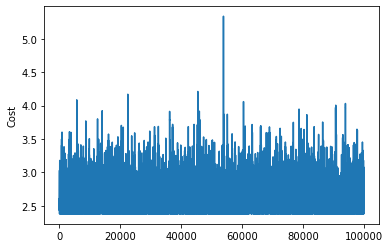

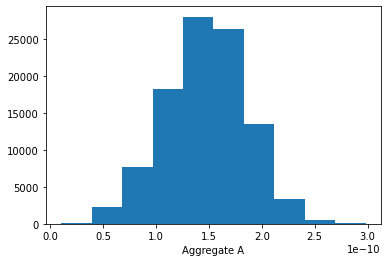

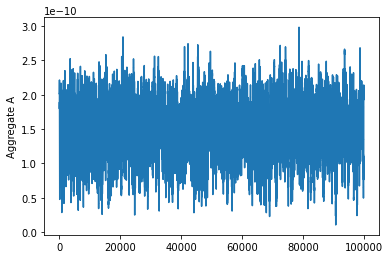

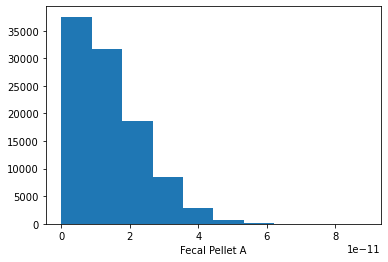

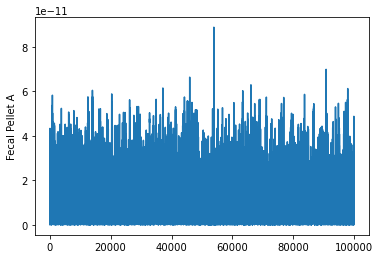

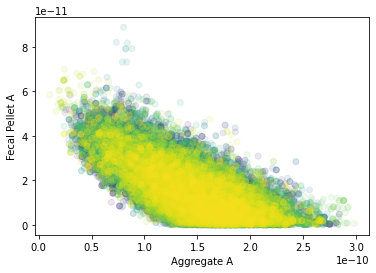

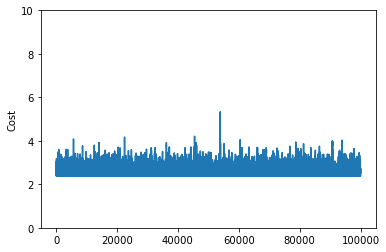

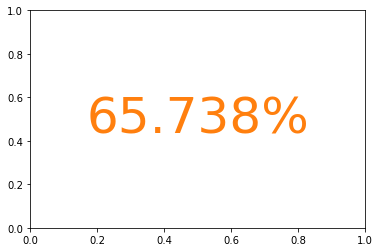

In [14]:
#McMC
#hard coding minimization procedure using Tom's script in R Example Optimization via maximum likelihood
#One A for Aggs and unknown
#One A for dense detritus and fecal pelelts 

#initialize this numpy array for the flux_fit_2A function
trap_flux = np.zeros(26) #edit this as you add more stations

#add correct B values
parameters.loc['B', 'aggregate'] = 0.8
parameters.loc['B', 'unidentified'] = 0.8

#general starting values
#x0 = [10**(-9), 10**(-9), 1, 1]

#starting values same as results of optimize.minimize
#x0 = [1.68922072e-10, 4.88499986e-12]
x0 = [1.689*10**(-10), 4.885*10**(-12)]
scale = [10**(-11),10**(-11)]
iterations = 100000#200000
exponent_scale = 5 ###new

path = "D:/GIT/NGA_particles_flux_publication/Plots/Hardcoding_A_and_B_minimization_results/"
fig_name = f"two_A_Ascale_{scale[0]}_aggAstart{x0[0]}_fpAstart{x0[1]}_exp_scale_{exponent_scale}_#{iterations}" ### new

#check if directory exists
isExist = os.path.exists(f"{path}{fig_name}")
#make directory if it doesn't exist 
if not isExist:
    # Create a new directory because it does not exist 
    os.makedirs(f"{path}{fig_name}")
    print("The new directory is created!")

counter = 0
old_cost = inf
new_parameters = x0
old_parameters = x0
header = ['agg_a','fp_a','old_cost']
tracking_table = pd.DataFrame(index = range(iterations), columns = range(len(header)))
tracking_table.columns = header

for i in range(0, iterations+1):
    new_cost, parameters, trap_flux, est_flux, residuals = flux_fit_2A(new_parameters, parameters, data2, trap_flux, vol_by_esd_type)
    new_parameters = [parameters.loc['A', 'aggregate'], parameters.loc['A', 'dense_detritus']]
    ## Better fit, replace old location with new location
    if new_cost < old_cost or np.random.rand(1) < np.exp(-exponent_scale * (new_cost - old_cost)): #-0.5 changed to - 50
        old_cost = new_cost
        old_parameters = new_parameters
    ## Either way, take a step
    new_parameters = abs(np.random.normal(loc = old_parameters, scale = scale, size = len(new_parameters)))
new_cost, parameters, trap_flux, est_flux, residuals = flux_fit_2A(new_parameters, parameters, data2, trap_flux, vol_by_esd_type)

print(new_cost)

for i in range(0, iterations+1):
    new_cost, parameters, trap_flux, est_flux, residuals = flux_fit_2A(new_parameters, parameters, data2, trap_flux, vol_by_esd_type)
    new_parameters = [parameters.loc['A', 'aggregate'], parameters.loc['A', 'dense_detritus']]
    ## Better fit, replace old location with new location
    if new_cost < old_cost or np.random.rand(1) < np.exp(-exponent_scale * (new_cost - old_cost)): #-0.5 changed to - 50
        old_cost = new_cost
        old_parameters = new_parameters
        counter = counter + 1
    ## Either way, take a step
    new_parameters = abs(np.random.normal(loc = old_parameters, scale = scale, size = len(new_parameters)))
    tracking_table.agg_a[i] = old_parameters[0]
    tracking_table.fp_a[i] = old_parameters[1]
    tracking_table.old_cost[i] = old_cost
print(tracking_table)
tracking_table.to_pickle(f"{path}{fig_name}/tracking_table_{fig_name}.pkl")
percent_accepted = counter / iterations * 100
print(f"Your percent accepted rate is {percent_accepted}%.")
print("If this number is below 23% consider decreasing one of your scale values or visa versa")

import matplotlib.pyplot as plt
plt.figure()
plt.plot(tracking_table.old_cost)
plt.ylabel("Cost")
plt.savefig(f'{path}{fig_name}/old_cost.png', dpi = 300, bbox_inches = 'tight')
plt.figure()
plt.hist(tracking_table.agg_a)
plt.xlabel("Aggregate A")
plt.savefig(f'{path}{fig_name}/agg_a_hist.png', dpi = 300, bbox_inches = 'tight')
plt.figure()
plt.plot(tracking_table.agg_a)
plt.ylabel("Aggregate A")
plt.savefig(f'{path}{fig_name}/agg_a_time.png', dpi = 300, bbox_inches = 'tight')
plt.figure()
plt.hist(tracking_table.fp_a)
plt.xlabel("Fecal Pellet A")
plt.savefig(f'{path}{fig_name}/fp_a_hist.png', dpi = 300, bbox_inches = 'tight')
plt.figure()
plt.plot(tracking_table.fp_a)
plt.ylabel("Fecal Pellet A")
plt.savefig(f'{path}{fig_name}/fp_a_time.png', dpi = 300, bbox_inches = 'tight')
plt.figure()
plt.scatter(tracking_table.agg_a, tracking_table.fp_a, c = range(0, iterations), alpha = 0.1)###New
plt.xlabel("Aggregate A")
plt.ylabel("Fecal Pellet A")
plt.savefig(f'{path}{fig_name}/agg_a_vs_fp_a.png', dpi = 300, bbox_inches = 'tight')
plt.figure()
plt.plot(tracking_table.old_cost)
plt.ylabel("Cost")
plt.ylim([0, 10])
plt.savefig(f'{path}{fig_name}/old_cost_fixed_ylim.png', dpi = 300, bbox_inches = 'tight')
plt.figure()
text_kwargs = dict(ha='center', va='center', fontsize=50, color='C1')
plt.text(0.5, 0.5, f'{percent_accepted}%', **text_kwargs)
plt.savefig(f'{path}{fig_name}/percent_accepted.png', dpi = 300, bbox_inches = 'tight')
#also save as excel doc
#tracking_table.to_excel(f'{path}{fig_name}/tracking_table.xlsx')
import math
for index1 in range(0, math.ceil(iterations/1000000)):
    print(index1)
    tracking_table[index1:index1+999999].to_excel(f'{path}{fig_name}/tracking_table.xlsx')

In [25]:
#something isn't working right here. 


#run every A/A pair to calculate flux for each
from scipy import optimize
import statistics

#set desired B values
new_parameters = parameters
new_parameters.loc['B', 'aggregate'] = 0.8
new_parameters.loc['B', 'unidentified'] = 0.8

#load data
path = "D:/GIT/NGA_particles_flux_publication/Plots/Hardcoding_A_and_B_minimization_results/"
fig_name5 = "two_A_Ascale_1e-11_aggAstart1.689e-10_fpAstart4.8849999999999995e-12_exp_scale_5_#100000"
tracking_table5 = pd.read_pickle(f"{path}{fig_name5}/tracking_table.pkl")

tracking_table6 = tracking_table5
tracking_table6["est_flux"] = tracking_table6["agg_a"]*0
tracking_table6.reset_index(drop=True, inplace = True)
for i in range(0, tracking_table6.shape[0]):
    trap_flux = np.zeros(26)
    x0 = [tracking_table6.agg_a[i], tracking_table6.fp_a[i]]
    new_cost, parameters5, trap_flux5, est_flux, residuals = flux_fit_2A(x0, new_parameters, data2, trap_flux, vol_by_esd_type)
    tracking_table6.est_flux[i] = est_flux
print(tracking_table6)
#save
tracking_table6.to_pickle(f"{path}{fig_name5}/tracking_table_est_flux.pkl")

      agg_a fp_a  old_cost                                           est_flux
0       0.0  0.0  2.470614  [709.6528594466045, 392.3286402710078, 451.831...
1       0.0  0.0  2.470614  [709.6528594466045, 392.3286402710078, 451.831...
2       0.0  0.0  2.463136  [703.0644690679412, 387.51896483172123, 454.27...
3       0.0  0.0  2.429845  [682.1090146838014, 376.1811276145605, 439.505...
4       0.0  0.0  2.429845  [682.1090146838014, 376.1811276145605, 439.505...
...     ...  ...       ...                                                ...
99995   0.0  0.0  2.460706  [698.7749291117207, 384.05379199318884, 457.76...
99996   0.0  0.0  2.460706  [698.7749291117207, 384.05379199318884, 457.76...
99997   0.0  0.0   2.57331  [760.2696156218287, 423.9406183872457, 463.447...
99998   0.0  0.0  2.518824  [737.5680745663537, 412.01546231190616, 445.41...
99999   0.0  0.0  2.518824  [737.5680745663537, 412.01546231190616, 445.41...

[100000 rows x 4 columns]


In [27]:
#load best fit value into flux_fit function to get est_trap value
from scipy import optimize
import statistics

#load data
path = "D:/GIT/NGA_particles_flux_publication/Plots/Hardcoding_A_and_B_minimization_results/"
fig_name5 = "two_A_Ascale_1e-11_aggAstart1.689e-10_fpAstart4.8849999999999995e-12_exp_scale_5_#100000"
tracking_table5 = pd.read_pickle(f"{path}{fig_name5}/tracking_table_est_flux.pkl")

x0 = [statistics.median(tracking_table5.agg_a), statistics.median(tracking_table5.fp_a)]
print(f"x0 = {x0}")

xerr=np.array([[statistics.median(tracking_table5.agg_a) - np.quantile(tracking_table5.agg_a, 0.025)],
            [np.quantile(tracking_table5.agg_a, 0.975) - statistics.median(tracking_table5.agg_a)]])
print(xerr)
fpxerr=np.array([[statistics.median(tracking_table5.fp_a) - np.quantile(tracking_table5.fp_a, 0.025)],
            [np.quantile(tracking_table5.fp_a, 0.975) - statistics.median(tracking_table5.fp_a)]])
print(fpxerr)

trap_flux = np.zeros(26) #edit this as you add more stations

new_cost, parameters, trap_flux, est_flux, residuals = flux_fit_2A(x0, new_parameters, data2, trap_flux, vol_by_esd_type)
print(f"new cost: {new_cost}")
print(f"parameters: {parameters}")
print(f"trap_flux: {trap_flux}")
print(f"est_flux: {est_flux}")
print(f"residuals: {residuals}")

x0 = [1.481946652678223e-10, 1.1964474053620624e-11]
[[7.95771528e-11]
 [7.08987508e-11]]
[[1.13710878e-11]
 [2.62941369e-11]]
new cost: 2.4900493610238295
parameters:   aggregate dense_detritus large_loose_pellet long_fecal_pellet mini_pellet  \
A       0.0            0.0                0.0               0.0         0.0   
B       0.8              1                  1                 1           1   

  phytoplankton rhizaria salp_pellet short_pellet unidentified  
A           0.0      0.0         0.0          0.0          0.0  
B         0.811    0.939           1            1          0.8  
trap_flux: [ 209.74455528  465.30192538  398.15072923  358.26955821  305.81381557
   79.6793405    79.6793405    72.33904002   72.33904002  232.17829167
  232.17829167  123.618646    123.618646    128.65996931  128.65996931
  206.435432    359.57052107  160.31688729  185.87331741   98.02641368
   85.87448668  320.23340592  143.88114759  114.44658682  481.95993371
 1038.54327353]
est_flux: [698.83

In [28]:
print(tracking_table5.est_flux)
print(tracking_table5.est_flux[0][0])

tracking_table5["est_flux1"] = tracking_table5.agg_a*0
tracking_table5["est_flux2"] = tracking_table5.agg_a*0
tracking_table5["est_flux3"] = tracking_table5.agg_a*0
tracking_table5["est_flux4"] = tracking_table5.agg_a*0
tracking_table5["est_flux5"] = tracking_table5.agg_a*0
tracking_table5["est_flux6"] = tracking_table5.agg_a*0
tracking_table5["est_flux7"] = tracking_table5.agg_a*0
tracking_table5["est_flux8"] = tracking_table5.agg_a*0
tracking_table5["est_flux9"] = tracking_table5.agg_a*0
tracking_table5["est_flux10"] = tracking_table5.agg_a*0
tracking_table5["est_flux11"] = tracking_table5.agg_a*0
tracking_table5["est_flux12"] = tracking_table5.agg_a*0
tracking_table5["est_flux13"] = tracking_table5.agg_a*0
tracking_table5["est_flux14"] = tracking_table5.agg_a*0
tracking_table5["est_flux15"] = tracking_table5.agg_a*0
tracking_table5["est_flux16"] = tracking_table5.agg_a*0
tracking_table5["est_flux17"] = tracking_table5.agg_a*0
tracking_table5["est_flux18"] = tracking_table5.agg_a*0
tracking_table5["est_flux19"] = tracking_table5.agg_a*0
tracking_table5["est_flux20"] = tracking_table5.agg_a*0
tracking_table5["est_flux21"] = tracking_table5.agg_a*0
tracking_table5["est_flux22"] = tracking_table5.agg_a*0
tracking_table5["est_flux23"] = tracking_table5.agg_a*0
tracking_table5["est_flux24"] = tracking_table5.agg_a*0
tracking_table5["est_flux25"] = tracking_table5.agg_a*0
tracking_table5["est_flux26"] = tracking_table5.agg_a*0


print(tracking_table5)

for x in range(0, tracking_table5.shape[0]):
    tracking_table5.est_flux1[x] = tracking_table5.est_flux[x][0]
for x in range(0, tracking_table5.shape[0]):
    tracking_table5.est_flux2[x] = tracking_table5.est_flux[x][1]
for x in range(0, tracking_table5.shape[0]):
    tracking_table5.est_flux3[x] = tracking_table5.est_flux[x][2]
for x in range(0, tracking_table5.shape[0]):
    tracking_table5.est_flux4[x] = tracking_table5.est_flux[x][3]
for x in range(0, tracking_table5.shape[0]):
    tracking_table5.est_flux5[x] = tracking_table5.est_flux[x][4]
for x in range(0, tracking_table5.shape[0]):
    tracking_table5.est_flux6[x] = tracking_table5.est_flux[x][5]
for x in range(0, tracking_table5.shape[0]):
    tracking_table5.est_flux7[x] = tracking_table5.est_flux[x][6]
for x in range(0, tracking_table5.shape[0]):
    tracking_table5.est_flux8[x] = tracking_table5.est_flux[x][7]
for x in range(0, tracking_table5.shape[0]):
    tracking_table5.est_flux9[x] = tracking_table5.est_flux[x][8]
for x in range(0, tracking_table5.shape[0]):
    tracking_table5.est_flux10[x] = tracking_table5.est_flux[x][9]
for x in range(0, tracking_table5.shape[0]):
    tracking_table5.est_flux11[x] = tracking_table5.est_flux[x][10]
for x in range(0, tracking_table5.shape[0]):
    tracking_table5.est_flux12[x] = tracking_table5.est_flux[x][11]
for x in range(0, tracking_table5.shape[0]):
    tracking_table5.est_flux13[x] = tracking_table5.est_flux[x][12]
for x in range(0, tracking_table5.shape[0]):
    tracking_table5.est_flux14[x] = tracking_table5.est_flux[x][13]
for x in range(0, tracking_table5.shape[0]):
    tracking_table5.est_flux15[x] = tracking_table5.est_flux[x][14]
for x in range(0, tracking_table5.shape[0]):
    tracking_table5.est_flux16[x] = tracking_table5.est_flux[x][15]
for x in range(0, tracking_table5.shape[0]):
    tracking_table5.est_flux17[x] = tracking_table5.est_flux[x][16]
for x in range(0, tracking_table5.shape[0]):
    tracking_table5.est_flux18[x] = tracking_table5.est_flux[x][17]
for x in range(0, tracking_table5.shape[0]):
    tracking_table5.est_flux19[x] = tracking_table5.est_flux[x][18]
for x in range(0, tracking_table5.shape[0]):
    tracking_table5.est_flux20[x] = tracking_table5.est_flux[x][19]
for x in range(0, tracking_table5.shape[0]):
    tracking_table5.est_flux21[x] = tracking_table5.est_flux[x][20]
for x in range(0, tracking_table5.shape[0]):
    tracking_table5.est_flux22[x] = tracking_table5.est_flux[x][21]
for x in range(0, tracking_table5.shape[0]):
    tracking_table5.est_flux23[x] = tracking_table5.est_flux[x][22]
for x in range(0, tracking_table5.shape[0]):
    tracking_table5.est_flux24[x] = tracking_table5.est_flux[x][23]
for x in range(0, tracking_table5.shape[0]):
    tracking_table5.est_flux25[x] = tracking_table5.est_flux[x][24]
for x in range(0, tracking_table5.shape[0]):
    tracking_table5.est_flux26[x] = tracking_table5.est_flux[x][25]

print(tracking_table5)
tracking_table5.to_pickle(f"{path}{fig_name5}/tracking_table_est_flux.pkl")

0        [709.6528594466045, 392.3286402710078, 451.831...
1        [709.6528594466045, 392.3286402710078, 451.831...
2        [703.0644690679412, 387.51896483172123, 454.27...
3        [682.1090146838014, 376.1811276145605, 439.505...
4        [682.1090146838014, 376.1811276145605, 439.505...
                               ...                        
99995    [698.7749291117207, 384.05379199318884, 457.76...
99996    [698.7749291117207, 384.05379199318884, 457.76...
99997    [760.2696156218287, 423.9406183872457, 463.447...
99998    [737.5680745663537, 412.01546231190616, 445.41...
99999    [737.5680745663537, 412.01546231190616, 445.41...
Name: est_flux, Length: 100000, dtype: object
709.6528594466045
      agg_a fp_a  old_cost                                           est_flux  \
0       0.0  0.0  2.470614  [709.6528594466045, 392.3286402710078, 451.831...   
1       0.0  0.0  2.470614  [709.6528594466045, 392.3286402710078, 451.831...   
2       0.0  0.0  2.463136  [703.06446906794

In [34]:
y_err = np.array([[statistics.median(tracking_table5.est_flux1) - np.quantile(tracking_table5.est_flux1, 0.025),
                  statistics.median(tracking_table5.est_flux2) - np.quantile(tracking_table5.est_flux2, 0.025),
                  statistics.median(tracking_table5.est_flux3) - np.quantile(tracking_table5.est_flux3, 0.025),
                  statistics.median(tracking_table5.est_flux4) - np.quantile(tracking_table5.est_flux4, 0.025),
                  statistics.median(tracking_table5.est_flux5) - np.quantile(tracking_table5.est_flux5, 0.025),
                  statistics.median(tracking_table5.est_flux6) - np.quantile(tracking_table5.est_flux6, 0.025),
                  statistics.median(tracking_table5.est_flux7) - np.quantile(tracking_table5.est_flux7, 0.025),
                  statistics.median(tracking_table5.est_flux8) - np.quantile(tracking_table5.est_flux8, 0.025),
                  statistics.median(tracking_table5.est_flux9) - np.quantile(tracking_table5.est_flux9, 0.025),
                  statistics.median(tracking_table5.est_flux10) - np.quantile(tracking_table5.est_flux10, 0.025),
                  statistics.median(tracking_table5.est_flux11) - np.quantile(tracking_table5.est_flux11, 0.025),
                  statistics.median(tracking_table5.est_flux12) - np.quantile(tracking_table5.est_flux12, 0.025),
                  statistics.median(tracking_table5.est_flux13) - np.quantile(tracking_table5.est_flux13, 0.025),
                  statistics.median(tracking_table5.est_flux14) - np.quantile(tracking_table5.est_flux14, 0.025),
                  statistics.median(tracking_table5.est_flux15) - np.quantile(tracking_table5.est_flux15, 0.025),
                  statistics.median(tracking_table5.est_flux16) - np.quantile(tracking_table5.est_flux16, 0.025),
                  statistics.median(tracking_table5.est_flux17) - np.quantile(tracking_table5.est_flux17, 0.025),
                  statistics.median(tracking_table5.est_flux18) - np.quantile(tracking_table5.est_flux18, 0.025),
                  statistics.median(tracking_table5.est_flux19) - np.quantile(tracking_table5.est_flux19, 0.025),
                  statistics.median(tracking_table5.est_flux20) - np.quantile(tracking_table5.est_flux20, 0.025),
                  statistics.median(tracking_table5.est_flux21) - np.quantile(tracking_table5.est_flux21, 0.025),
                  statistics.median(tracking_table5.est_flux22) - np.quantile(tracking_table5.est_flux22, 0.025),
                  statistics.median(tracking_table5.est_flux23) - np.quantile(tracking_table5.est_flux23, 0.025),
                  statistics.median(tracking_table5.est_flux24) - np.quantile(tracking_table5.est_flux24, 0.025),
                  statistics.median(tracking_table5.est_flux25) - np.quantile(tracking_table5.est_flux25, 0.025),
                  statistics.median(tracking_table5.est_flux26) - np.quantile(tracking_table5.est_flux26, 0.025)],
            [np.quantile(tracking_table5.est_flux1, 0.975) - statistics.median(tracking_table5.est_flux1),
            np.quantile(tracking_table5.est_flux2, 0.975) - statistics.median(tracking_table5.est_flux2),
             np.quantile(tracking_table5.est_flux3, 0.975) - statistics.median(tracking_table5.est_flux3), 
             np.quantile(tracking_table5.est_flux4, 0.975) - statistics.median(tracking_table5.est_flux4), 
             np.quantile(tracking_table5.est_flux5, 0.975) - statistics.median(tracking_table5.est_flux5), 
             np.quantile(tracking_table5.est_flux6, 0.975) - statistics.median(tracking_table5.est_flux6), 
             np.quantile(tracking_table5.est_flux7, 0.975) - statistics.median(tracking_table5.est_flux7), 
             np.quantile(tracking_table5.est_flux8, 0.975) - statistics.median(tracking_table5.est_flux8), 
             np.quantile(tracking_table5.est_flux9, 0.975) - statistics.median(tracking_table5.est_flux9), 
             np.quantile(tracking_table5.est_flux10, 0.975) - statistics.median(tracking_table5.est_flux10),
             np.quantile(tracking_table5.est_flux11, 0.975) - statistics.median(tracking_table5.est_flux11),
             np.quantile(tracking_table5.est_flux12, 0.975) - statistics.median(tracking_table5.est_flux12),
             np.quantile(tracking_table5.est_flux13, 0.975) - statistics.median(tracking_table5.est_flux13), 
             np.quantile(tracking_table5.est_flux14, 0.975) - statistics.median(tracking_table5.est_flux14), 
             np.quantile(tracking_table5.est_flux15, 0.975) - statistics.median(tracking_table5.est_flux15), 
             np.quantile(tracking_table5.est_flux16, 0.975) - statistics.median(tracking_table5.est_flux16), 
             np.quantile(tracking_table5.est_flux17, 0.975) - statistics.median(tracking_table5.est_flux17), 
             np.quantile(tracking_table5.est_flux18, 0.975) - statistics.median(tracking_table5.est_flux18), 
             np.quantile(tracking_table5.est_flux19, 0.975) - statistics.median(tracking_table5.est_flux19), 
             np.quantile(tracking_table5.est_flux20, 0.975) - statistics.median(tracking_table5.est_flux20),
             np.quantile(tracking_table5.est_flux21, 0.975) - statistics.median(tracking_table5.est_flux21),
             np.quantile(tracking_table5.est_flux22, 0.975) - statistics.median(tracking_table5.est_flux22),
             np.quantile(tracking_table5.est_flux23, 0.975) - statistics.median(tracking_table5.est_flux23), 
             np.quantile(tracking_table5.est_flux24, 0.975) - statistics.median(tracking_table5.est_flux24), 
             np.quantile(tracking_table5.est_flux25, 0.975) - statistics.median(tracking_table5.est_flux25), 
             np.quantile(tracking_table5.est_flux26, 0.975) - statistics.median(tracking_table5.est_flux26)]])
print(y_err)
print(y_err.shape)

print(np.array([[y_err[0, 0]],[y_err[1, 0]]]))
xerr=np.array([[statistics.median(tracking_table5.agg_a) - np.quantile(tracking_table5.agg_a, 0.025)],
            [np.quantile(tracking_table5.agg_a, 0.975) - statistics.median(tracking_table5.agg_a)]])
print(xerr)
print(np.array([[40],[10]]))
print(np.array([[40],[10]]).shape)

[[164.85314027  95.38088418 125.39216921 146.66658974 110.97407735
   37.75460747  71.49162147  18.50630765  23.94925324  44.35514369
   84.68669655  35.9877626   84.29612044  35.82098709  57.56519276
   44.87509625  24.25756013  39.95936451  33.77140907  69.5964397
   45.80261007  30.64658195  12.80833361  27.58938284  41.62778408
  343.86284254]
 [212.86596849 126.89563049 140.10735543 193.96847664 142.08600922
   48.30417871  91.82192373  19.6645048   30.08141551  56.5211882
  112.78925145  61.13969291 129.59520792  45.99073715  75.77256716
   56.31026849  32.25945681  55.01861339  55.90797641  84.99006509
   59.95690783  37.99867596  20.29453031  34.49979468  50.32302044
  330.65940651]]
(2, 26)
[[164.85314027]
 [212.86596849]]
[[7.95771528e-11]
 [7.08987508e-11]]
[[40]
 [10]]
(2, 1)


In [12]:
#plotting model results

#import packages
import statistics
import matplotlib as mpl
from scipy import optimize

#load data
path = "D:/GIT/NGA_particles_flux_publication/Plots/Hardcoding_A_and_B_minimization_results/"
fig_name2 = "two_A_Ascale_1e-11_aggAstart1.689e-10_fpAstart4.8849999999999995e-12_exp_scale_5_#100000"
tracking_table2 = pd.read_pickle(f"{path}{fig_name2}/tracking_table.pkl")
#print(tracking_table2)

#set desired B values
new_parameters = parameters
new_parameters.loc['B', 'aggregate'] = 0.8
new_parameters.loc['B', 'unidentified'] = 0.8

#format data for contourf
agg_a = np.arange(0, 4e-10, 4e-10/25)
#print(a.shape)
fp_a = np.arange(0, 1e-10, 1e-10/25)
#print(b)
Agg_A, FP_A = np.meshgrid(agg_a, fp_a)
#print(B.shape)
Z = Agg_A * 0
#print(Z)
trap_flux = np.zeros(26) #edit this as you add more stations
for x1 in range(0, Agg_A.shape[0]):
    for y1 in range(0, Agg_A.shape[1]):
        x0 = [Agg_A[x1,y1], FP_A[x1,y1]]
        this, pi, trap_flux, est_flux, residuals = flux_fit_2A(x0, new_parameters, data2, trap_flux, vol_by_esd_type)
        Z[x1,y1] = this
print(Z)

[[136.28355937  28.60148906  16.26087346  10.6863519    7.55266791
    5.61588206   4.36323401   3.5400041    3.00393268   2.66885464
    2.47936804   2.39817762   2.39924657   2.46385268   2.57820015
    2.73191215   2.91704586   3.12742943   3.35820426   3.60550178
    3.86621083   4.13780725   4.41822711   4.70577112   4.99903162]
 [ 37.32099077  18.13585317  11.52411269   8.00939122   5.88797826
    4.53161225   3.64444605   3.06637171   2.70239926   2.49233681
    2.39609985   2.38593559   2.44201845   2.54981684   2.6984482
    2.87961297   3.08688209   3.31520785   3.56058035   3.81978117
    4.09020372   4.36971995   4.65658019   4.94933677   5.24678529]
 [ 23.36718528  13.08662748   8.777042     6.32770112   4.80220052
    3.81627558   3.17571796   2.76992594   2.5306891    2.41344609
    2.3877804    2.43219974   2.53108624   2.672825     2.84860848
    3.0516466    3.27662965   3.51935403   3.77645589   4.0452178
    4.3234262    4.60926467   4.90123297   5.19808481   5.4987

findfont: Font family ['helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['helvetica'] not found. Falling back to DejaVu Sans.


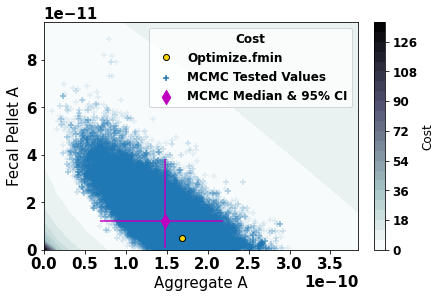

In [15]:
#plot results

#Import packages
import matplotlib.pyplot as plt
import statistics

origin = 'lower'
nr, nc = Z.shape
fig1, ax2 = plt.subplots(constrained_layout=True)
font = {'family' : 'helvetica', 'weight' : 'bold', 'size'   : 12}
plt.rc('font', **font)
CS = ax2.contourf(Agg_A, FP_A, Z, 25, cmap=plt.cm.bone_r, origin=origin)
plt.xlabel("Aggregate A")
plt.ylabel("Fecal Pellet A")
#add model results
cost = plt.scatter(tracking_table2.agg_a, tracking_table2.fp_a,marker = '+', 
                   alpha = 0.1, label = "MCMC Tested Values")
#superimpose minimum model result value
#find minimum cost then get a and b at that value
#loc = tracking_table2[tracking_table2['old_cost']==min(tracking_table2.old_cost)].index.values
#min_mod = plt.plot(tracking_table2.a[loc[0]], tracking_table2.b[loc[0]],marker = 's', markerfacecolor=None, markeredgecolor = 'r', 
#                   markeredgewidth=2, label = "MCMC Minimum", linestyle="None")
#superimpose optimum minimum value
opt_min = plt.plot(1.689e-10, 4.8849999999999995e-12,marker = 'o', markerfacecolor = 'gold', markeredgecolor = 'k',
                   label = "Optimize.fmin", linestyle="None")
#superimpose mean model result and 95% confidence interval
#add 95% CI

plt.errorbar(statistics.median(tracking_table2.agg_a), statistics.median(tracking_table2.fp_a),
            xerr=np.array([[statistics.median(tracking_table2.agg_a) - np.quantile(tracking_table2.agg_a, 0.025)],
            [np.quantile(tracking_table2.agg_a, 0.975) - statistics.median(tracking_table2.agg_a)]]),
            yerr=np.array([[statistics.median(tracking_table2.fp_a) - np.quantile(tracking_table2.fp_a, 0.025)],
            [np.quantile(tracking_table2.fp_a, 0.975) - statistics.median(tracking_table2.fp_a)]]),
                           ecolor='m')

mean_mod = plt.scatter(statistics.median(tracking_table2.agg_a), 
                       statistics.median(tracking_table2.fp_a),marker = 'd', c = 'm', s = 100, 
                      label = "MCMC Median & 95% CI")
###########plt.xlim([0, 5e-06])

# Make a colorbar for the ContourSet returned by the contourf call.
cbar = fig1.colorbar(CS)
cbar.ax.set_ylabel('Cost')

#make legend
leg = plt.legend(loc='upper right', title = "Cost")
for lh in leg.legendHandles: 
    lh.set_alpha(1)

plt.savefig(f'{path}{fig_name2}/agg_a_vs_fp_a_model_results_comparison.png', dpi = 300, bbox_inches = 'tight')

In [79]:
#format data for contourf
agg_a = np.arange(0, 5e-10, 5e-10/25)
#print(a.shape)
fp_a = np.arange(0, 10e-10, 10e-10/25)
#print(b)
Agg_A, FP_A = np.meshgrid(agg_a, fp_a)
#print(B.shape)
Z = Agg_A * 0
#print(Z)
trap_flux = np.zeros(26) #edit this as you add more stations
for x1 in range(0, Agg_A.shape[0]):
    for y1 in range(0, Agg_A.shape[1]):
        x0 = [Agg_A[x1,y1], FP_A[x1,y1]]
        this, pi, trap_flux, est_flux, residuals = flux_fit_2A(x0, new_parameters, data2, trap_flux, vol_by_esd_type)
        Z[x1,y1] = this
print(Z)

[[136.28355937  24.27526668  13.03043607   8.19412724   5.61588206
    4.12404646   3.24238905   2.73719027   2.47936804   2.39156698
    2.42456431   2.5455653    2.73191215   2.96748394   3.24052984
    3.5423097    3.86621083   4.207157     4.56120267   4.92524826
    5.29683618   5.67400247   6.05516699   6.43905106   6.82461504]
 [  4.47927911   3.74551047   3.47599192   3.42743604   3.50945884
    3.67672657   3.90287502   4.17114856   4.47024813   4.79222463
    5.13130542   5.48319408   5.84462991   6.21309898   6.58663797
    6.96369737   7.34304357   7.7236875    8.10483168   8.48583023
    8.8661584    9.24538898   9.62317383   9.99922939  10.37332506]
 [  5.95739854   5.99493641   6.15500876   6.38382754   6.65586455
    6.95683267   7.27788557   7.61316208   7.95858752   8.31122672
    8.66890726   9.02998705   9.39320416   9.75757595  10.1223293
   10.48685098  10.85065161  11.21333894  11.57459774  11.93417442
   12.29186513  12.64750647  13.00096806  13.35214675  13.700

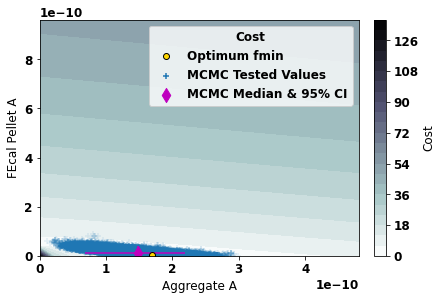

In [101]:
#plot results

#Import packages
import matplotlib.pyplot as plt
import statistics

origin = 'lower'
nr, nc = Z.shape
fig1, ax2 = plt.subplots(constrained_layout=True)
CS = ax2.contourf(Agg_A, FP_A, Z, 25, cmap=plt.cm.bone_r, origin=origin)
plt.xlabel("Aggregate A")
plt.ylabel("FEcal Pellet A")
#add model results
cost = plt.scatter(tracking_table2.agg_a, tracking_table2.fp_a,marker = '+', 
                   alpha = 0.1, label = "MCMC Tested Values")
#superimpose minimum model result value
#find minimum cost then get a and b at that value
#loc = tracking_table2[tracking_table2['old_cost']==min(tracking_table2.old_cost)].index.values
#min_mod = plt.plot(tracking_table2.a[loc[0]], tracking_table2.b[loc[0]],marker = 's', markerfacecolor=None, markeredgecolor = 'r', 
#                   markeredgewidth=2, label = "MCMC Minimum", linestyle="None")
#superimpose optimum minimum value
opt_min = plt.plot(1.689e-10, 4.8849999999999995e-12,marker = 'o', markerfacecolor = 'gold', markeredgecolor = 'k', label = "Optimum fmin",
                  linestyle="None")
#superimpose mean model result and 95% confidence interval
#add 95% CI

plt.errorbar(statistics.median(tracking_table2.agg_a), statistics.median(tracking_table2.fp_a),
            xerr=np.array([[statistics.median(tracking_table2.agg_a) - np.quantile(tracking_table2.agg_a, 0.025)],
            [np.quantile(tracking_table2.agg_a, 0.975) - statistics.median(tracking_table2.agg_a)]]),
            yerr=np.array([[statistics.median(tracking_table2.fp_a) - np.quantile(tracking_table2.fp_a, 0.025)],
            [np.quantile(tracking_table2.fp_a, 0.975) - statistics.median(tracking_table2.fp_a)]]),
                           ecolor='m')

mean_mod = plt.scatter(statistics.median(tracking_table2.agg_a), 
                       statistics.median(tracking_table2.fp_a),marker = 'd', c = 'm', s = 100, 
                      label = "MCMC Median & 95% CI")

# Make a colorbar for the ContourSet returned by the contourf call.
cbar = fig1.colorbar(CS)
cbar.ax.set_ylabel('Cost')

#make legend
leg = plt.legend(loc='upper right', title = "Cost")
for lh in leg.legendHandles: 
    lh.set_alpha(1)

plt.savefig(f'{path}{fig_name2}/agg_a_vs_fp_a_model_results_comparison_wider_limits.png', dpi = 300, bbox_inches = 'tight')

In [83]:
#model summary
#import packages
import statistics
import matplotlib as mpl
from scipy import optimize

#load data
path = "D:/GIT/NGA_particles_flux_publication/Plots/Hardcoding_A_and_B_minimization_results/"
fig_name2 = "two_A_Ascale_1e-11_aggAstart1.689e-10_fpAstart4.8849999999999995e-12_exp_scale_5_#100000"
tracking_table2 = pd.read_pickle(f"{path}{fig_name2}/tracking_table.pkl")
#print(tracking_table2)

col_names = ['model_type', 'A_scale', 'Agg_A_start', 'FP_A_start', 'exp_scale','iterations','Agg_A_median',
                'Agg_A_low', 'Agg_A_high','FP_A_median','FP_A_low', 'FP_A_high']
df = pd.DataFrame(index = range(1), columns = range(len(col_names)))
df.columns = col_names
df.model_type[0] = "Two As"
df.A_scale[0] = 1e-11
df.Agg_A_start[0] = 1.689e-10
df.FP_A_start[0] = 4.8849999999999995e-12
df.exp_scale[0] = 5
df.iterations[0] = 100000
df.Agg_A_median[0] = statistics.median(tracking_table2.agg_a)
df.Agg_A_low[0] = statistics.median(tracking_table2.agg_a) - np.quantile(tracking_table2.agg_a, 0.025)
df.Agg_A_high[0] = np.quantile(tracking_table2.agg_a, 0.975) - statistics.median(tracking_table2.agg_a)
df.FP_A_median[0] = statistics.median(tracking_table2.fp_a)
df.FP_A_low[0] = statistics.median(tracking_table2.fp_a) - np.quantile(tracking_table2.fp_a, 0.025)
df.FP_A_high[0] = np.quantile(tracking_table2.fp_a, 0.975) - statistics.median(tracking_table2.fp_a)
print(df)
df.to_excel(f'{path}{fig_name2}/model_summary.xlsx')

  model_type A_scale Agg_A_start FP_A_start exp_scale iterations Agg_A_median  \
0     Two As     0.0         0.0        0.0         5     100000          0.0   

  Agg_A_low Agg_A_high FP_A_median FP_A_low FP_A_high  
0       0.0        0.0         0.0      0.0       0.0  


In [106]:
#table_with_test_values

def V_sphere(ESD): 
    return (4/3)*np.pi*(ESD/2)**3
def V_llfp(ESD):
    w = (553 * ESD)/(ESD+996)
    l = (np.pi*(ESD/2)**2)/w
    return l*np.pi*(w/2)**2
def V_lfp(ESD):
    w = (187*ESD)/(ESD + 424)
    l = (np.pi*(ESD/2)**2)/w
    return l*np.pi*(w/2)**2
def V_ellipsoid(ESD):
    w = (0.54 * ESD)
    l = ESD**2/w
    return (4/3)*(l/2)*np.pi*(w/2)**2

col_names = ['ESD_um', 'Agg_ugC', 'Long_FP_ugC', 'Large_loose_FP_ugC', 'Short_FP_ugC', 'Mini_FP_ugC']
#sphere, lfp, llfp, ellipsoid, sphere
df = pd.DataFrame(index = range(11), columns = range(len(col_names)))
df.columns = col_names
size = [5, 10, 20, 50, 100, 200, 500, 750, 1000, 2000, 3000]
for x1 in range(0, 11):
    df.ESD_um[x1] = size[x1]
    V = V_sphere(size[x1])
    df.Agg_ugC[x1] = ((statistics.median(tracking_table2.agg_a))*V**0.8)*1000
    df.Mini_FP_ugC[x1] = ((statistics.median(tracking_table2.fp_a))*V**1)*1000
    V = V_lfp(size[x1])
    df.Long_FP_ugC[x1] = ((statistics.median(tracking_table2.fp_a))*V**1)*1000   
    V = V_llfp(size[x1])
    df.Large_loose_FP_ugC[x1] = ((statistics.median(tracking_table2.fp_a))*V**1)*1000
    V = V_ellipsoid(size[x1])
    df.Short_FP_ugC[x1] = ((statistics.median(tracking_table2.fp_a))*V**1)*1000

print(df)
df.to_excel(f'{path}{fig_name2}/ESD_to_C_testing.xlsx')

   ESD_um    Agg_ugC Long_FP_ugC Large_loose_FP_ugC Short_FP_ugC Mini_FP_ugC
0       5   0.000004         0.0           0.000001          0.0    0.000001
1      10   0.000022    0.000003           0.000004     0.000003    0.000006
2      20   0.000117    0.000025           0.000032     0.000027     0.00005
3      50   0.001056    0.000364           0.000488     0.000423    0.000783
4     100   0.005572    0.002634           0.003724     0.003383    0.006265
5     200   0.029411    0.017694             0.0273     0.027063    0.050117
6     500   0.265191    0.186704           0.341018     0.422859    0.783073
7     750   0.701744    0.495942           0.986139     1.427151    2.642871
8    1000   1.399689    0.969181           2.044739     3.382875    6.264584
9    2000   7.387601    4.554832          10.897997    27.063003   50.116672
10   3000  19.548907   10.882909          27.576351    91.337634  169.143767


In [10]:
#minimization function

#function that goes from total carbon / particle to c flux/particle
def flux_fit(unknown, pi, data,trap_flux,vol_calc):
    index = 0
    est_flux = []
    carbon =  np.zeros(len(data));
    def V2C(N,A,B,V):
        C = N*A*V**B
        return(C)
    #adding some values and variables to the table
    pi.loc['A', 'aggregate'] = unknown[0]
    pi.loc['A', 'dense_detritus'] = unknown[1]
    pi.loc['A', 'large_loose_pellet'] = unknown[1]
    pi.loc['A', 'long_fecal_pellet'] = unknown[1]
    pi.loc['A', 'mini_pellet'] = unknown[1]
    pi.loc['A', 'short_pellet'] = unknown[1]
    pi.loc['A', 'unidentified'] = unknown[0]
    pi.loc['B', 'aggregate'] = unknown[2]
    pi.loc['B', 'dense_detritus'] = unknown[3]
    pi.loc['B', 'large_loose_pellet'] = unknown[3]
    pi.loc['B', 'long_fecal_pellet'] = unknown[3]
    pi.loc['B', 'mini_pellet'] = unknown[3]
    pi.loc['B', 'short_pellet'] = unknown[3]
    pi.loc['B', 'unidentified'] = unknown[2]

#    for x in [np.unique(data.station)[1], np.unique(data.station)[5], np.unique(data.station)[2], np.unique(data.station)[4], np.unique(data.station)[0], np.unique(data.station)[3]]: #  np.unique(data.station):
    for x in np.unique(data.station):
        data_1station = data[data["station"] == x]
        meta_station = cruise_meta[cruise_meta["Station"] == x]
        cast = meta_station.Cast.astype(np.int64).reset_index(drop=True)
        cast2 = cast.item()
        #output_conc = pd.read_pickle(f"D:/GIT/NGA_particles_flux_publication/Data/SKQ201915S_{x}_uvp_conc_backgroundsub_edge_thresh.pkl")
        for x1 in np.unique(data_1station.depth):
            #meta_depth = depth_level[(depth_level["Cast"] == cast2) & (depth_level["Depth (m)"] == float(x1))]
            data_1depth = data_1station[data_1station["depth"] == x1]
            #data_1depth = data_1depth.reset_index()
            C = np.array([])
            for x3 in np.unique(data_1depth.tube):
                trap_flux[index] = depth_level[(depth_level["Cast"] == cast2) & (depth_level["Depth (m)"] == float(x1))]["Average POC Flux (mg C m^-2 d^-1)"]
                data_1tube =  data_1depth[data_1depth["tube"] == x3]
                #data_1tube = data_1tube.reset_index()
                #start here-sum of all types (sum of all sizes ( number flux * a (ESD to vol)^b ))
                for x2 in particle_types:
                    V = np.array(vol_calc.loc[:,x2], dtype = float)
                    A = pi[x2][0]
                    B = pi[x2][1]
                    N = np.array(data_1tube[f'{x2}_number_counted'], dtype = float)
                    C = np.concatenate((C, V2C(N,A,B,V)), axis = 0)
                est_flux.append((C.sum(axis = 0)*float(data_1tube.imaged_area.iloc[0]))/(cruise_meta.Cast[11] * float(meta_station["Deployment Length (Days)"])))
                #est_flux[index] = carbon.sum(axis = 0) # don't convert to flux
                #est_flux.append(carbon.sum(axis = 0))            
                index = index + 1
    residuals=np.log10(trap_flux)-np.log10(est_flux)
    #residuals = trap_flux - est_flux
    this=sum(residuals**2)
    return this, pi, trap_flux, est_flux, residuals

In [9]:
#script to call minimization function

#data2 needs index size of 26?

#unknown = [10**(-9), 10**(-9), 1, 1]
#sol = flux_fit(unknown, parameters, data2)


#data_1station = data2[(data2["station"] == 'GAK1') | (data2["station"] == 'GAK15')  | (data2["station"] == 'GAK5') | (data2["station"] == 'KOD5') ] #| (data2["station"] == 'GAK5')
#print(data_1station)


from scipy import optimize
x0 = [10**(-9), 10**(-9), 1, 1]

trap_flux = np.zeros(26) #edit this as you add more stations
#sol = optimize.fmin(flux_fit, x0, args=(parameters, data2), maxfun = 10000, retall = False, full_output = True ) #, method = 'TNC'


sol = optimize.minimize(flux_fit, x0, args=(parameters, data2, trap_flux, vol_by_esd_type) , method = 'L-BFGS-B', 
                        bounds = ((0, 1), (0, 1), (0, 5), (0,5),), options = {'eps': 1e-12, "maxfun": 10000, 
                                                                                        "retall": False, "full_output": True})#, 'ftol': 1e-4})# (0, 1))) ,jac = None, method = 'TNC'
#sol = optimize.minimize(flux_fit, x0, args=(parameters, data2, trap_flux, vol_by_esd_type) , method = 'L-BFGS-B', bounds = ((0, 1), (0, 1), (0, 5), (0,5),), options = {'eps': 1e-20, "maxfun": 10000, "retall": False, "full_output": True})# (0, 1))) ,jac = None, method = 'TNC'


#sol = optimize.fmin_l_bfgs_b(flux_fit, x0, args=(parameters, data_1station),bounds = [(0, 1), (0, 1), (0, 5), (0,5)], maxfun = 10000,approx_grad = True,  iprint = 0, epsilon = 1e-12) #

print(sol)

C:\Users\STEPHA~1\AppData\Local\Temp/ipykernel_7812/1865438151.py:20: OptimizeWarning: Unknown solver options: retall, full_output
  sol = optimize.minimize(flux_fit, x0, args=(parameters, data2, trap_flux, vol_by_esd_type) , method = 'L-BFGS-B',


      fun: 2.519926608370181
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.89544806e+08,  1.71867245e+06,  1.85411347e+00,  2.26046408e-01])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 175
      nit: 8
     njev: 35
   status: 0
  success: True
        x: array([6.57467169e-11, 9.05303612e-12, 8.46849322e-01, 9.82432135e-01])


12.475749957163648
  agg_a fp_a  agg_b   fp_b  old_cost
0   0.0  0.0  0.847  0.982  2.520032
Your percent accepted rate is 0.0%.
If this number is below 23% consider decreasing one of your scale values or visa versa


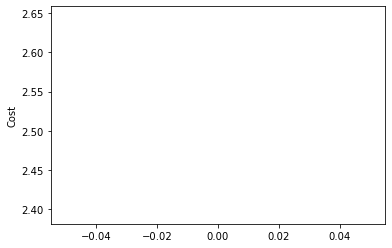

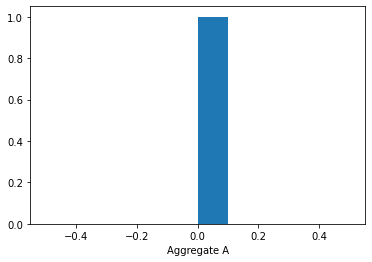

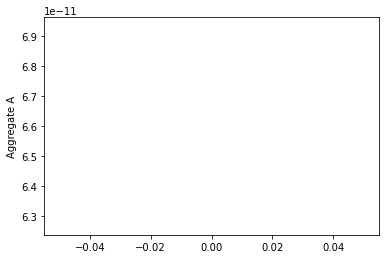

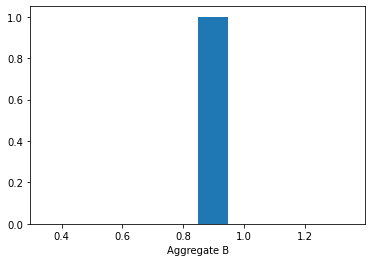

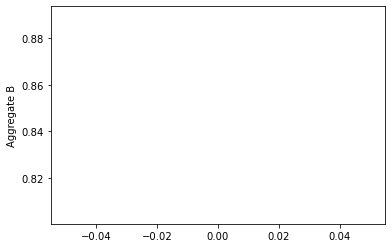

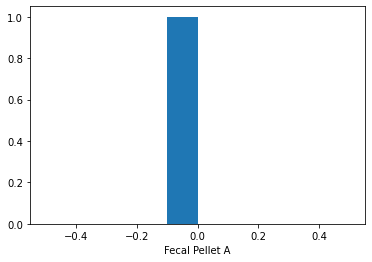

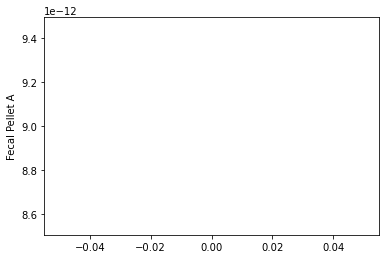

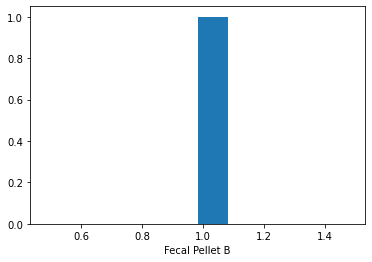

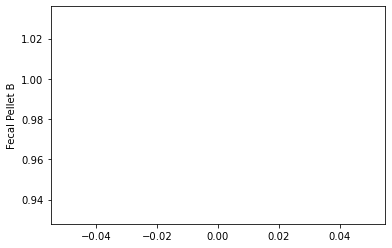

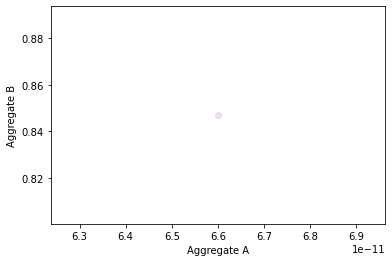

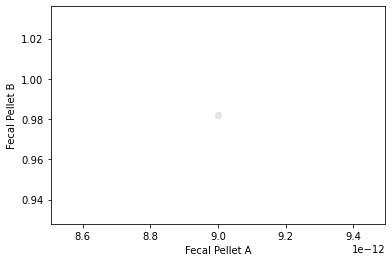

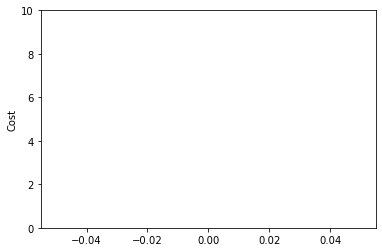

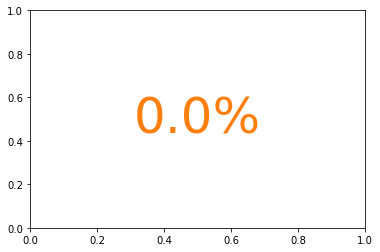

In [13]:
#hard coding minimization procedure using Tom's script in R Example Optimization via maximum likelihood
#One A and B for Aggs and unknown
#One A and B for dense detritus and fecal pelelts 

#initialize this numpy array for the flux_fit function
trap_flux = np.zeros(26) #edit this as you add more stations

#general starting values
#x0 = [10**(-9), 10**(-9), 1, 1]

#starting values same as results of optimize.minimize
x0 = [0.066*10**(-9), 0.009*10**(-9), 0.847, 0.982]#######################################################

#try playing around with b value for scale maybe 0.0005 next
scale = [10**(-10),10**(-10), 0.005,0.005]
iterations = 1#10000#200000
exponent_scale = 300 ###new
path = "D:/GIT/NGA_particles_flux_publication/Plots/Hardcoding_A_and_B_minimization_results/"
fig_name = f"two_A&B_Ascale_{scale[0]}_Bscale_{scale[2]}_Astart{x0[0]}_Bstart{x0[2]}_exp_scale_{exponent_scale}_#{iterations}" ### new

#check if directory exists
isExist = os.path.exists(f"{path}{fig_name}")
#make directory if it doesn't exist 
if not isExist:
    # Create a new directory because it does not exist 
    os.makedirs(f"{path}{fig_name}")
    print("The new directory is created!")

counter = 0
old_cost = inf
new_parameters = x0
old_parameters = x0
header = ['agg_a','fp_a','agg_b','fp_b','old_cost']
tracking_table = pd.DataFrame(index = range(iterations), columns = range(len(header)))
tracking_table.columns = header

for i in range(0, iterations+1):
    new_cost, parameters, trap_flux, est_flux, residuals = flux_fit(new_parameters, parameters, data2, trap_flux, vol_by_esd_type)
    new_parameters = [parameters.loc['A', 'aggregate'], parameters.loc['A', 'dense_detritus'],
                      parameters.loc['B', 'aggregate'], parameters.loc['B', 'dense_detritus']]
    ## Better fit, replace old location with new location
    if new_cost < old_cost or np.random.rand(1) < np.exp(-exponent_scale * (new_cost - old_cost)): #-0.5 changed to - 50
        old_cost = new_cost
        old_parameters = new_parameters
    ## Either way, take a step
    new_parameters = np.random.normal(loc = old_parameters, scale = scale, size = len(new_parameters))
new_cost, parameters, trap_flux, est_flux, residuals = flux_fit(new_parameters, parameters, data2, trap_flux, vol_by_esd_type)

print(new_cost)

for i in range(0, iterations+1):
    new_cost, parameters, trap_flux, est_flux, residuals = flux_fit(new_parameters, parameters, data2, trap_flux, vol_by_esd_type)
    new_parameters = [parameters.loc['A', 'aggregate'], parameters.loc['A', 'dense_detritus'],
                      parameters.loc['B', 'aggregate'], parameters.loc['B', 'dense_detritus']]
    ## Better fit, replace old location with new location
    if new_cost < old_cost or np.random.rand(1) < np.exp(-exponent_scale * (new_cost - old_cost)): #-0.5 changed to - 50
        old_cost = new_cost
        old_parameters = new_parameters
        counter = counter + 1
    ## Either way, take a step
    new_parameters = np.random.normal(loc = old_parameters, scale = scale, size = len(new_parameters))
    tracking_table.agg_a[i] = old_parameters[0]
    tracking_table.fp_a[i] = old_parameters[1]
    tracking_table.agg_b[i] = old_parameters[2]
    tracking_table.fp_b[i] = old_parameters[3]
    tracking_table.old_cost[i] = old_cost
print(tracking_table)
tracking_table.to_pickle(f"{path}{fig_name}/tracking_table_{fig_name}.pkl")
percent_accepted = counter / iterations * 100
print(f"Your percent accepted rate is {percent_accepted}%.")
print("If this number is below 23% consider decreasing one of your scale values or visa versa")

import matplotlib.pyplot as plt
plt.figure()
plt.plot(tracking_table.old_cost)
plt.ylabel("Cost")
plt.savefig(f'{path}{fig_name}/old_cost_{fig_name}.png', dpi = 300, bbox_inches = 'tight')
plt.figure()
plt.hist(tracking_table.agg_a)
plt.xlabel("Aggregate A")
plt.savefig(f'{path}{fig_name}/agg_a_hist_{fig_name}.png', dpi = 300, bbox_inches = 'tight')
plt.figure()
plt.plot(tracking_table.agg_a)
plt.ylabel("Aggregate A")
plt.savefig(f'{path}{fig_name}/agg_a_time_{fig_name}.png', dpi = 300, bbox_inches = 'tight')
plt.figure()
plt.hist(tracking_table.agg_b)
plt.xlabel("Aggregate B")
plt.savefig(f'{path}{fig_name}/agg_b_hist_{fig_name}.png', dpi = 300, bbox_inches = 'tight')
plt.figure()
plt.plot(tracking_table.agg_b)
plt.ylabel("Aggregate B")
plt.savefig(f'{path}{fig_name}/agg_b_time_{fig_name}.png', dpi = 300, bbox_inches = 'tight')
plt.figure()
plt.hist(tracking_table.fp_a)
plt.xlabel("Fecal Pellet A")
plt.savefig(f'{path}{fig_name}/fp_a_hist_{fig_name}.png', dpi = 300, bbox_inches = 'tight')
plt.figure()
plt.plot(tracking_table.fp_a)
plt.ylabel("Fecal Pellet A")
plt.savefig(f'{path}{fig_name}/fp_a_time_{fig_name}.png', dpi = 300, bbox_inches = 'tight')
plt.figure()
plt.hist(tracking_table.fp_b)
plt.xlabel("Fecal Pellet B")
plt.savefig(f'{path}{fig_name}/fp_b_hist_{fig_name}.png', dpi = 300, bbox_inches = 'tight')
plt.figure()
plt.plot(tracking_table.fp_b)
plt.ylabel("Fecal Pellet B")
plt.savefig(f'{path}{fig_name}/fp_b_time_{fig_name}.png', dpi = 300, bbox_inches = 'tight')
#new lines of code
plt.figure()
plt.scatter(tracking_table.agg_a, tracking_table.agg_b, c = range(0, iterations), alpha = 0.1)###New
plt.xlabel("Aggregate A")
plt.ylabel("Aggregate B")
plt.savefig(f'{path}{fig_name}/agg_a_vs_b_{fig_name}.png', dpi = 300, bbox_inches = 'tight')
plt.figure()
plt.scatter(tracking_table.fp_a, tracking_table.fp_b, c = range(0, iterations), alpha = 0.1)###New
plt.xlabel("Fecal Pellet A")
plt.ylabel("Fecal Pellet B")
plt.savefig(f'{path}{fig_name}/fp_a_vs_b_{fig_name}.png', dpi = 300, bbox_inches = 'tight')
plt.figure()
plt.plot(tracking_table.old_cost)
plt.ylabel("Cost")
plt.ylim([0, 10])
plt.savefig(f'{path}{fig_name}/old_cost_fixed_ylim_{fig_name}.png', dpi = 300, bbox_inches = 'tight')
plt.figure()
text_kwargs = dict(ha='center', va='center', fontsize=50, color='C1')
plt.text(0.5, 0.5, f'{percent_accepted}%', **text_kwargs)
plt.savefig(f'{path}{fig_name}/percent_accepted_{fig_name}.png', dpi = 300, bbox_inches = 'tight')
#end of new lines of code
#also save as excel doc
tracking_table.to_excel(f'{path}{fig_name}/tracking_table.xlsx')

In [23]:
#run every A/B pair to calculate flux for each
from scipy import optimize
import statistics

#load data
path = "D:/GIT/NGA_particles_flux_publication/Plots/Hardcoding_A_and_B_minimization_results/"
fig_name5 = "two_A_B_Ascale_1e-10_Bscale_0.005_Astart1.0712151377499967e-07_Bstart0.3936600848310677_exp_scale_300_#6000000"
tracking_table5 = pd.read_pickle(f"{path}{fig_name5}/tracking_table.pkl")

tracking_table6 = tracking_table5.iloc[::100]
tracking_table6["est_flux"] = tracking_table6["agg_a"]*0
tracking_table6.reset_index(drop=True, inplace = True)
for i in range(0, tracking_table6.shape[0]):
    trap_flux = np.zeros(26)
    x0 = [tracking_table6.agg_a[i], tracking_table6.fp_a[i], tracking_table6.agg_b[i], tracking_table6.fp_b[i]]
    new_cost, parameters5, trap_flux5, est_flux, residuals = flux_fit(x0, parameters, data2, trap_flux, vol_by_esd_type)
    tracking_table6.est_flux[i] = est_flux
print(tracking_table6)
#save
tracking_table6.to_pickle(f"{path}{fig_name5}/tracking_table_est_flux.pkl")

C:\Users\STEPHA~1\AppData\Local\Temp/ipykernel_267120/3702083522.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tracking_table6["est_flux"] = tracking_table6["agg_a"]*0
C:\Users\STEPHA~1\AppData\Local\Temp/ipykernel_267120/3702083522.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tracking_table6.est_flux[i] = est_flux


      agg_a      fp_a     agg_b      fp_b  old_cost  \
0       0.0  0.000001   0.39366  0.366823  1.705989   
1       0.0  0.000001  0.383675  0.395792  1.698362   
2       0.0  0.000001  0.386912  0.384665  1.696365   
3       0.0  0.000001  0.380975  0.401379  1.703307   
4       0.0  0.000001  0.392549  0.367854  1.705813   
...     ...       ...       ...       ...       ...   
59995   0.0  0.000001  0.350054   0.36899  1.692384   
59996   0.0  0.000001  0.347726  0.372353  1.691334   
59997   0.0  0.000001  0.352386  0.358479  1.699209   
59998   0.0  0.000001  0.345252  0.377886  1.691155   
59999   0.0  0.000001  0.343757  0.388101  1.699675   

                                                est_flux  
0      [474.03987346515373, 401.4149637049611, 390.21...  
1      [492.54094538776366, 411.6255852278625, 383.81...  
2      [475.78477955220677, 400.1461416151608, 379.55...  
3      [499.12419341039634, 415.67350821474713, 383.4...  
4      [466.5108504344525, 394.9604392657080

In [13]:
#load best fit value into flux_fit function to get est_trap value
from scipy import optimize
import statistics

#load data
path = "D:/GIT/NGA_particles_flux_publication/Plots/Hardcoding_A_and_B_minimization_results/"
fig_name5 = "two_A_B_Ascale_1e-10_Bscale_0.005_Astart1.0712151377499967e-07_Bstart0.3936600848310677_exp_scale_300_#6000000"
tracking_table5 = pd.read_pickle(f"{path}{fig_name5}/tracking_table_est_flux.pkl")

x0 = [statistics.median(tracking_table5.agg_a.iloc[::100]), statistics.median(tracking_table5.fp_a.iloc[::100]),
      statistics.median(tracking_table5.agg_b.iloc[::100]), statistics.median(tracking_table5.fp_b.iloc[::100])]
print(f"x0 = {x0}")

xerr=np.array([[statistics.median(tracking_table5.agg_a.iloc[::100]) - np.quantile(tracking_table5.agg_a.iloc[::100], 0.025)],
            [np.quantile(tracking_table5.agg_a.iloc[::100], 0.975) - statistics.median(tracking_table5.agg_a.iloc[::100])]])
print(xerr)
yerr=np.array([[statistics.median(tracking_table5.agg_b.iloc[::100]) - np.quantile(tracking_table5.agg_b.iloc[::100], 0.025)],
            [np.quantile(tracking_table5.agg_b.iloc[::100], 0.975) - statistics.median(tracking_table5.agg_b.iloc[::100])]])
print(yerr)

fpxerr=np.array([[statistics.median(tracking_table5.fp_a.iloc[::100]) - np.quantile(tracking_table5.fp_a.iloc[::100], 0.025)],
            [np.quantile(tracking_table5.fp_a.iloc[::100], 0.975) - statistics.median(tracking_table5.fp_a.iloc[::100])]])
print(fpxerr)
fpyerr=np.array([[statistics.median(tracking_table5.fp_b.iloc[::100]) - np.quantile(tracking_table5.fp_b.iloc[::100], 0.025)],
            [np.quantile(tracking_table5.fp_b.iloc[::100], 0.975) - statistics.median(tracking_table5.fp_b.iloc[::100])]])
print(fpyerr)
trap_flux = np.zeros(26) #edit this as you add more stations

new_cost, parameters, trap_flux, est_flux, residuals = flux_fit(x0, parameters, data2, trap_flux, vol_by_esd_type)
print(f"new cost: {new_cost}")
print(f"parameters: {parameters}")
print(f"trap_flux: {trap_flux}")
print(f"est_flux: {est_flux}")
print(f"residuals: {residuals}")

x0 = [1.4218030411824774e-07, 5.754353818930051e-07, 0.36549916002165256, 0.38235262861709085]
[[7.66205681e-08]
 [6.11907258e-08]]
[[0.02715025]
 [0.05340398]]
[[6.65855367e-08]
 [5.60717980e-08]]
[[0.01804928]
 [0.01603744]]
new cost: 1.6924538834092333
parameters:   aggregate dense_detritus large_loose_pellet long_fecal_pellet mini_pellet  \
A       0.0       0.000001           0.000001          0.000001    0.000001   
B  0.365499       0.382353           0.382353          0.382353    0.382353   

  phytoplankton rhizaria salp_pellet short_pellet unidentified  
A           0.0      0.0         0.0     0.000001          0.0  
B         0.811    0.939           1     0.382353     0.365499  
trap_flux: [ 209.74455528  465.30192538  398.15072923  358.26955821  305.81381557
   79.6793405    79.6793405    72.33904002   72.33904002  232.17829167
  232.17829167  123.618646    123.618646    128.65996931  128.65996931
  206.435432    359.57052107  160.31688729  185.87331741   98.02641368
   8

In [64]:
print(tracking_table5.est_flux)
print(tracking_table5.est_flux[0][0])

tracking_table5["est_flux1"] = tracking_table5.agg_a*0
tracking_table5["est_flux2"] = tracking_table5.agg_a*0
tracking_table5["est_flux3"] = tracking_table5.agg_a*0
tracking_table5["est_flux4"] = tracking_table5.agg_a*0
tracking_table5["est_flux5"] = tracking_table5.agg_a*0
tracking_table5["est_flux6"] = tracking_table5.agg_a*0
tracking_table5["est_flux7"] = tracking_table5.agg_a*0
tracking_table5["est_flux8"] = tracking_table5.agg_a*0
tracking_table5["est_flux9"] = tracking_table5.agg_a*0
tracking_table5["est_flux10"] = tracking_table5.agg_a*0
tracking_table5["est_flux11"] = tracking_table5.agg_a*0
tracking_table5["est_flux12"] = tracking_table5.agg_a*0
tracking_table5["est_flux13"] = tracking_table5.agg_a*0
tracking_table5["est_flux14"] = tracking_table5.agg_a*0
tracking_table5["est_flux15"] = tracking_table5.agg_a*0
tracking_table5["est_flux16"] = tracking_table5.agg_a*0
tracking_table5["est_flux17"] = tracking_table5.agg_a*0
tracking_table5["est_flux18"] = tracking_table5.agg_a*0
tracking_table5["est_flux19"] = tracking_table5.agg_a*0
tracking_table5["est_flux20"] = tracking_table5.agg_a*0
tracking_table5["est_flux21"] = tracking_table5.agg_a*0
tracking_table5["est_flux22"] = tracking_table5.agg_a*0
tracking_table5["est_flux23"] = tracking_table5.agg_a*0
tracking_table5["est_flux24"] = tracking_table5.agg_a*0
tracking_table5["est_flux25"] = tracking_table5.agg_a*0
tracking_table5["est_flux26"] = tracking_table5.agg_a*0


print(tracking_table5)

for x in range(0, tracking_table5.shape[0]):
    tracking_table5.est_flux1[x] = tracking_table5.est_flux[x][0]
for x in range(0, tracking_table5.shape[0]):
    tracking_table5.est_flux2[x] = tracking_table5.est_flux[x][1]
for x in range(0, tracking_table5.shape[0]):
    tracking_table5.est_flux3[x] = tracking_table5.est_flux[x][2]
for x in range(0, tracking_table5.shape[0]):
    tracking_table5.est_flux4[x] = tracking_table5.est_flux[x][3]
for x in range(0, tracking_table5.shape[0]):
    tracking_table5.est_flux5[x] = tracking_table5.est_flux[x][4]
for x in range(0, tracking_table5.shape[0]):
    tracking_table5.est_flux6[x] = tracking_table5.est_flux[x][5]
for x in range(0, tracking_table5.shape[0]):
    tracking_table5.est_flux7[x] = tracking_table5.est_flux[x][6]
for x in range(0, tracking_table5.shape[0]):
    tracking_table5.est_flux8[x] = tracking_table5.est_flux[x][7]
for x in range(0, tracking_table5.shape[0]):
    tracking_table5.est_flux9[x] = tracking_table5.est_flux[x][8]
for x in range(0, tracking_table5.shape[0]):
    tracking_table5.est_flux10[x] = tracking_table5.est_flux[x][9]
for x in range(0, tracking_table5.shape[0]):
    tracking_table5.est_flux11[x] = tracking_table5.est_flux[x][10]
for x in range(0, tracking_table5.shape[0]):
    tracking_table5.est_flux12[x] = tracking_table5.est_flux[x][11]
for x in range(0, tracking_table5.shape[0]):
    tracking_table5.est_flux13[x] = tracking_table5.est_flux[x][12]
for x in range(0, tracking_table5.shape[0]):
    tracking_table5.est_flux14[x] = tracking_table5.est_flux[x][13]
for x in range(0, tracking_table5.shape[0]):
    tracking_table5.est_flux15[x] = tracking_table5.est_flux[x][14]
for x in range(0, tracking_table5.shape[0]):
    tracking_table5.est_flux16[x] = tracking_table5.est_flux[x][15]
for x in range(0, tracking_table5.shape[0]):
    tracking_table5.est_flux17[x] = tracking_table5.est_flux[x][16]
for x in range(0, tracking_table5.shape[0]):
    tracking_table5.est_flux18[x] = tracking_table5.est_flux[x][17]
for x in range(0, tracking_table5.shape[0]):
    tracking_table5.est_flux19[x] = tracking_table5.est_flux[x][18]
for x in range(0, tracking_table5.shape[0]):
    tracking_table5.est_flux20[x] = tracking_table5.est_flux[x][19]
for x in range(0, tracking_table5.shape[0]):
    tracking_table5.est_flux21[x] = tracking_table5.est_flux[x][20]
for x in range(0, tracking_table5.shape[0]):
    tracking_table5.est_flux22[x] = tracking_table5.est_flux[x][21]
for x in range(0, tracking_table5.shape[0]):
    tracking_table5.est_flux23[x] = tracking_table5.est_flux[x][22]
for x in range(0, tracking_table5.shape[0]):
    tracking_table5.est_flux24[x] = tracking_table5.est_flux[x][23]
for x in range(0, tracking_table5.shape[0]):
    tracking_table5.est_flux25[x] = tracking_table5.est_flux[x][24]
for x in range(0, tracking_table5.shape[0]):
    tracking_table5.est_flux26[x] = tracking_table5.est_flux[x][25]

print(tracking_table5)
tracking_table5.to_pickle(f"{path}{fig_name5}/tracking_table_est_flux.pkl")

0        [474.03987346515373, 401.4149637049611, 390.21...
1        [492.54094538776366, 411.6255852278625, 383.81...
2        [475.78477955220677, 400.1461416151608, 379.55...
3        [499.12419341039634, 415.67350821474713, 383.4...
4        [466.5108504344525, 394.96043926570803, 383.05...
                               ...                        
59995    [468.2581830162971, 408.90885645926886, 384.54...
59996    [468.12027302200767, 408.1496275862561, 381.81...
59997    [456.3475272523067, 401.10142188915336, 381.44...
59998    [468.2566577944859, 406.51420266827984, 377.07...
59999    [493.640220091141, 424.845492850065, 388.89076...
Name: est_flux, Length: 60000, dtype: object
474.03987346515373
      agg_a      fp_a     agg_b      fp_b  old_cost  \
0       0.0  0.000001   0.39366  0.366823  1.705989   
1       0.0  0.000001  0.383675  0.395792  1.698362   
2       0.0  0.000001  0.386912  0.384665  1.696365   
3       0.0  0.000001  0.380975  0.401379  1.703307   
4       0.0 

In [88]:
y_err = np.array([[statistics.median(tracking_table5.est_flux1) - np.quantile(tracking_table5.est_flux1, 0.025),
                  statistics.median(tracking_table5.est_flux2) - np.quantile(tracking_table5.est_flux2, 0.025),
                  statistics.median(tracking_table5.est_flux3) - np.quantile(tracking_table5.est_flux3, 0.025),
                  statistics.median(tracking_table5.est_flux4) - np.quantile(tracking_table5.est_flux4, 0.025),
                  statistics.median(tracking_table5.est_flux5) - np.quantile(tracking_table5.est_flux5, 0.025),
                  statistics.median(tracking_table5.est_flux6) - np.quantile(tracking_table5.est_flux6, 0.025),
                  statistics.median(tracking_table5.est_flux7) - np.quantile(tracking_table5.est_flux7, 0.025),
                  statistics.median(tracking_table5.est_flux8) - np.quantile(tracking_table5.est_flux8, 0.025),
                  statistics.median(tracking_table5.est_flux9) - np.quantile(tracking_table5.est_flux9, 0.025),
                  statistics.median(tracking_table5.est_flux10) - np.quantile(tracking_table5.est_flux10, 0.025),
                  statistics.median(tracking_table5.est_flux11) - np.quantile(tracking_table5.est_flux11, 0.025),
                  statistics.median(tracking_table5.est_flux12) - np.quantile(tracking_table5.est_flux12, 0.025),
                  statistics.median(tracking_table5.est_flux13) - np.quantile(tracking_table5.est_flux13, 0.025),
                  statistics.median(tracking_table5.est_flux14) - np.quantile(tracking_table5.est_flux14, 0.025),
                  statistics.median(tracking_table5.est_flux15) - np.quantile(tracking_table5.est_flux15, 0.025),
                  statistics.median(tracking_table5.est_flux16) - np.quantile(tracking_table5.est_flux16, 0.025),
                  statistics.median(tracking_table5.est_flux17) - np.quantile(tracking_table5.est_flux17, 0.025),
                  statistics.median(tracking_table5.est_flux18) - np.quantile(tracking_table5.est_flux18, 0.025),
                  statistics.median(tracking_table5.est_flux19) - np.quantile(tracking_table5.est_flux19, 0.025),
                  statistics.median(tracking_table5.est_flux20) - np.quantile(tracking_table5.est_flux20, 0.025),
                  statistics.median(tracking_table5.est_flux21) - np.quantile(tracking_table5.est_flux21, 0.025),
                  statistics.median(tracking_table5.est_flux22) - np.quantile(tracking_table5.est_flux22, 0.025),
                  statistics.median(tracking_table5.est_flux23) - np.quantile(tracking_table5.est_flux23, 0.025),
                  statistics.median(tracking_table5.est_flux24) - np.quantile(tracking_table5.est_flux24, 0.025),
                  statistics.median(tracking_table5.est_flux25) - np.quantile(tracking_table5.est_flux25, 0.025),
                  statistics.median(tracking_table5.est_flux26) - np.quantile(tracking_table5.est_flux26, 0.025)],
            [np.quantile(tracking_table5.est_flux1, 0.975) - statistics.median(tracking_table5.est_flux1),
            np.quantile(tracking_table5.est_flux2, 0.975) - statistics.median(tracking_table5.est_flux2),
             np.quantile(tracking_table5.est_flux3, 0.975) - statistics.median(tracking_table5.est_flux3), 
             np.quantile(tracking_table5.est_flux4, 0.975) - statistics.median(tracking_table5.est_flux4), 
             np.quantile(tracking_table5.est_flux5, 0.975) - statistics.median(tracking_table5.est_flux5), 
             np.quantile(tracking_table5.est_flux6, 0.975) - statistics.median(tracking_table5.est_flux6), 
             np.quantile(tracking_table5.est_flux7, 0.975) - statistics.median(tracking_table5.est_flux7), 
             np.quantile(tracking_table5.est_flux8, 0.975) - statistics.median(tracking_table5.est_flux8), 
             np.quantile(tracking_table5.est_flux9, 0.975) - statistics.median(tracking_table5.est_flux9), 
             np.quantile(tracking_table5.est_flux10, 0.975) - statistics.median(tracking_table5.est_flux10),
             np.quantile(tracking_table5.est_flux11, 0.975) - statistics.median(tracking_table5.est_flux11),
             np.quantile(tracking_table5.est_flux12, 0.975) - statistics.median(tracking_table5.est_flux12),
             np.quantile(tracking_table5.est_flux13, 0.975) - statistics.median(tracking_table5.est_flux13), 
             np.quantile(tracking_table5.est_flux14, 0.975) - statistics.median(tracking_table5.est_flux14), 
             np.quantile(tracking_table5.est_flux15, 0.975) - statistics.median(tracking_table5.est_flux15), 
             np.quantile(tracking_table5.est_flux16, 0.975) - statistics.median(tracking_table5.est_flux16), 
             np.quantile(tracking_table5.est_flux17, 0.975) - statistics.median(tracking_table5.est_flux17), 
             np.quantile(tracking_table5.est_flux18, 0.975) - statistics.median(tracking_table5.est_flux18), 
             np.quantile(tracking_table5.est_flux19, 0.975) - statistics.median(tracking_table5.est_flux19), 
             np.quantile(tracking_table5.est_flux20, 0.975) - statistics.median(tracking_table5.est_flux20),
             np.quantile(tracking_table5.est_flux21, 0.975) - statistics.median(tracking_table5.est_flux21),
             np.quantile(tracking_table5.est_flux22, 0.975) - statistics.median(tracking_table5.est_flux22),
             np.quantile(tracking_table5.est_flux23, 0.975) - statistics.median(tracking_table5.est_flux23), 
             np.quantile(tracking_table5.est_flux24, 0.975) - statistics.median(tracking_table5.est_flux24), 
             np.quantile(tracking_table5.est_flux25, 0.975) - statistics.median(tracking_table5.est_flux25), 
             np.quantile(tracking_table5.est_flux26, 0.975) - statistics.median(tracking_table5.est_flux26)]])
print(y_err)
print(y_err.shape)

print(np.array([[y_err[0, 0]],[y_err[1, 0]]]))
xerr=np.array([[statistics.median(tracking_table5.agg_a.iloc[::100]) - np.quantile(tracking_table5.agg_a.iloc[::100], 0.025)],
            [np.quantile(tracking_table5.agg_a.iloc[::100], 0.975) - statistics.median(tracking_table5.agg_a.iloc[::100])]])
print(xerr)
print(np.array([[40],[10]]))
print(np.array([[40],[10]]).shape)

[[20.75165169 15.46477463 15.4377897  24.74862539 23.61919059  5.6613291
   8.97888712  2.04832334  2.63527206  3.96057926  9.6324228   6.2496887
  12.36191928  3.93165043  6.62857265 28.08278619 16.68350451 13.99460787
  12.79641788 12.14638887  7.12452165  5.98170303  5.60312959  6.51826979
  12.13425207 32.83294195]
 [22.82833199 15.82549435 16.09735938 26.30799679 22.16784853  5.92922855
   9.71561212  2.38610741  2.83443387  4.26379827 10.55682788  6.72502848
  13.46243226  4.71912353  7.37310469 23.17865382 12.22801518 12.4199921
  10.20314802 13.186314    7.46693593  6.18727222  4.23361028  6.72630932
  12.35911214 34.75597006]]
(2, 26)
[[20.75165169]
 [22.82833199]]
[[7.66205681e-08]
 [6.11907258e-08]]
[[40]
 [10]]
(2, 1)


In [14]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

#One A for all and B for for Aggregate-like and pellet-like for six stations
station = ["GAK1", "GAK1", "GAK1", "GAK1", "GAK1", "GAK15", "GAK15", "GAK15", "GAK15", "GAK15", "GAK15", "GAK15", 
           "GAK15", "GAK15", "GAK15", "GAK5", "GAK5", "GAK5", "GAK5", "GAK9", "GAK9", "GAK9", "GAK9", "GAK9", "GAK9", "KOD10", "KOD5"] 
color = ['gold','gold','gold','gold','gold','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan','lime','lime','lime','lime','green','green','green','green','green','purple','blue'] 
shape = ['o']# ,'o','o','o','o','^','^','^','^','^','^','^','^','^','^','*','*','*','*','p','p','p','p','p','X', 'd']
ar = [40, 20, 100, 80, 60, 40, 40, 20, 20, 100, 100, 80, 80, 60, 60, 40, 100, 80, 60, 40, 20, 100, 80, 60, 80, 100]
x = [209.74455528,  465.30192538,  398.15072923,  358.26955821,  305.81381557, 79.6793405,    79.6793405,    72.33904002 ,  72.33904002,  232.17829167,
     232.17829167,  123.618646,    123.618646,    128.65996931,  128.65996931,  206.435432,    359.57052107,  160.31688729,  185.87331741,   98.02641368,
     85.87448668,  320.23340592,  143.88114759,  114.44658682,  481.95993371,  1038.54327353]
y = [698.8356585075627, 398.4386927583767, 369.6176718950771, 618.2689653919595, 467.9272387146703, 159.8535201156271, 
     304.47402878039054, 49.265220084135436, 108.88577039304313, 187.7650582488368, 355.11965218929555, 136.74942169991434, 
     331.2854127904659, 152.0408260348356, 245.57230985506436, 183.1681016977319, 101.35796637513194, 161.58088059036248, 
     127.24475893453584, 254.8701069795187, 194.6077884961832, 116.26590740934674, 49.891779130694886, 109.57857418587149, 
     147.6941818417346, 753.9042173652358]

#y = [475.25439696634874, 406.0184755475699, 380.481215191848, 496.3542014525037, 509.4328810898304, 
#     123.37296919154663, 215.66036529930014, 30.46269644124192, 80.7848769502879, 97.09362379735879, 
#     204.16856885995364, 88.70956229737278, 186.15613200049057, 82.15319054309103, 150.81789643081444, 
#     338.927795864709, 206.27033920862854, 283.2062422420837, 193.16046911048704, 194.42576101857162, 
#     190.9487989933263, 131.89836576502148, 78.17591910972955, 133.29622809209351, 197.16846910204194, 
#     443.34579034530947]
#y = [636.4528410091539, 342.11820055514795, 356.33841284092375, 559.3709485703936, 410.7460275506633, 141.49343269394717, 273.1572981578559, 
#     49.94577453009317, 103.42075915795454, 188.62181511959372, 331.81068161027844, 117.02974256072541, 291.93372430325195, 142.086784962572, 
#     223.9385842806622, 156.83381380868767, 81.45021328228177, 130.08751088962694, 101.24030266141092, 236.31863377154934, 166.6801322357393, 
#     102.91395302390382, 40.064541922591324, 97.29974283166239, 143.01903891568327, 810.817340997101]

rel_unc = 0.141464621
#rel_unc = 0.199724933

font = {'family' : 'helvetica', 'weight' : 'bold', 'size'   : 15}
plt.rc('font', **font)
    
plt.figure(figsize = [8, 6])
for x1 in range(0, len(x)):
    plt.errorbar(x[x1], y[x1], xerr=rel_unc*x[x1], yerr = np.array([[y_err[0, x1]],[y_err[1, x1]]]), ecolor = color[x1], capsize = 3)
plt.scatter(x,y, c = color, s = ar,marker='o', edgecolors = 'k')#alpha = 0.75,

x = [0, 1300]
x2 = [0, 2600]
plt.plot(x, x, 'r-')
plt.text(920,1040, '1 : 1')
#Y axis label
plt.plot(x,x2, 'r--')
plt.text(400, 1040, '1 : 2')
plt.plot([0,1300],[0,650], 'r--')
plt.text(1090, 620, '2 : 1')
plt.ylabel('Gel-Estimated POC Flux (mg POC m$^{-2}$ d$^{-1}$)')
#X axis label
plt.xlabel('Chemically-Derived POC Flux (mg POC m$^{-2}$ d$^{-1}$)')

legend_elements = [Line2D([0],[0], color = 'gold',label = 'GAK1',lw = 5),
                   Line2D([0],[0], color = 'lime',label = 'GAK5',lw = 5),
                   Line2D([0],[0], color = 'green',label = 'GAK9',lw = 5),
                   Line2D([0],[0], color = 'cyan',label = 'GAK15',lw = 5),
                   Line2D([0],[0], color = 'blue',label = 'KOD5',lw = 5),
                   Line2D([0],[0], color = 'purple',label = 'KOD10',lw = 5),
                   Line2D([0],[0], color = 'w',marker = 'o', markerfacecolor = 'k',  markeredgecolor = 'k', label = '27 m', markersize = 12),
                   Line2D([0],[0], color = 'w',marker = 'o', markerfacecolor = 'k', label = '53 m', markeredgecolor = 'k', markersize = 10), 
                   Line2D([0],[0], color = 'w',marker = 'o', markerfacecolor = 'k', label = '78 ', markeredgecolor = 'k',markersize = 8), #markeredgecolor = 'k',
                   Line2D([0],[0], color = 'w',marker = 'o', markerfacecolor = 'k', label = '103 m',markeredgecolor = 'k', markersize = 6), #markeredgecolor = 'k',
                   Line2D([0],[0], color = 'w',marker = 'o', markerfacecolor = 'k', label = '128 m',markeredgecolor = 'k', markersize = 4)]#markeredgecolor = 'k',
font = {'family' : 'helvetica', 'weight' : 'bold', 'size'   : 12}
plt.rc('font', **font)
#plt.legend(handles = legend_elements, ncol = 2,bbox_to_anchor=(0.5, 0.43, 1., .102), loc='right') #normally  0.73
plt.legend(handles = legend_elements, ncol = 2, loc = 'lower right')
plt.ylim(0, 1100) 
plt.xlim(0, 1200) 
plt.savefig(f'D:/GIT/NGA_particles_flux_publication/Plots/est_to_trap_POC_mcmc.png', dpi = 300, bbox_inches = 'tight')

NameError: name 'y_err' is not defined

<Figure size 576x432 with 0 Axes>

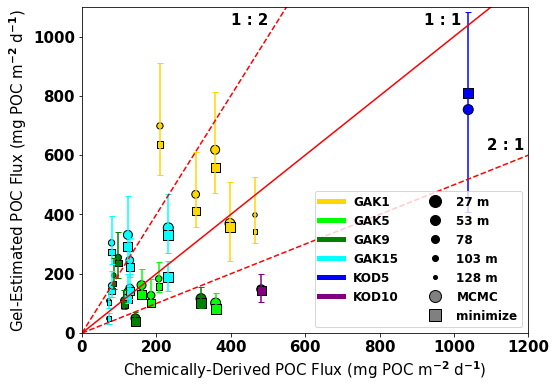

In [63]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

#One A for all and B for for Aggregate-like and pellet-like for six stations
station = ["GAK1", "GAK1", "GAK1", "GAK1", "GAK1", "GAK15", "GAK15", "GAK15", "GAK15", "GAK15", "GAK15", "GAK15", 
           "GAK15", "GAK15", "GAK15", "GAK5", "GAK5", "GAK5", "GAK5", "GAK9", "GAK9", "GAK9", "GAK9", "GAK9", "GAK9", "KOD10", "KOD5"] 
color = ['gold','gold','gold','gold','gold','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan','lime','lime','lime','lime','green','green','green','green','green','purple','blue'] 
shape = ['o']# ,'o','o','o','o','^','^','^','^','^','^','^','^','^','^','*','*','*','*','p','p','p','p','p','X', 'd']
ar = [40, 20, 100, 80, 60, 40, 40, 20, 20, 100, 100, 80, 80, 60, 60, 40, 100, 80, 60, 40, 20, 100, 80, 60, 80, 100]
x = [209.74455528,  465.30192538,  398.15072923,  358.26955821,  305.81381557, 79.6793405,    79.6793405,    72.33904002 ,  72.33904002,  232.17829167,
     232.17829167,  123.618646,    123.618646,    128.65996931,  128.65996931,  206.435432,    359.57052107,  160.31688729,  185.87331741,   98.02641368,
     85.87448668,  320.23340592,  143.88114759,  114.44658682,  481.95993371,  1038.54327353]
#y = [475.25439696634874, 406.0184755475699, 380.481215191848, 496.3542014525037, 509.4328810898304, 
#     123.37296919154663, 215.66036529930014, 30.46269644124192, 80.7848769502879, 97.09362379735879, 
#     204.16856885995364, 88.70956229737278, 186.15613200049057, 82.15319054309103, 150.81789643081444, 
#     338.927795864709, 206.27033920862854, 283.2062422420837, 193.16046911048704, 194.42576101857162, 
#     190.9487989933263, 131.89836576502148, 78.17591910972955, 133.29622809209351, 197.16846910204194, 
#     443.34579034530947]
y = [698.8356585075627, 398.4386927583767, 369.6176718950771, 618.2689653919595, 467.9272387146703, 159.8535201156271, 
     304.47402878039054, 49.265220084135436, 108.88577039304313, 187.7650582488368, 355.11965218929555, 136.74942169991434, 
     331.2854127904659, 152.0408260348356, 245.57230985506436, 183.1681016977319, 101.35796637513194, 161.58088059036248, 
     127.24475893453584, 254.8701069795187, 194.6077884961832, 116.26590740934674, 49.891779130694886, 109.57857418587149, 
     147.6941818417346, 753.9042173652358]
yy = [636.4528410091539, 342.11820055514795, 356.33841284092375, 559.3709485703936, 410.7460275506633, 141.49343269394717, 273.1572981578559, 
     49.94577453009317, 103.42075915795454, 188.62181511959372, 331.81068161027844, 117.02974256072541, 291.93372430325195, 142.086784962572, 
     223.9385842806622, 156.83381380868767, 81.45021328228177, 130.08751088962694, 101.24030266141092, 236.31863377154934, 166.6801322357393, 
     102.91395302390382, 40.064541922591324, 97.29974283166239, 143.01903891568327, 810.817340997101]

rel_unc = 0.141464621

font = {'family' : 'helvetica', 'weight' : 'bold', 'size'   : 15}
plt.rc('font', **font)
    
plt.figure(figsize = [8, 6])
for x1 in range(0, len(x)):
    plt.errorbar(x[x1], y[x1], yerr = np.array([[y_err[0, x1]],[y_err[1, x1]]]), ecolor = color[x1], capsize = 3)
plt.scatter(x,y, c = color, s = ar,marker='o', edgecolors = 'k')#alpha = 0.75,
plt.scatter(x,yy, c = color, s = ar,marker='s', edgecolors = 'k')#alpha = 0.75,

x = [0, 1300]
x2 = [0, 2600]
plt.plot(x, x, 'r-')
plt.text(920,1040, '1 : 1')
#Y axis label
plt.plot(x,x2, 'r--')
plt.text(400, 1040, '1 : 2')
plt.plot([0,1300],[0,650], 'r--')
plt.text(1090, 620, '2 : 1')
#x = [0, 850]
#x2 = [0, 1700]
#plt.plot(x, x, 'r-')
#plt.text(680, 800, '1 : 1')
#Y axis label
#plt.plot(x,x2, 'r--')
#plt.text(280, 800, '1 : 2')
#plt.plot([0,1300],[0,650], 'r--')
#plt.text(1180, 650, '2 : 1')
plt.ylabel('Gel-Estimated POC Flux (mg POC m$^{-2}$ d$^{-1}$)')
#X axis label
plt.xlabel('Chemically-Derived POC Flux (mg POC m$^{-2}$ d$^{-1}$)')

legend_elements = [Line2D([0],[0], color = 'gold',label = 'GAK1',lw = 5),
                   Line2D([0],[0], color = 'lime',label = 'GAK5',lw = 5),
                   Line2D([0],[0], color = 'green',label = 'GAK9',lw = 5),
                   Line2D([0],[0], color = 'cyan',label = 'GAK15',lw = 5),
                   Line2D([0],[0], color = 'blue',label = 'KOD5',lw = 5),
                   Line2D([0],[0], color = 'purple',label = 'KOD10',lw = 5),
                    Line2D([0],[0], color = 'w',label = '',lw = 5),
                   Line2D([0],[0], color = 'w',marker = 'o', markerfacecolor = 'k',  markeredgecolor = 'k', label = '27 m', markersize = 12),
                   Line2D([0],[0], color = 'w',marker = 'o', markerfacecolor = 'k', label = '53 m', markeredgecolor = 'k', markersize = 10), 
                   Line2D([0],[0], color = 'w',marker = 'o', markerfacecolor = 'k', label = '78 ', markeredgecolor = 'k',markersize = 8), #markeredgecolor = 'k',
                   Line2D([0],[0], color = 'w',marker = 'o', markerfacecolor = 'k', label = '103 m',markeredgecolor = 'k', markersize = 6), #markeredgecolor = 'k',
                   Line2D([0],[0], color = 'w',marker = 'o', markerfacecolor = 'k', label = '128 m',markeredgecolor = 'k', markersize = 4),#markeredgecolor = 'k',
                  Line2D([0],[0], color = 'w',marker = 'o', markerfacecolor = 'grey',  markeredgecolor = 'k', label = 'MCMC', markersize = 12),
                  Line2D([0],[0], color = 'w',marker = 's', markerfacecolor = 'grey',  markeredgecolor = 'k', label = 'minimize', markersize = 12)]
font = {'family' : 'helvetica', 'weight' : 'bold', 'size'   : 12}
plt.rc('font', **font)
#plt.legend(handles = legend_elements, ncol = 2,bbox_to_anchor=(0.5, 0.43, 1., .102), loc='right') #normally  0.73
plt.legend(handles = legend_elements, ncol = 2, loc = 'lower right')
plt.ylim(0, 1100) 
plt.xlim(0, 1200)  
plt.savefig(f'D:/GIT/NGA_particles_flux_publication/Plots/est_to_trap_POC_SI.png', dpi = 300, bbox_inches = 'tight')

In [8]:
#plotting model results
import timeit
import statistics
tic = timeit.default_timer()

#import packages
import statistics
import matplotlib as mpl
from scipy import optimize

#load data
path = "D:/GIT/NGA_particles_flux_publication/Plots/Hardcoding_A_and_B_minimization_results/"
fig_name5 = "two_A_B_Ascale_1e-10_Bscale_0.005_Astart1.0712151377499967e-07_Bstart0.3936600848310677_exp_scale_300_#6000000"
tracking_table5 = pd.read_pickle(f"{path}{fig_name5}/tracking_table.pkl")
#print(tracking_table2)

#95% confidence interval
#calculate mean
#agg_a_mean = statistics.mean(tracking_table5.agg_a)
#agg_b_mean = statistics.mean(tracking_table5.agg_b)
#fp_a_mean = statistics.mean(tracking_table5.fp_a)
#fp_b_mean = statistics.mean(tracking_table5.fp_b)

#2.5% and 97.5% -> -1.96s <= X <= 1.96s)
#2.5% and 97.5% -> -1.96s <= X <= 1.96s)
#agg_a_stdev = statistics.stdev(tracking_table5.agg_a)
#agg_a_low = agg_a_mean - 1.96*agg_a_stdev
#agg_a_high = agg_a_mean + 1.96*agg_a_stdev
#print(f"The mean agg A value is {agg_a_mean} with a 95% confidence iterval from {agg_a_low} to {agg_a_high}.")

#agg_b_stdev = statistics.stdev(tracking_table5.agg_b)
#agg_b_low = agg_b_mean - 1.96*agg_b_stdev
#agg_b_high = agg_b_mean + 1.96*agg_b_stdev
#print(f"The mean agg B value is {agg_b_mean} with a 95% confidence iterval from {agg_b_low} to {agg_b_high}.")

#fp_a_stdev = statistics.stdev(tracking_table5.fp_a)
#fp_a_low = fp_a_mean - 1.96*fp_a_stdev
#fp_a_high = fp_a_mean + 1.96*fp_a_stdev
#print(f"The mean FP A value is {fp_a_mean} with a 95% confidence iterval from {fp_a_low} to {fp_a_high}.")

#fp_b_stdev = statistics.stdev(tracking_table5.fp_b)
#fp_b_low = fp_b_mean - 1.96*fp_b_stdev
#fp_b_high = fp_b_mean + 1.96*fp_b_stdev
#print(f"The mean FP B value is {fp_b_mean} with a 95% confidence iterval from {fp_b_low} to {fp_b_high}.")

#format data for contourf
agg_a = np.arange(0.25e-07, 2.5e-07, 2.25e-07/20)
#print(a.shape)
agg_b = np.arange(0.31, 0.50, (0.50 - 0.31)/20)
#print(b)
AGG_A, AGG_B = np.meshgrid(agg_a, agg_b)
#print(B.shape)
AGG_Z = AGG_A * 0
#print(Z)
trap_flux = np.zeros(26) #edit this as you add more stations
loc = tracking_table5[tracking_table5['old_cost']==min(tracking_table5.old_cost)].index.values
for x1 in range(0, AGG_A.shape[0]):
    for y1 in range(0, AGG_A.shape[1]):
        #using the model best fit for FP_A and FP_B
        #x0 = [AGG_A[x1,y1],tracking_table5.fp_a[loc[0]], AGG_B[x1,y1], tracking_table5.fp_b[loc[0]]]
        x0 = [AGG_A[x1,y1],statistics.median(tracking_table5.fp_a.iloc[::100]), AGG_B[x1,y1], 
              statistics.median(tracking_table5.fp_b.iloc[::100])] 
        this, pi, trap_flux, est_flux, residuals = flux_fit(x0, parameters, data2, trap_flux, vol_by_esd_type)
        AGG_Z[x1,y1] = this

for x in range(0, AGG_Z.shape[0]):
    for y in range(0, AGG_Z.shape[1]):
        if AGG_Z[x, y] >= 10.2:
            AGG_Z[x, y] = 10.2
print(AGG_Z)
toc = timeit.default_timer()
print(toc-tic)

[[ 7.27647356  6.51566099  5.86472471  5.30333389  4.81618278  4.39145254
   4.01982557  3.69382786  3.40737547  3.15545296  2.93387991  2.739138
   2.56824056  2.41863273  2.28811385  2.17477646  2.07695784  1.99320103
   1.9222233   1.86289033]
 [ 7.02293823  6.20542309  5.51827669  4.93542432  4.43768555  4.01053412
   3.64270668  3.32529848  3.05115331  2.81443918  2.61034532  2.43486116
   2.28461175  2.15673326  2.04877741  1.95863697  1.88448719  1.82473911
   1.778002    1.74305297]
 [ 6.74699686  5.87430802  5.15513312  4.55638281  4.05429646  3.6312351
   3.27375259  2.97137431  2.71579137  2.50031076  2.31946928  2.16875586
   2.04440772  1.94325792  1.86261951  1.80019628  1.75401311  1.72236095
   1.70375296  1.69688919]
 [ 6.44849308  5.52381918  4.77843219  4.17081182  3.67187786  3.26048039
   2.92077402  2.64059885  2.41043558  2.2227059   2.07128939  1.95118104
   1.85824312  1.78902174  1.74060901  1.71053779  1.69670036  1.69728468
   1.71072398  1.73565644]
 [ 6.12

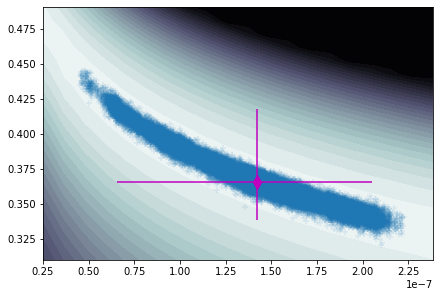

In [137]:
#plot results

#Import packages
import matplotlib.pyplot as plt
import statistics

#subsample data
#tracking_table5.agg_a
#tracking_table5.agg_b

origin = 'lower'
nr, nc = AGG_Z.shape
fig1, ax2 = plt.subplots(constrained_layout=True)
CS = ax2.contourf(AGG_A, AGG_B, AGG_Z, levels = np.linspace(1.2, 10.2, 28), cmap=plt.cm.bone_r, origin=origin, 
                  vmin = 1.2, vmax = 10.2)
#plt.xlabel("Aggregate A")
#plt.ylabel("Aggregate B")
#add model results
cost = plt.scatter(tracking_table5.agg_a.iloc[::100], tracking_table5.agg_b.iloc[::100],marker = '+', 
                   label = "MCMC Tested Values", alpha = 0.1)
#superimpose minimum model result value
#find minimum cost then get a and b at that value
#loc = tracking_table5[tracking_table5['old_cost']==min(tracking_table5.old_cost)].index.values
#min_mod = plt.plot(tracking_table5.agg_a[loc[0]], tracking_table5.agg_b[loc[0]],marker = 's', markerfacecolor=None, 
#                   markeredgecolor = 'r', markeredgewidth=2, label = "MCMC Minimum", linestyle="None")
#superimpose optimum minimum value
#opt_min = plt.plot(6.6e-11, 0.847,marker = 'o', markerfacecolor = 'gold', markeredgecolor = 'k', label = "Optimum Minimum",
#                  linestyle="None")
#superimpose mean model result and 95% confidence interval
#add 95% CI
plt.errorbar(statistics.median(tracking_table5.agg_a.iloc[::100]), statistics.median(tracking_table5.agg_b.iloc[::100]),
            xerr=np.array([[statistics.median(tracking_table5.agg_a.iloc[::100]) - np.quantile(tracking_table5.agg_a.iloc[::100], 0.025)],
            [np.quantile(tracking_table5.agg_a.iloc[::100], 0.975) - statistics.median(tracking_table5.agg_a.iloc[::100])]]),
            yerr=np.array([[statistics.median(tracking_table5.agg_b.iloc[::100]) - np.quantile(tracking_table5.agg_b.iloc[::100], 0.025)],
            [np.quantile(tracking_table5.agg_b.iloc[::100], 0.975) - statistics.median(tracking_table5.agg_b.iloc[::100])]]),
                           ecolor='m')
mean_mod = plt.scatter(statistics.median(tracking_table5.agg_a.iloc[::100]), 
                       statistics.median(tracking_table5.agg_b.iloc[::100]),marker = 'd', c = 'm', s = 100, 
                      label = "MCMC Median & 95% CI")

# Make a colorbar for the ContourSet returned by the contourf call.
#cbar = fig1.colorbar(CS)
#cbar.ax.set_ylabel('Cost')

#make legend
#leg = plt.legend(loc='upper right', title = "Cost", framealpha = 1)
#for lh in leg.legendHandles: 
#    lh.set_alpha(1)

#plt.savefig(f'{path}{fig_name5}/a_vs_b_model_results_comparison_w_opt_min.png', dpi = 300, bbox_inches = 'tight')
plt.savefig(f'{path}{fig_name5}/a_vs_b_model_results_comparison.png', dpi = 300, bbox_inches = 'tight')

In [138]:
#plotting model results
import timeit
tic = timeit.default_timer()

#format data for contourf
agg_a = np.arange(0.25e-07, 2.5e-07, 2.25e-07/20)
#print(a.shape)
fp_a = np.arange(4.8e-07, 6.6e-07, (6.6e-07 - 4.8e-07)/20)
#print(b)
AGG_A, FP_A = np.meshgrid(agg_a, fp_a)
#print(B.shape)
AGGA_FPA_Z = AGG_A * 0
#print(Z)
trap_flux = np.zeros(26) #edit this as you add more stations
loc = tracking_table5[tracking_table5['old_cost']==min(tracking_table5.old_cost)].index.values
for x1 in range(0, AGG_A.shape[0]):
    for y1 in range(0, AGG_A.shape[1]):
        #using the model best fit for FP_A and FP_B
        x0 = [AGG_A[x1,y1], FP_A[x1,y1], statistics.median(tracking_table5.agg_b.iloc[::100]), 
            statistics.median(tracking_table5.fp_b.iloc[::100])]
        this, pi, trap_flux, est_flux, residuals = flux_fit(x0, parameters, data2, trap_flux, vol_by_esd_type)
        AGGA_FPA_Z[x1,y1] = this
print(AGGA_FPA_Z)

toc = timeit.default_timer()
print(toc-tic)

[[6.52447741 5.22658475 4.26800184 3.54815776 3.00363824 2.59204069
  2.28373698 2.05730115 1.89680408 1.79013023 1.72788663 1.70267136
  1.70856897 1.74079365 1.79543156 1.86925127 1.95956195 2.06410577
  2.18097511 2.30854816]
 [6.41401138 5.14380296 4.20487383 3.49958868 2.96619795 2.56331585
  2.26197063 2.0411787  1.88531956 1.7824992  1.7234875  1.70100479
  1.70922893 1.74344649 1.79980052 1.87510485 1.96670508 2.07237292
  2.19022498 2.31865945]
 [6.30619568 5.06292992 4.14317816 3.45212738 2.92963457 2.53529814
  2.2407832  2.0255362  1.87423718 1.7752082  1.71937818 1.6995869
  1.71010355 1.74628559 1.80433186 1.88110059 1.97397309 2.08075014
  2.19957213 2.32885694]
 [6.20095126 4.98391396 4.08287908 3.40574807 2.89392891 2.50797291
  2.22016325 2.01036458 1.86354967 1.76825131 1.71555374 1.69841358
  1.71118939 1.74930806 1.80902311 1.88723635 1.98136416 2.08923585
  2.2090152  2.33913943]
 [6.09820228 4.90670531 4.02394207 3.36042581 2.85906236 2.48132592
  2.20009969 1.99

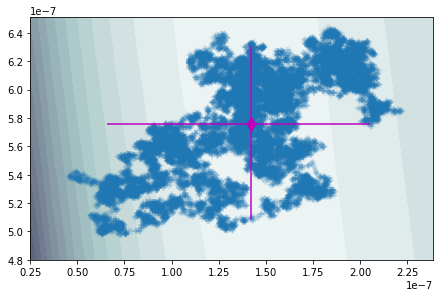

In [139]:
#plot results

#Import packages
import matplotlib.pyplot as plt
import statistics

origin = 'lower'
nr, nc = AGG_Z.shape
fig1, ax2 = plt.subplots(constrained_layout=True)
CS = ax2.contourf(AGG_A, FP_A, AGGA_FPA_Z, levels = np.linspace(1.2, 10.2, 28), cmap=plt.cm.bone_r, origin=origin, 
                  vmin = 1.2, vmax = 10.2)
#plt.xlabel("Aggregate A")
#plt.ylabel("Fecal Pellet A")
#add model results
cost = plt.scatter(tracking_table5.agg_a.iloc[::100], tracking_table5.fp_a.iloc[::100], marker = '+', 
                   label = "MCMC Tested Values", alpha = 0.1)
#superimpose minimum model result value
#find minimum cost then get a and b at that value
#loc = tracking_table5[tracking_table5['old_cost']==min(tracking_table5.old_cost)].index.values
#min_mod = plt.plot(tracking_table5.agg_a[loc[0]], tracking_table5.fp_a[loc[0]],marker = 's', markerfacecolor=None, 
#                   markeredgecolor = 'r', markeredgewidth=2, label = "MCMC Minimum", linestyle="None")
#superimpose optimum minimum value
#opt_min = plt.plot(6.6e-11, 0.009e-09,marker = 'o', markerfacecolor = 'gold', markeredgecolor = 'k', label = "Optimum Minimum",
#                  linestyle="None")
#superimpose mean model result and 95% confidence interval
#add 95% CI
plt.errorbar(statistics.median(tracking_table5.agg_a.iloc[::100]), statistics.median(tracking_table5.fp_a.iloc[::100]),
            xerr=np.array([[statistics.median(tracking_table5.agg_a.iloc[::100]) - np.quantile(tracking_table5.agg_a.iloc[::100], 0.025)],
            [np.quantile(tracking_table5.agg_a.iloc[::100], 0.975) - statistics.median(tracking_table5.agg_a.iloc[::100])]]),
            yerr=np.array([[statistics.median(tracking_table5.fp_a.iloc[::100]) - np.quantile(tracking_table5.fp_a.iloc[::100], 0.025)],
            [np.quantile(tracking_table5.fp_a.iloc[::100], 0.975) - statistics.median(tracking_table5.fp_a.iloc[::100])]]),
                           ecolor='m')

mean_mod = plt.scatter(statistics.median(tracking_table5.agg_a.iloc[::100]), statistics.median(tracking_table5.fp_a.iloc[::100]),marker = 'd', c = 'm', s = 100, 
                      label = "MCMC Median & 95% CI")
#plt.xlim([0, 2.5e-07])

# Make a colorbar for the ContourSet returned by the contourf call.
#cbar = fig1.colorbar(CS)
cbar.ax.set_ylabel('Cost')

#make legend
#leg = plt.legend(loc='lower right', title = "Cost")
#for lh in leg.legendHandles: 
#    lh.set_alpha(1)

plt.savefig(f'{path}{fig_name5}/a_vs_b_model_results_comparison_agga_fpa.png', dpi = 300, bbox_inches = 'tight')
#plt.savefig(f'{path}{fig_name5}/a_vs_b_model_results_comparison__agga_fpa_w_opt_min.png', dpi = 300, bbox_inches = 'tight')

In [140]:
#plotting model results
tic = timeit.default_timer()

#format data for contourf
agg_a = np.arange(0.25e-07, 2.5e-07, 2.25e-07/20)
#print(a.shape)
fp_b = np.arange(0.31, 0.43, (0.43 - 0.31)/20)
#print(b)
AGG_A, FP_B = np.meshgrid(agg_a, fp_b)
#print(B.shape)
AGGA_FPB_Z = AGG_A * 0
#print(Z)
trap_flux = np.zeros(26) #edit this as you add more stations
loc = tracking_table5[tracking_table5['old_cost']==min(tracking_table5.old_cost)].index.values
for x1 in range(0, AGG_A.shape[0]):
    for y1 in range(0, AGG_A.shape[1]):
        #using the model best fit for FP_A and FP_B
        x0 = [AGG_A[x1,y1], statistics.median(tracking_table5.fp_a.iloc[::100]), 
              statistics.median(tracking_table5.agg_b.iloc[::100]), FP_B[x1,y1]] 
        this, pi, trap_flux, est_flux, residuals = flux_fit(x0, parameters, data2, trap_flux, vol_by_esd_type)
        AGGA_FPB_Z[x1,y1] = this
for x in range(0, AGGA_FPB_Z.shape[0]):
    for y in range(0, AGGA_FPB_Z.shape[1]):
        if AGGA_FPB_Z[x, y] >= 10.2:
            AGGA_FPB_Z[x, y] = 10.2
print(AGGA_FPB_Z)

toc = timeit.default_timer()
print(toc-tic)

[[10.2         9.69617114  7.60178874  6.08529177  4.95682513  4.10292738
   3.45098749  2.95209545  2.57196568  2.28578301  2.07510884  1.92593847
   1.82743479  1.7710764   1.75006887  1.75892828  1.79318042  1.84913976
   1.92374424  2.01443008]
 [10.2         9.29401983  7.30849638  5.86487654  4.78794148  3.97197111
   3.34881507  2.8723037   2.50992106  2.23804144  2.03905251  1.89953965
   1.80909706  1.7595251   1.74427365  1.75804708  1.79651845  1.85611869
   1.93387893  2.0273107 ]
 [10.2         8.87756933  7.00319345  5.63469038  4.61124607  3.83486083
   3.24187834  2.7889122   2.44525569  2.18850597  2.00190421  1.87264769
   1.79077958  1.74843615  1.73932302  1.75834224  1.80132171  1.86481514
   1.94595207  2.04232364]
 [10.2         8.44837153  6.68690265  5.39545422  4.4272837   3.69203733
   3.1305568   2.70226506  2.37829439  2.13749214  1.96397642  1.84557596
   1.77279893  1.73813071  1.73554345  1.7601458   1.80792783  1.87557218
   1.96031187  2.05982196]
 [10

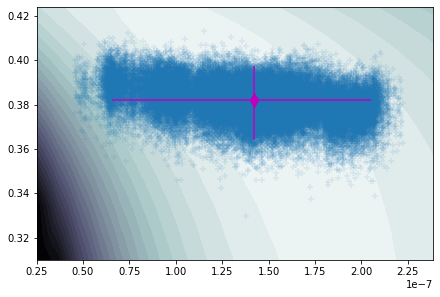

In [141]:
#plot results

#Import packages
import matplotlib.pyplot as plt
import statistics

origin = 'lower'
nr, nc = AGGA_FPB_Z.shape
fig1, ax2 = plt.subplots(constrained_layout=True)
CS = ax2.contourf(AGG_A, FP_B, AGGA_FPB_Z, levels = np.linspace(1.2, 10.2, 28), cmap=plt.cm.bone_r, origin=origin, 
                  vmin = 1.2, vmax = 10.2)
#plt.xlabel("Aggregate A")
#plt.ylabel("Fecal Pellet B")
#add model results
cost = plt.scatter(tracking_table5.agg_a.iloc[::100], tracking_table5.fp_b.iloc[::100],marker = '+',
                   alpha = 0.1, label = "MCMC Tested Values")
#superimpose minimum model result value
#find minimum cost then get a and b at that value
#loc = tracking_table5[tracking_table5['old_cost']==min(tracking_table5.old_cost)].index.values
#min_mod = plt.plot(tracking_table5.agg_a[loc[0]], tracking_table5.fp_b[loc[0]],marker = 's', markerfacecolor=None, 
#                   markeredgecolor = 'r', markeredgewidth=2, label = "MCMC Minimum", linestyle="None")
#superimpose optimum minimum value
#opt_min = plt.plot(6.6e-11, 0.982,marker = 'o', markerfacecolor = 'gold', markeredgecolor = 'k', label = "Optimum Minimum",
#                  linestyle="None")
#superimpose mean model result and 95% confidence interval
#add 95% CI
plt.errorbar(statistics.median(tracking_table5.agg_a.iloc[::100]), statistics.median(tracking_table5.fp_b.iloc[::100]),
            xerr=np.array([[statistics.median(tracking_table5.agg_a.iloc[::100]) - np.quantile(tracking_table5.agg_a.iloc[::100], 0.025)],
            [np.quantile(tracking_table5.agg_a.iloc[::100], 0.975) - statistics.median(tracking_table5.agg_a.iloc[::100])]]),
            yerr=np.array([[statistics.median(tracking_table5.fp_b.iloc[::100]) - np.quantile(tracking_table5.fp_b.iloc[::100], 0.025)],
            [np.quantile(tracking_table5.fp_b.iloc[::100], 0.975) - statistics.median(tracking_table5.fp_b.iloc[::100])]]),
                           ecolor='m')

mean_mod = plt.scatter(statistics.median(tracking_table5.agg_a.iloc[::100]), 
                       statistics.median(tracking_table5.fp_b.iloc[::100]),marker = 'd', c = 'm', s = 100, 
                      label = "MCMC Median & 95% CI")

# Make a colorbar for the ContourSet returned by the contourf call.
#cbar = fig1.colorbar(CS)
#cbar.ax.set_ylabel('Cost')

#make legend
#leg = plt.legend(loc='lower left', title = "Cost")
#for lh in leg.legendHandles: 
#    lh.set_alpha(1)

plt.savefig(f'{path}{fig_name5}/a_vs_b_model_results_comparison_agga_fpb.png', dpi = 300, bbox_inches = 'tight')
#plt.savefig(f'{path}{fig_name5}/a_vs_b_model_results_comparison_agga_fpb_w_opt_min.png', dpi = 300, bbox_inches = 'tight')

In [142]:
#plotting model results
import timeit
tic = timeit.default_timer()

#format data for contourf
fp_a = np.arange(4.8e-07, 6.6e-07, 1.8e-07/20)
#print(a.shape)
fp_b = np.arange(0.31, 0.43, (0.43 - 0.31)/20)
#print(b)
FP_A, FP_B = np.meshgrid(fp_a, fp_b)
#print(B.shape)
FPA_FPB_Z = FP_A * 0
#print(Z)
trap_flux = np.zeros(26) #edit this as you add more stations
loc = tracking_table5[tracking_table5['old_cost']==min(tracking_table5.old_cost)].index.values
for x1 in range(0, FP_A.shape[0]):
    for y1 in range(0, FP_A.shape[1]):
        #using the model best fit for FP_A and FP_B
        x0 = [statistics.median(tracking_table5.agg_a.iloc[::100]), FP_A[x1,y1], 
              statistics.median(tracking_table5.agg_b.iloc[::100]), FP_B[x1,y1]] 
        this, pi, trap_flux, est_flux, residuals = flux_fit(x0, parameters, data2, trap_flux, vol_by_esd_type)
        FPA_FPB_Z[x1,y1] = this
print(FPA_FPB_Z)

toc = timeit.default_timer()
print(toc-tic)

[[2.06473484 2.05903444 2.0533866  2.04779097 2.04224721 2.03675495
  2.03131387 2.0259236  2.02058383 2.01529421 2.0100544  2.00486409
  1.99972294 1.99463064 1.98958686 1.98459128 1.97964359 1.97474349
  1.96989065 1.96508479 1.96032559]
 [2.0351239  2.0291716  2.02328086 2.01745125 2.01168231 2.00597361
  2.00032469 1.99473515 1.98920454 1.98373244 1.97831844 1.97296211
  1.96766305 1.96242086 1.95723512 1.95210545 1.94703144 1.9420127
  1.93704886 1.93213952 1.92728431]
 [2.00430107 1.99812631 1.99202345 1.98599194 1.9800312  1.97414068
  1.96831983 1.9625681  1.95688496 1.95126987 1.94572231 1.94024176
  1.93482769 1.92947961 1.924197   1.91897936 1.91382621 1.90873705
  1.90371141 1.89874879 1.89384873]
 [1.97245289 1.96609632 1.95982347 1.95363362 1.94752608 1.94150013
  1.93555509 1.92969027 1.923905   1.91819861 1.91257044 1.90701984
  1.90154616 1.89614876 1.89082703 1.88558032 1.88040804 1.87530957
  1.8702843  1.86533165 1.86045103]
 [1.93983151 1.93334701 1.92695966 1.9206

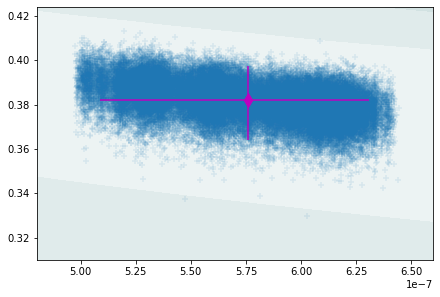

In [143]:
#plot results

#Import packages
import matplotlib.pyplot as plt
import statistics

origin = 'lower'
nr, nc = FPA_FPB_Z.shape
fig1, ax2 = plt.subplots(constrained_layout=True)
CS = ax2.contourf(FP_A, FP_B, FPA_FPB_Z, levels = np.linspace(1.2, 10.2, 28), cmap=plt.cm.bone_r, origin=origin, 
                  vmin = 1.2, vmax = 10.2)
#plt.xlabel("Fecel Pellet A")
#plt.ylabel("Fecal Pellet B")
#add model results
cost = plt.scatter(tracking_table5.fp_a.iloc[::100], tracking_table5.fp_b.iloc[::100],marker = '+', 
                   label = "MCMC Tested Values", alpha = 0.1)
#superimpose minimum model result value
#find minimum cost then get a and b at that value
#loc = tracking_table5[tracking_table5['old_cost']==min(tracking_table5.old_cost)].index.values
#min_mod = plt.plot(tracking_table5.fp_a[loc[0]], tracking_table5.fp_b[loc[0]],marker = 's', markerfacecolor=None, 
#                   markeredgecolor = 'r', markeredgewidth=2, label = "MCMC Minimum", linestyle="None")
#superimpose optimum minimum value
#opt_min = plt.plot(0.009e-09, 0.982,marker = 'o', markerfacecolor = 'gold', markeredgecolor = 'k', label = "Optimum Minimum",
#                  linestyle="None")
#superimpose mean model result and 95% confidence interval
#add 95% CI
plt.errorbar(statistics.median(tracking_table5.fp_a.iloc[::100]), statistics.median(tracking_table5.fp_b.iloc[::100]),
            xerr=np.array([[statistics.median(tracking_table5.fp_a.iloc[::100]) - np.quantile(tracking_table5.fp_a.iloc[::100], 0.025)],
            [np.quantile(tracking_table5.fp_a.iloc[::100], 0.975) - statistics.median(tracking_table5.fp_a.iloc[::100])]]),
            yerr=np.array([[statistics.median(tracking_table5.fp_b.iloc[::100]) - np.quantile(tracking_table5.fp_b.iloc[::100], 0.025)],
            [np.quantile(tracking_table5.fp_b.iloc[::100], 0.975) - statistics.median(tracking_table5.fp_b.iloc[::100])]]),
                           ecolor='m')

mean_mod = plt.scatter(statistics.median(tracking_table5.fp_a.iloc[::100]), 
                       statistics.median(tracking_table5.fp_b.iloc[::100]),marker = 'd', c = 'm', s = 100, 
                      label = "MCMC Median & 95% CI")
#plt.xlim([0, 2.5e-07])

# Make a colorbar for the ContourSet returned by the contourf call.
#cbar = fig1.colorbar(CS)
#cbar.ax.set_ylabel('Cost')

#make legend
#leg = plt.legend(loc='lower right', title = "Cost")
#for lh in leg.legendHandles: 
#    lh.set_alpha(1)

plt.savefig(f'{path}{fig_name5}/a_vs_b_model_results_comparison_fpa_fpb.png', dpi = 300, bbox_inches = 'tight')
#plt.savefig(f'{path}{fig_name5}/a_vs_b_model_results_comparison_fpa_fpb_w_opt_min.png', dpi = 300, bbox_inches = 'tight')

In [144]:
#plotting model results
import timeit
tic = timeit.default_timer()

#format data for contourf
agg_b = np.arange(0.31, 0.46, (0.46 - 0.31)/20)
#print(a.shape)
fp_b = np.arange(0.31, 0.43, (0.43 - 0.31)/20)
#print(b)
AGG_B, FP_B = np.meshgrid(agg_b, fp_b)
#print(B.shape)
AGGB_FPB_Z = AGG_B * 0
#print(Z)
trap_flux = np.zeros(26) #edit this as you add more stations
loc = tracking_table5[tracking_table5['old_cost']==min(tracking_table5.old_cost)].index.values
for x1 in range(0, AGG_B.shape[0]):
    for y1 in range(0, AGG_B.shape[1]):
        #using the model best fit for FP_A and FP_B
        x0 = [statistics.median(tracking_table5.agg_a.iloc[::100]), 
              statistics.median(tracking_table5.fp_a.iloc[::100]),AGG_B[x1,y1], FP_B[x1,y1]] 
        this, pi, trap_flux, est_flux, residuals = flux_fit(x0, parameters, data2, trap_flux, vol_by_esd_type)
        AGGB_FPB_Z[x1,y1] = this
print(AGGB_FPB_Z)

toc = timeit.default_timer()
print(toc-tic)

[[5.47012768 4.8205523  4.21783753 3.6677397  3.17594074 2.74801745
  2.38941451 2.10542155 1.90115428 1.78153972 1.75130527 1.8149715
  1.97684841 2.24103471 2.61141986 3.0916886  3.68532723 4.39563172
  5.22571694 6.17852678]
 [5.27839709 4.65807451 4.08206758 3.55618549 3.08618602 2.6777414
  2.33640795 2.06759971 1.87656623 1.76837464 1.74789574 1.81979426
  1.98852269 2.25831871 2.63320556 3.11699522 3.71329387 4.42550919
  5.2568592  6.21038225]
 [5.07793018 4.4880376  3.93991065 3.43939158 2.9922968  2.60437964
  2.28129663 2.0285776  1.85160004 1.75556771 1.74549366 1.82618748
  2.00224658 2.27805128 2.65776334 3.14532753 3.74447584 4.45873394
  5.29142937 6.24570122]
 [4.86934811 4.31096906 3.79182065 3.31775638 2.89463195 2.52826515
  2.2243989  1.98866793 1.82656956 1.74343883 1.74442805 1.83449093
  2.0183709  2.30059368 2.68546349 3.17706284 3.77925519 4.49569027
  5.32981145 6.28486486]
 [4.65347916 4.12758263 3.63841783 3.19182618 2.79368137 2.44984682
  2.16613578 1.948

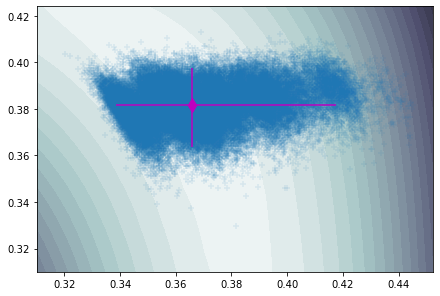

In [145]:
#plot results

#Import packages
import matplotlib.pyplot as plt
import statistics

origin = 'lower'
nr, nc = FPA_FPB_Z.shape
fig1, ax2 = plt.subplots(constrained_layout=True)
CS = ax2.contourf(AGG_B, FP_B, AGGB_FPB_Z, levels = np.linspace(1.2, 10.2, 28), cmap=plt.cm.bone_r, origin=origin, 
                  vmin = 1.2, vmax = 10.2)
#plt.xlabel("Aggregate B")
#plt.ylabel("Fecal Pellet B")
#add model results
cost = plt.scatter(tracking_table5.agg_b.iloc[::100], tracking_table5.fp_b.iloc[::100],marker = '+', 
                   label = "MCMC Tested Values", alpha = 0.1)
#superimpose minimum model result value
#find minimum cost then get a and b at that value
#loc = tracking_table5[tracking_table5['old_cost']==min(tracking_table5.old_cost)].index.values
#min_mod = plt.plot(tracking_table5.agg_b[loc[0]], tracking_table5.fp_b[loc[0]],marker = 's', markerfacecolor=None, 
#                   markeredgecolor = 'r', markeredgewidth=2, label = "MCMC Minimum", linestyle="None")
#superimpose optimum minimum value
#opt_min = plt.plot(0.847, 0.982,marker = 'o', markerfacecolor = 'gold', markeredgecolor = 'k', label = "Optimum Minimum",
#                  linestyle="None")
#superimpose mean model result and 95% confidence interval
#add 95% CI
plt.errorbar(statistics.median(tracking_table5.agg_b.iloc[::100]), statistics.median(tracking_table5.fp_b.iloc[::100]),
            xerr=np.array([[statistics.median(tracking_table5.agg_b.iloc[::100]) - np.quantile(tracking_table5.agg_b.iloc[::100], 0.025)],
            [np.quantile(tracking_table5.agg_b.iloc[::100], 0.975) - statistics.median(tracking_table5.agg_b.iloc[::100])]]),
            yerr=np.array([[statistics.median(tracking_table5.fp_b.iloc[::100]) - np.quantile(tracking_table5.fp_b.iloc[::100], 0.025)],
            [np.quantile(tracking_table5.fp_b.iloc[::100], 0.975) - statistics.median(tracking_table5.fp_b.iloc[::100])]]),
                           ecolor='m')

mean_mod = plt.scatter(statistics.median(tracking_table5.agg_b.iloc[::100]), 
                       statistics.median(tracking_table5.fp_b.iloc[::100]),marker = 'd', c = 'm', s = 100, 
                      label = "MCMC Median & 95% CI")
#plt.xlim([0, 2.5e-07])

# Make a colorbar for the ContourSet returned by the contourf call.
#cbar = fig1.colorbar(CS)
#cbar.ax.set_ylabel('Cost')

#make legend
#leg = plt.legend(loc='lower right', title = "Cost")
#for lh in leg.legendHandles: 
#    lh.set_alpha(1)

plt.savefig(f'{path}{fig_name5}/a_vs_b_model_results_comparison_aggb_fpb.png', dpi = 300, bbox_inches = 'tight')
#plt.savefig(f'{path}{fig_name5}/a_vs_b_model_results_comparison_aggb_fpb_w_opt_min.png', dpi = 300, bbox_inches = 'tight')

In [146]:
#plotting model results
import timeit
tic = timeit.default_timer()

#format data for contourf
fp_a = np.arange(4.8e-07, 6.6e-07, (1.4e-07)/20)
#print(a.shape)
agg_b = np.arange(0.31, 0.46, (0.46 - 0.31)/20)
#print(b)
FP_A, AGG_B = np.meshgrid(fp_a, agg_b)
#print(B.shape)
FPA_AGGB_Z = FP_A * 0
#print(Z)
trap_flux = np.zeros(26) #edit this as you add more stations
loc = tracking_table5[tracking_table5['old_cost']==min(tracking_table5.old_cost)].index.values
for x1 in range(0, FP_A.shape[0]):
    for y1 in range(0, FP_A.shape[1]):
        #using the model best fit for FP_A and FP_B
        x0 = [statistics.median(tracking_table5.agg_a.iloc[::100]),  FP_A[x1,y1], AGG_B[x1,y1], 
              statistics.median(tracking_table5.fp_b.iloc[::100])] 
        this, pi, trap_flux, est_flux, residuals = flux_fit(x0, parameters, data2, trap_flux, vol_by_esd_type)
        FPA_AGGB_Z[x1,y1] = this
print(FPA_AGGB_Z)

toc = timeit.default_timer()
print(toc-tic)

[[3.25504466 3.22196199 3.18947403 3.15757031 3.12624062 3.09547499
  3.06526366 3.03559714 3.00646614 2.97786157 2.94977457 2.92219648
  2.89511882 2.86853332 2.84243189 2.81680661 2.79164974 2.76695371
  2.74271111 2.7189147  2.69555739 2.67263223 2.65013244 2.62805136
  2.60638249 2.58511945]
 [2.94060693 2.91255828 2.88502471 2.85799748 2.83146807 2.80542812
  2.7798695  2.75478425 2.73016458 2.70600287 2.68229169 2.65902374
  2.63619192 2.61378925 2.59180892 2.57024424 2.5490887  2.52833589
  2.50797956 2.48801359 2.46843196 2.4492288  2.43039836 2.41193498
  2.39383315 2.37608745]
 [2.64957695 2.62631066 2.60348683 2.58109825 2.55913785 2.53759875
  2.51647418 2.49575754 2.47544236 2.45552233 2.43599125 2.41684305
  2.39807181 2.37967172 2.36163708 2.34396233 2.32664199 2.30967073
  2.29304331 2.27675458 2.26079952 2.2451732  2.22987077 2.21488749
  2.20021872 2.1858599 ]
 [2.38718181 2.36842184 2.35003873 2.33202656 2.31437957 2.29709208
  2.28015855 2.26357357 2.24733182 2.2314

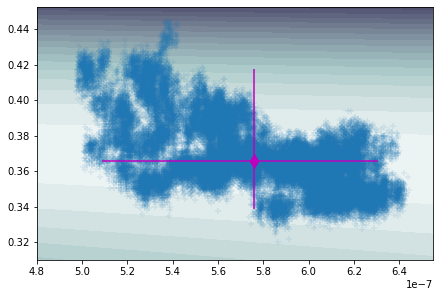

In [148]:
#plot results

#Import packages
import matplotlib.pyplot as plt
import statistics

origin = 'lower'
nr, nc = FPA_AGGB_Z.shape
fig1, ax2 = plt.subplots(constrained_layout=True)
CS = ax2.contourf(FP_A, AGG_B, FPA_AGGB_Z, levels = np.linspace(1.2, 10.2, 28), cmap=plt.cm.bone_r, origin=origin, 
                  vmin = 1.2, vmax = 10.2)
#plt.xlabel("Fecal Pellet A")
#plt.ylabel("Aggregate B")
#add model results
cost = plt.scatter(tracking_table5.fp_a[::100], tracking_table5.agg_b[::100],marker = '+',
                   alpha = 0.1, label = "MCMC Tested Values")
#superimpose minimum model result value
#find minimum cost then get a and b at that value
#loc = tracking_table5[tracking_table5['old_cost']==min(tracking_table5.old_cost)].index.values
#min_mod = plt.plot(tracking_table5.fp_a[loc[0]], tracking_table5.agg_b[loc[0]],marker = 's', markerfacecolor=None, 
#                   markeredgecolor = 'r', markeredgewidth=2, label = "MCMC Minimum", linestyle="None")
#superimpose optimum minimum value
#opt_min = plt.plot(0.009e-09, 0.847,marker = 'o', markerfacecolor = 'gold', markeredgecolor = 'k', label = "Optimum Minimum",
#                  linestyle="None")
#superimpose mean model result and 95% confidence interval
#add 95% CI
plt.errorbar(statistics.median(tracking_table5.fp_a.iloc[::100]), statistics.median(tracking_table5.agg_b.iloc[::100]),
            xerr=np.array([[statistics.median(tracking_table5.fp_a.iloc[::100]) - np.quantile(tracking_table5.fp_a.iloc[::100], 0.025)],
            [np.quantile(tracking_table5.fp_a.iloc[::100], 0.975) - statistics.median(tracking_table5.fp_a.iloc[::100])]]),
            yerr=np.array([[statistics.median(tracking_table5.agg_b.iloc[::100]) - np.quantile(tracking_table5.agg_b.iloc[::100], 0.025)],
            [np.quantile(tracking_table5.agg_b.iloc[::100], 0.975) - statistics.median(tracking_table5.agg_b.iloc[::100])]]),
                           ecolor='m')

mean_mod = plt.scatter(statistics.median(tracking_table5.fp_a[::100]), 
                       statistics.median(tracking_table5.agg_b[::100]),marker = 'd', c = 'm', s = 100, 
                      label = "MCMC Median & 95% CI")
#plt.xlim([0, 2.5e-07])

# Make a colorbar for the ContourSet returned by the contourf call.
#cbar = fig1.colorbar(CS)
#cbar.ax.set_ylabel('Cost')

#make legend
#leg = plt.legend(loc='upper right', title = "Cost")
#for lh in leg.legendHandles: 
#    lh.set_alpha(1)

plt.savefig(f'{path}{fig_name5}/a_vs_b_model_results_comparison_fpa_aggb.png', dpi = 300, bbox_inches = 'tight')
#plt.savefig(f'{path}{fig_name5}/a_vs_b_model_results_comparison_fpa_aggb_w_opt_min.png', dpi = 300, bbox_inches = 'tight')

In [25]:
#concatenateing 4 pickle files into one
#import functions
import pandas as pd
import matplotlib.pyplot as plt
#load data
path = "D:/GIT/NGA_particles_flux_publication/Plots/Hardcoding_A_and_B_minimization_results/"
fig_name = f"two_A_B_Ascale_1e-10_Bscale_0.005_Astart6.6e-11_Bstart0.847_exp_scale_300_#16000000"
tracking_table1 = pd.read_pickle(f"{path}two_A_B_Ascale_1e-10_Bscale_0.005_Astart6.6e-11_Bstart0.847_exp_scale_300_#4000000/tracking_table.pkl")
print(tracking_table1)
tracking_table2 = pd.read_pickle(f"{path}two_A_B_Ascale_1e-10_Bscale_0.005_Astart1.592899611624e-07_Bstart0.3645471985674817_exp_scale_300_#4000000/tracking_table.pkl")
print(tracking_table2)
tracking_table3 = pd.read_pickle(f"{path}two_A_B_Ascale_1e-10_Bscale_0.005_Astart1.3411704884628e-07_Bstart0.36790398841201777_exp_scale_300_#4000000/tracking_table.pkl")
print(tracking_table3)
tracking_table4 = pd.read_pickle(f"{path}two_A_B_Ascale_1e-10_Bscale_0.005_Astart8.720153275297e-08_Bstart0.40184890000980394_exp_scale_300_#4000000/tracking_table.pkl")
print(tracking_table4)
tracking_table_c = [tracking_table1, tracking_table2, tracking_table3, tracking_table4]
tracking_table = pd.concat(tracking_table_c, ignore_index=True)
print(tracking_table)

#check if directory exists
isExist = os.path.exists(f"{path}{fig_name}")
#make directory if it doesn't exist 
if not isExist:
    # Create a new directory because it does not exist 
    os.makedirs(f"{path}{fig_name}")
    print("The new directory is created!")
tracking_table.to_pickle(f"{path}{fig_name}/tracking_table.pkl")

#make new percent precision figure
percent_accepted = (33.699325 + 33.300525 + 32.97665 + 33.55295)/4
plt.figure()
text_kwargs = dict(ha='center', va='center', fontsize=50, color='C1')
plt.text(0.5, 0.5, f'{percent_accepted}%', **text_kwargs)
plt.savefig(f'{path}{fig_name}/percent_accepted.png', dpi = 300, bbox_inches = 'tight')
#save new excel sheets
import math
for index1 in range(0,math.ceil(iterations/1000000)):
    print(index1)
    tracking_table[index1*1000000:index1*1000000+1000000].to_excel(f'{path}{fig_name}/tracking_table_{index1}.xlsx')


              agg_a        fp_a       agg_b        fp_b    old_cost
0        0.00000019  0.00000034  0.34744402  0.41080744  1.71239934
1        0.00000019  0.00000034  0.34744402  0.41080744  1.71239934
2        0.00000019  0.00000034  0.35019704  0.40667595  1.71256506
3        0.00000019  0.00000034  0.35019704  0.40667595  1.71256506
4        0.00000019  0.00000034  0.34857011  0.40712775   1.7122882
...             ...         ...         ...         ...         ...
3999995  0.00000016  0.00000026  0.36780527  0.40570419  1.72482034
3999996  0.00000016  0.00000026   0.3645472  0.40962787  1.72235176
3999997  0.00000016  0.00000026   0.3645472  0.40962787  1.72235176
3999998  0.00000016  0.00000026   0.3645472  0.40962787  1.72235176
3999999  0.00000016  0.00000026   0.3645472  0.40962787  1.72235176

[4000000 rows x 5 columns]
              agg_a        fp_a       agg_b        fp_b    old_cost
0        0.00000016  0.00000026   0.3645472  0.40962787  1.72235176
1        0.00000016 

In [19]:
#trim one pickle file from 0 to 16 million to 10 million to 16 million
#import functions
import pandas as pd
import matplotlib.pyplot as plt
#load data
path = "D:/GIT/NGA_particles_flux_publication/Plots/Hardcoding_A_and_B_minimization_results/"
fig_name = f"two_A_B_Ascale_1e-10_Bscale_0.005_Astart6.6e-11_Bstart0.847_exp_scale_300_#16000000"
tracking_table1 = pd.read_pickle(f"{path}{fig_name}/tracking_table.pkl")
print(tracking_table1)
tracking_table = tracking_table1[10**7:10**16]
tracking_table.reset_index(inplace = True, drop = True) 
print(tracking_table)
iterations = 6000000
fig_name = f"two_A_B_Ascale_1e-10_Bscale_0.005_Astart{tracking_table.agg_a[0]}_Bstart{tracking_table.agg_b[0]}_exp_scale_300_#{iterations}"
print(fig_name)
#check if directory exists
isExist = os.path.exists(f"{path}{fig_name}")
#make directory if it doesn't exist 
if not isExist:
    # Create a new directory because it does not exist 
    os.makedirs(f"{path}{fig_name}")
    print("The new directory is created!")
tracking_table.to_pickle(f"{path}{fig_name}/tracking_table.pkl")
#save new excel sheets
import math
for index1 in range(0,math.ceil(iterations/1000000)):
    print(index1)
    tracking_table[index1*1000000:index1*1000000+1000000].to_excel(f'{path}{fig_name}/tracking_table_{index1}.xlsx')


         agg_a      fp_a     agg_b      fp_b  old_cost
0          0.0       0.0  0.347444  0.410807  1.712399
1          0.0       0.0  0.347444  0.410807  1.712399
2          0.0       0.0  0.350197  0.406676  1.712565
3          0.0       0.0  0.350197  0.406676  1.712565
4          0.0       0.0   0.34857  0.407128  1.712288
...        ...       ...       ...       ...       ...
15999995   0.0  0.000001  0.347146  0.379444  1.692125
15999996   0.0  0.000001  0.347146  0.379444  1.692125
15999997   0.0  0.000001    0.3434  0.381563  1.692063
15999998   0.0  0.000001    0.3434  0.381563  1.692063
15999999   0.0  0.000001  0.341942  0.382166   1.69394

[16000000 rows x 5 columns]
        agg_a      fp_a     agg_b      fp_b  old_cost
0         0.0  0.000001   0.39366  0.366823  1.705989
1         0.0  0.000001   0.39366  0.366823  1.705989
2         0.0  0.000001   0.39366  0.366823  1.705989
3         0.0  0.000001   0.39366  0.366823  1.705989
4         0.0  0.000001  0.393298  0.3704

agg_a       0.00000018627737933219
fp_a        0.00000063146606718908
agg_b       0.34194197178387009117
fp_b        0.38216598541199436889
old_cost    1.69393970767104673492
Name: 5999999, dtype: object


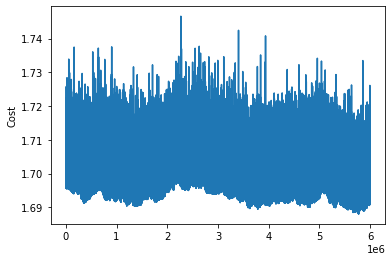

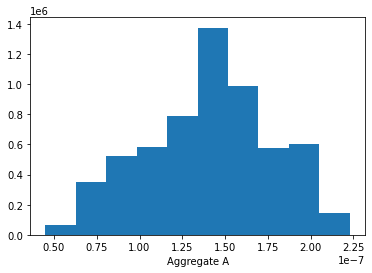

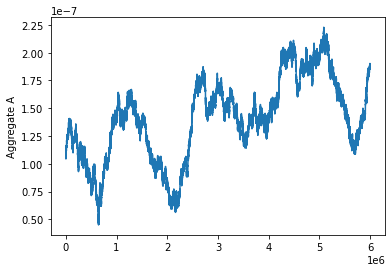

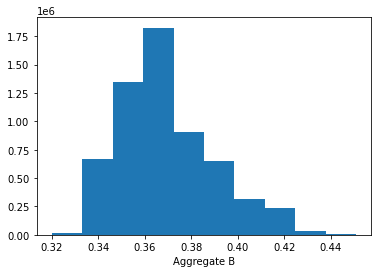

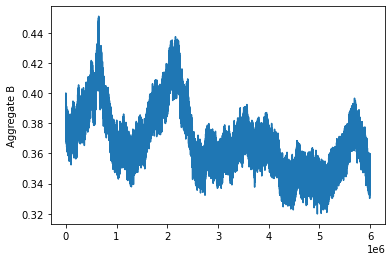

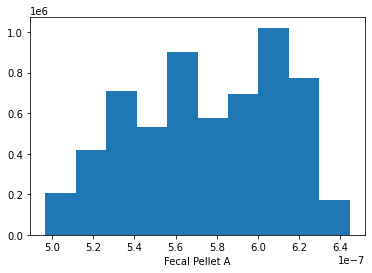

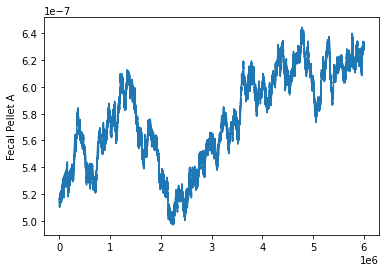

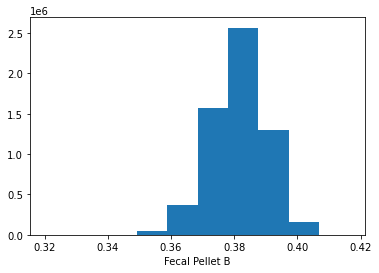

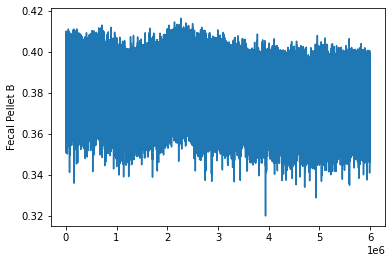

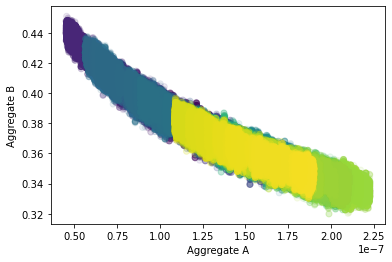

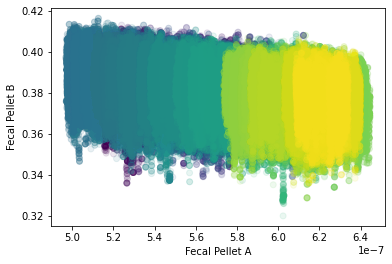

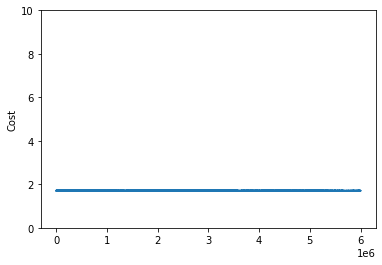

In [21]:
#just plotting
#import functions
import pandas as pd
import matplotlib.pyplot as plt
#load data
path = "D:/GIT/NGA_particles_flux_publication/Plots/Hardcoding_A_and_B_minimization_results/"
tracking_table = pd.read_pickle(f"{path}two_A_B_Ascale_1e-10_Bscale_0.005_Astart1.0712151377499967e-07_Bstart0.3936600848310677_exp_scale_300_#6000000/tracking_table.pkl")
#print(tracking_table)
#set parameters
scale = [1e-10,1e-10, 0.005, 0.005]
iterations = 6000000
exponent_scale = 300
x0 = [1.0712151377499967e-07, 5.15717616595888e-07, 0.3936600848310677, 0.366823259017074]
fig_name = f"two_A_B_Ascale_{scale[0]}_Bscale_{scale[2]}_Astart{x0[0]}_Bstart{x0[2]}_exp_scale_{exponent_scale}_#{iterations}" ### new
#fig_name = f"global_A&B_Ascale_{scale[0]}_Bscale_{scale[2]}_Astart{x0[0]}_Bstart{x0[2]}_exp_scale_{exponent_scale}_#{iterations}" ### new
#two_A&B_Ascale_1e-10_Bscale_1e-10_Astart6.6e-11_Bstart9e-12_exp_scale_300_#200000/old_cost_two_A&B_Ascale_1e-10_Bscale_1e-10_Astart6.6e-11_Bstart9e-12_exp_scale_300_#200000.png'
#plot data
plt.figure()
plt.plot(tracking_table.old_cost)
plt.ylabel("Cost")
plt.savefig(f'{path}{fig_name}/old_cost.png', dpi = 300, bbox_inches = 'tight')
plt.figure()
plt.hist(tracking_table.agg_a)
plt.xlabel("Aggregate A")
plt.savefig(f'{path}{fig_name}/agg_a_hist.png', dpi = 300, bbox_inches = 'tight')
plt.figure()
plt.plot(tracking_table.agg_a)
plt.ylabel("Aggregate A")
plt.savefig(f'{path}{fig_name}/agg_a_time.png', dpi = 300, bbox_inches = 'tight')
plt.figure()
plt.hist(tracking_table.agg_b)
plt.xlabel("Aggregate B")
plt.savefig(f'{path}{fig_name}/agg_b_hist.png', dpi = 300, bbox_inches = 'tight')
plt.figure()
plt.plot(tracking_table.agg_b)
plt.ylabel("Aggregate B")
plt.savefig(f'{path}{fig_name}/agg_b_time.png', dpi = 300, bbox_inches = 'tight')
plt.figure()
plt.hist(tracking_table.fp_a)
plt.xlabel("Fecal Pellet A")
plt.savefig(f'{path}{fig_name}/fp_a_hist.png', dpi = 300, bbox_inches = 'tight')
plt.figure()
plt.plot(tracking_table.fp_a)
plt.ylabel("Fecal Pellet A")
plt.savefig(f'{path}{fig_name}/fp_a_time.png', dpi = 300, bbox_inches = 'tight')
plt.figure()
plt.hist(tracking_table.fp_b)
plt.xlabel("Fecal Pellet B")
plt.savefig(f'{path}{fig_name}/fp_b_hist.png', dpi = 300, bbox_inches = 'tight')
plt.figure()
plt.plot(tracking_table.fp_b)
plt.ylabel("Fecal Pellet B")
plt.savefig(f'{path}{fig_name}/fp_b_time.png', dpi = 300, bbox_inches = 'tight')
plt.figure()
plt.scatter(tracking_table.agg_a, tracking_table.agg_b, c = range(0, iterations), alpha = 0.1)###New
plt.xlabel("Aggregate A")
plt.ylabel("Aggregate B")
plt.savefig(f'{path}{fig_name}/agg_a_vs_b.png', dpi = 300, bbox_inches = 'tight')
plt.figure()
plt.scatter(tracking_table.fp_a, tracking_table.fp_b, c = range(0, iterations), alpha = 0.1)###New
plt.xlabel("Fecal Pellet A")
plt.ylabel("Fecal Pellet B")
plt.savefig(f'{path}{fig_name}/fp_a_vs_b.png', dpi = 300, bbox_inches = 'tight')
plt.figure()
plt.plot(tracking_table.old_cost)
plt.ylabel("Cost")
plt.ylim([0, 10])
plt.savefig(f'{path}{fig_name}/old_cost_fixed_ylim.png', dpi = 300, bbox_inches = 'tight')
#delete the percent accepted figure
pd.set_option("display.precision", 20)
print(tracking_table.iloc[iterations-1])
pd.set_option("display.precision", 8)

In [68]:
#global A and B
#minimization function

#function that goes from total carbon / particle to c flux/particle
def flux_fit_global(unknown, pi, data,trap_flux,vol_calc):
    index = 0
    est_flux = []
    carbon =  np.zeros(len(data));
    def V2C(N,A,B,V):
        C = N*A*V**B
        return(C)
    #adding some values and variables to the table
    pi.loc['A', 'aggregate'] = unknown[0]
    pi.loc['A', 'dense_detritus'] = unknown[0]
    pi.loc['A', 'large_loose_pellet'] = unknown[0]
    pi.loc['A', 'long_fecal_pellet'] = unknown[0]
    pi.loc['A', 'mini_pellet'] = unknown[0]
    pi.loc['A', 'short_pellet'] = unknown[0]
    pi.loc['A', 'unidentified'] = unknown[0]
    pi.loc['B', 'aggregate'] = unknown[1]
    pi.loc['B', 'dense_detritus'] = unknown[1]
    pi.loc['B', 'large_loose_pellet'] = unknown[1]
    pi.loc['B', 'long_fecal_pellet'] = unknown[1]
    pi.loc['B', 'mini_pellet'] = unknown[1]
    pi.loc['B', 'short_pellet'] = unknown[1]
    pi.loc['B', 'unidentified'] = unknown[1]

    for x in np.unique(data.station):
        data_1station = data[data["station"] == x]
        meta_station = cruise_meta[cruise_meta["Station"] == x]
        cast = meta_station.Cast.astype(np.int64).reset_index(drop=True)
        cast2 = cast.item()
        #output_conc = pd.read_pickle(f"D:/GIT/NGA_particles_flux_publication/Data/SKQ201915S_{x}_uvp_conc_backgroundsub_edge_thresh.pkl")
        for x1 in np.unique(data_1station.depth):
            #meta_depth = depth_level[(depth_level["Cast"] == cast2) & (depth_level["Depth (m)"] == float(x1))]
            data_1depth = data_1station[data_1station["depth"] == x1]
            #data_1depth = data_1depth.reset_index()
            C = np.array([])
            for x3 in np.unique(data_1depth.tube):
                trap_flux[index] = depth_level[(depth_level["Cast"] == cast2) & (depth_level["Depth (m)"]== float(x1))]["Average POC Flux (mg C m^-2 d^-1)"]
                data_1tube =  data_1depth[data_1depth["tube"] == x3]
                #data_1tube = data_1tube.reset_index()
                #start here-sum of all types (sum of all sizes ( number flux * a (ESD to vol)^b ))
                for x2 in particle_types:
                    V = np.array(vol_calc.loc[:,x2], dtype = float) #edited
                    A = pi[x2][0]
                    B = pi[x2][1]
                    N = np.array(data_1tube[f'{x2}_number_counted'], dtype = float)
                    C = np.concatenate((C, V2C(N,A,B,V)), axis = 0)
                est_flux.append((C.sum(axis = 0)*float(data_1tube.imaged_area.iloc[0]))/(cruise_meta.Cast[11] * float(meta_station["Deployment Length (Days)"])))          
                index = index + 1
    residuals=np.log10(trap_flux)-np.log10(est_flux)
    this=sum(residuals**2)
    return this#, pi, trap_flux, est_flux, residuals

In [69]:
trap_flux = np.zeros(26) #edit this as you add more stations
x0 = [1e-09, 1]
#new_parameters = x0
#flux_fit_global(new_parameters, parameters, data2, trap_flux, vol_by_esd_type)
#sol = optimize.minimize(flux_fit_global, x0, args=(parameters, data2, trap_flux, vol_by_esd_type), 
#                        options = {'eps': 1e-12, "maxfun": 10000, "retall": False, "full_output": True})
#sol = optimize.fmin(flux_fit_global, x0, args=(parameters, data2, trap_flux, vol_by_esd_type), 
#                    maxfun = 10000, retall = False, full_output = True ) 

sol = optimize.minimize(flux_fit_global, x0, args=(parameters, data2, trap_flux, vol_by_esd_type) , method = 'L-BFGS-B', bounds = ((0, 1), (0,5),), options = {'eps': 1e-12, "maxfun": 10000, "retall": False, "full_output": True})# (0, 1))) ,jac = None, method = 'TNC'

print(sol)

C:\Users\STEPHA~1\AppData\Local\Temp/ipykernel_4384/92699260.py:10: OptimizeWarning: Unknown solver options: retall, full_output
  sol = optimize.minimize(flux_fit_global, x0, args=(parameters, data2, trap_flux, vol_by_esd_type) , method = 'L-BFGS-B', bounds = ((0, 1), (0,5),), options = {'eps': 1e-12, "maxfun": 10000, "retall": False, "full_output": True})# (0, 1))) ,jac = None, method = 'TNC'


      fun: 1.7703583631228013
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-6.65563160e+01, -6.66148551e-04])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 225
      nit: 42
     njev: 75
   status: 0
  success: True
        x: array([2.35471093e-07, 3.50654628e-01])


In [34]:
#Check how efficient the function flux_fit_global is 

#the first time you run this, you need to install the line_profiler function. Once it's installed, you just need to import it
#import sys
#!{sys.executable} -m pip install line_profiler

#import line_profiler function
%load_ext line_profiler

#set input variables for flux_fit_global function
trap_flux = np.zeros(26) #edit this as you add more stations
#starting values same as results of optimize.minimize
x0 = [2.35471093e-07, 3.50654628e-01]
new_parameters = x0
%lprun -f flux_fit_global flux_fit_global(new_parameters, parameters, data2, trap_flux, vol_by_esd_type)

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


Timer unit: 1e-07 s

Total time: 0.153394 s
File: C:\Users\STEPHA~1\AppData\Local\Temp/ipykernel_4760/3610858922.py
Function: flux_fit_global at line 5

Line #      Hits         Time  Per Hit   % Time  Line Contents
     5                                           def flux_fit_global(unknown, pi, data,trap_flux,vol_calc):
     6         1         51.0     51.0      0.0      index = 0
     7         1         25.0     25.0      0.0      est_flux = []
     8         1        229.0    229.0      0.0      carbon =  np.zeros(len(data));
     9         1         11.0     11.0      0.0      def V2C(N,A,B,V):
    10                                                   C = N*A*V**B
    11                                                   return(C)
    12                                               #adding some values and variables to the table
    13         1       3989.0   3989.0      0.3      pi.loc['A', 'aggregate'] = unknown[0]
    14         1       1807.0   1807.0      0.1      pi.loc['A'

1.7726217994156026
      a         b  old_cost
0   0.0  0.349838  1.772622
1   0.0  0.351475  1.778308
2   0.0  0.351591   1.78027
3   0.0  0.351355  1.778413
4   0.0  0.351513  1.780302
..  ...       ...       ...
95  0.0  0.351803   1.77143
96  0.0    0.3516  1.770909
97  0.0  0.349514  1.772317
98  0.0  0.349514  1.772317
99  0.0  0.349393  1.771763

[100 rows x 3 columns]
Your percent accepted rate is 97.0%.
If this number is below 23% consider decreasing one of your scale values or visa versa


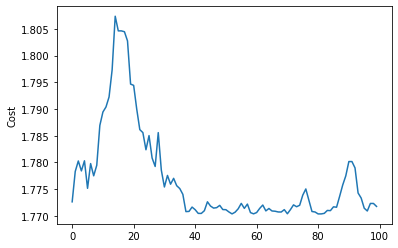

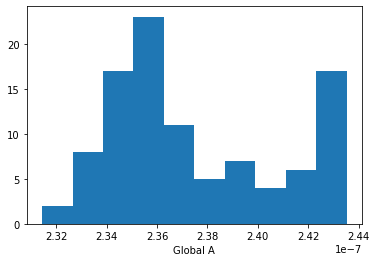

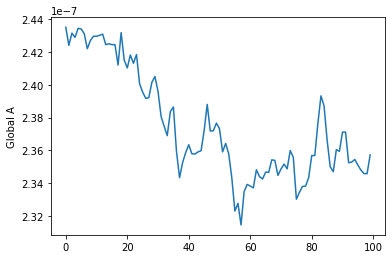

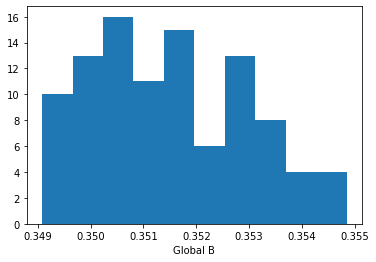

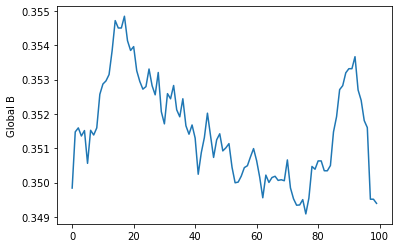

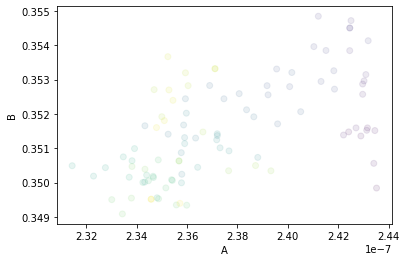

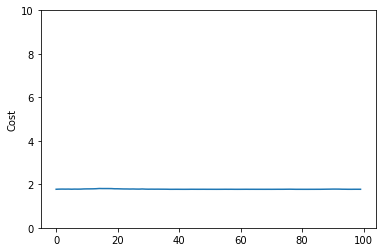

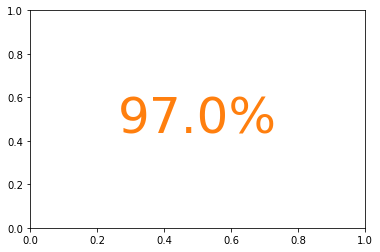

In [9]:
#hard coding minimization procedure using Tom's script in R Example Optimization via maximum likelihood
#One A and B global 
trap_flux = np.zeros(26) #edit this as you add more stations
#general starting values
#x0 = [10**(-9), 1]

#starting values same as results of optimize.minimize
x0 = [2.35471093e-07, 3.50654628e-01]

scale = [10**(-9), 0.0005]
iterations = 100
exponent_scale = 50 ###new
path = "D:/GIT/NGA_particles_flux_publication/Plots/Hardcoding_A_and_B_minimization_results/"
fig_name = f"global_A&B_Ascale_{scale[0]}_Bscale_{scale[1]}_Astart{x0[0]}_Bstart{x0[1]}_exp_scale_{exponent_scale}_#{iterations}" ### new
#fig_name = f"global_A&B_Ascale_{scale[0]}_Bscale_{scale[2]}_Astart{x0[0]}_Bstart{x0[2]}_exp_scale_{exponent_scale}_#{iterations}" ### new


#check if directory exists
isExist = os.path.exists(f"{path}{fig_name}")
#make directory if it doesn't exist 
if not isExist:
    # Create a new directory because it does not exist 
    os.makedirs(f"{path}{fig_name}")
    print("The new directory is created!")

counter = 0
old_cost = inf
new_parameters = x0
old_parameters = x0
header = ['a','b','old_cost']
tracking_table = pd.DataFrame(index = range(iterations), columns = range(len(header)))
tracking_table.columns = header

for i in range(0, iterations+1):
    new_cost, parameters, trap_flux, est_flux, residuals = flux_fit_global(new_parameters, parameters, data2, trap_flux, vol_by_esd_type)
    new_parameters = [parameters.loc['A', 'aggregate'], parameters.loc['B', 'aggregate']]
    ## Better fit, replace old location with new location
    if new_cost < old_cost or np.random.rand(1) < np.exp(-exponent_scale * (new_cost - old_cost)): #-0.5 changed to - 50
        old_cost = new_cost
        old_parameters = new_parameters
    ## Either way, take a step
    new_parameters = np.random.normal(loc = old_parameters, scale = scale, size = len(new_parameters))
new_cost, parameters, trap_flux, est_flux, residuals = flux_fit_global(new_parameters, parameters, data2, trap_flux, vol_by_esd_type)

print(new_cost)

for i in range(0, iterations+1):
    new_cost, parameters, trap_flux, est_flux, residuals = flux_fit_global(new_parameters, parameters, data2, trap_flux, vol_by_esd_type)
    new_parameters = [parameters.loc['A', 'aggregate'], parameters.loc['B', 'aggregate']]
    ## Better fit, replace old location with new location
    if new_cost < old_cost or np.random.rand(1) < np.exp(-exponent_scale * (new_cost - old_cost)): #-0.5 changed to - 50
        old_cost = new_cost
        old_parameters = new_parameters
        counter = counter + 1
    ## Either way, take a step
    new_parameters = np.random.normal(loc = old_parameters, scale = scale, size = len(new_parameters))
    tracking_table.a[i] = old_parameters[0]
    tracking_table.b[i] = old_parameters[1]
    tracking_table.old_cost[i] = old_cost
print(tracking_table)
tracking_table.to_pickle(f"{path}{fig_name}/tracking_table_{fig_name}.pkl")
percent_accepted = counter / iterations * 100
print(f"Your percent accepted rate is {percent_accepted}%.")
print("If this number is below 23% consider decreasing one of your scale values or visa versa")


import matplotlib.pyplot as plt
plt.figure()
plt.plot(tracking_table.old_cost)
plt.ylabel("Cost")
plt.savefig(f'{path}{fig_name}/old_cost_{fig_name}.png', dpi = 300, bbox_inches = 'tight')
plt.figure()
plt.hist(tracking_table.a)
plt.xlabel("Global A")
plt.savefig(f'{path}{fig_name}/a_hist_{fig_name}.png', dpi = 300, bbox_inches = 'tight')
plt.figure()
plt.plot(tracking_table.a)
plt.ylabel("Global A")
plt.savefig(f'{path}{fig_name}/a_time_{fig_name}.png', dpi = 300, bbox_inches = 'tight')
plt.figure()
plt.hist(tracking_table.b)
plt.xlabel("Global B")
plt.savefig(f'{path}{fig_name}/b_hist_{fig_name}.png', dpi = 300, bbox_inches = 'tight')
plt.figure()
plt.plot(tracking_table.b)
plt.ylabel("Global B")
plt.savefig(f'{path}{fig_name}/b_time_{fig_name}.png', dpi = 300, bbox_inches = 'tight')
plt.figure()
plt.scatter(tracking_table.a, tracking_table.b, c = range(0, iterations), alpha = 0.1)###New
plt.xlabel("A")
plt.ylabel("B")
plt.savefig(f'{path}{fig_name}/a_vs_b_{fig_name}.png', dpi = 300, bbox_inches = 'tight')
plt.figure()
plt.plot(tracking_table.old_cost)
plt.ylabel("Cost")
plt.ylim([0, 10])
plt.savefig(f'{path}{fig_name}/old_cost_fixed_ylim_{fig_name}.png', dpi = 300, bbox_inches = 'tight')
plt.figure()
text_kwargs = dict(ha='center', va='center', fontsize=50, color='C1')
plt.text(0.5, 0.5, f'{percent_accepted}%', **text_kwargs)
plt.savefig(f'{path}{fig_name}/percent_accepted_{fig_name}.png', dpi = 300, bbox_inches = 'tight')

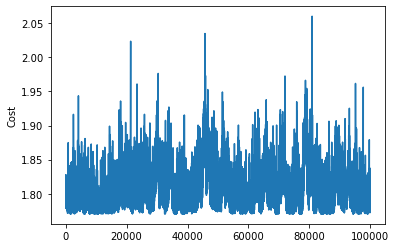

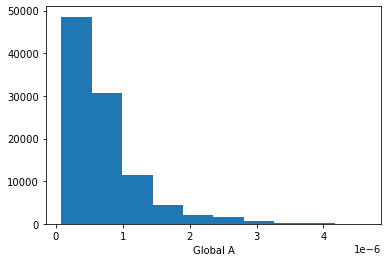

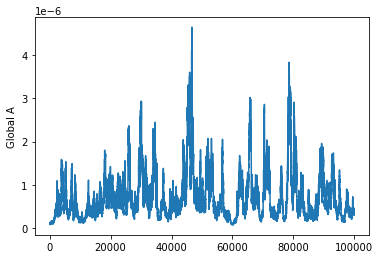

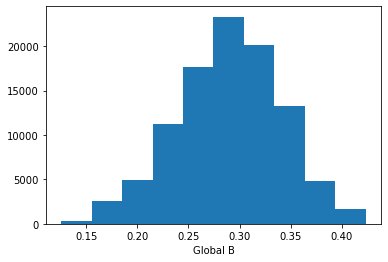

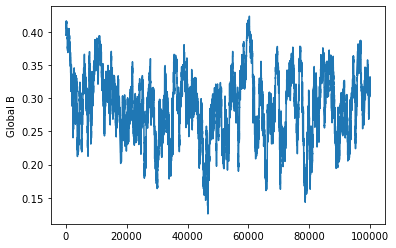

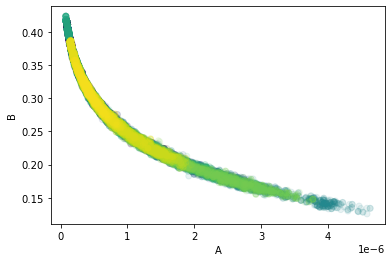

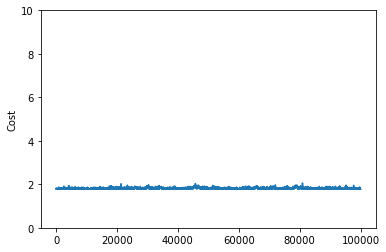

In [21]:
#just plotting
#import functions
import pandas as pd
import matplotlib.pyplot as plt
#load data
tracking_table = pd.read_pickle("D:/GIT/NGA_particles_flux_publication/Plots/Hardcoding_A_and_B_minimization_results/global_A&B_Ascale_1e-07_Bscale_0.005_Astart2.35471093e-07_Bstart0.350654628_exp_scale_50_#100000/tracking_table_global_A&B_Ascale_1e-07_Bscale_0.005_Astart2.35471093e-07_Bstart0.350654628_exp_scale_50_#100000.pkl")

#set parameters
scale = [1e-07, 0.005]
iterations = 100000
exponent_scale = 50
x0 = [2.35471093e-07, 0.350654628]
path = "D:/GIT/NGA_particles_flux_publication/Plots/Hardcoding_A_and_B_minimization_results/"
fig_name = f"global_A&B_Ascale_{scale[0]}_Bscale_{scale[1]}_Astart{x0[0]}_Bstart{x0[1]}_exp_scale_{exponent_scale}_#{iterations}" ### new

#plot data
plt.figure()
plt.plot(tracking_table.old_cost)
plt.ylabel("Cost")
plt.savefig(f'{path}{fig_name}/old_cost_{fig_name}.png', dpi = 300, bbox_inches = 'tight')
plt.figure()
plt.hist(tracking_table.a)
plt.xlabel("Global A")
plt.savefig(f'{path}{fig_name}/a_hist_{fig_name}.png', dpi = 300, bbox_inches = 'tight')
plt.figure()
plt.plot(tracking_table.a)
plt.ylabel("Global A")
plt.savefig(f'{path}{fig_name}/a_time_{fig_name}.png', dpi = 300, bbox_inches = 'tight')
plt.figure()
plt.hist(tracking_table.b)
plt.xlabel("Global B")
plt.savefig(f'{path}{fig_name}/b_hist_{fig_name}.png', dpi = 300, bbox_inches = 'tight')
plt.figure()
plt.plot(tracking_table.b)
plt.ylabel("Global B")
plt.savefig(f'{path}{fig_name}/b_time_{fig_name}.png', dpi = 300, bbox_inches = 'tight')
plt.figure()
plt.scatter(tracking_table.a, tracking_table.b, c = range(0, iterations), alpha = 0.1)###New
plt.xlabel("A")
plt.ylabel("B")
plt.savefig(f'{path}{fig_name}/a_vs_b_{fig_name}.png', dpi = 300, bbox_inches = 'tight')
plt.figure()
plt.plot(tracking_table.old_cost)
plt.ylabel("Cost")
plt.ylim([0, 10])
plt.savefig(f'{path}{fig_name}/old_cost_fixed_ylim_{fig_name}.png', dpi = 300, bbox_inches = 'tight')
#delete the percent accepted figure

In [64]:
#plotting model results

#import packages
import statistics
import matplotlib as mpl
from scipy import optimize

#load data
path = "D:/GIT/NGA_particles_flux_publication/Plots/Hardcoding_A_and_B_minimization_results/"
fig_name2 = "global_A_B_Ascale_1e-07_Bscale_0.005_Astart2.3547e-07_Bstart0.3506_exp_scale_50_#500000"
tracking_table2 = pd.read_pickle(f"{path}{fig_name2}/tracking_table.pkl")
#print(tracking_table2)

#95% confidence interval
#calculate mean
a_mean = statistics.mean(tracking_table2.a)
b_mean = statistics.mean(tracking_table2.b)

#2.5% and 97.5% -> -1.96s <= X <= 1.96s)
a_stdev = statistics.stdev(tracking_table2.a)
a_low = a_mean - 1.96*a_stdev
a_high = a_mean + 1.96*a_stdev
#print(f"The mean A value is {a_mean} with a 95% confidence iterval from {a_low} to {a_high}.")

b_stdev = statistics.stdev(tracking_table2.b)
b_low = b_mean - 1.96*b_stdev
b_high = b_mean + 1.96*b_stdev
#print(f"The mean B value is {b_mean} with a 95% confidence iterval from {b_low} to {b_high}.")

col_names = ['model_type', 'A_scale', 'B_scale', 'A_start', 'B_start', 'exp_scale','iterations','A_mean','A_low', 'A_high',
                  'B_mean','B_low', 'B_high']
df = pd.DataFrame(index = range(1), columns = range(len(col_names)))
df.columns = col_names
df.model_type[0] = "Global A and B"
df.A_scale[0] = 1e-07
df.B_scale[0] = 0.005
df.A_start[0] = 2.3547e-07
df.B_start[0] = 0.3506
df.exp_scale[0] = 50
df.iterations[0] = 500000
df.A_mean[0] = a_mean
df.A_low[0] = a_low
df.A_high[0] = a_high
df.B_mean[0] = b_mean
df.B_low[0] = b_low
df.B_high[0] = b_high
#print(df)
#df.to_excel(f'{path}{fig_name2}/model_summary.xlsx')

#format data for contourf
a = np.arange(0, 5e-06, 5e-06/100)
#print(a.shape)
b = np.arange(0.1, 0.5, 0.5/100)
#print(b)
A, B = np.meshgrid(a, b)
#print(B.shape)
Z = A * 0
#print(Z)
trap_flux = np.zeros(26) #edit this as you add more stations
for x1 in range(0, A.shape[0]):
    for y1 in range(0, A.shape[1]):
        x0 = [A[x1,y1], B[x1,y1]]
        this, pi, trap_flux, est_flux, residuals = flux_fit_global(x0, parameters, data2, trap_flux, vol_by_esd_type)
        Z[x1,y1] = this
print(Z)

[[136.28355937  88.01926472  70.56329316 ...   2.40314228   2.37457756
    2.34727403]
 [136.28355937  86.54324412  68.98037759 ...   2.2395864    2.21684884
    2.19531649]
 [136.28355937  85.0459736   67.38950598 ...   2.11031514   2.09344521
    2.07772393]
 ...
 [136.28355937   2.86719795   8.31762248 ... 125.78057923 126.28679464
  126.78888714]
 [136.28355937   3.25125949   9.22773215 ... 129.66351175 130.17758467
  130.68745487]
 [136.28355937   3.69555719  10.20002356 ... 133.61638897 134.13833905
  134.65600644]]


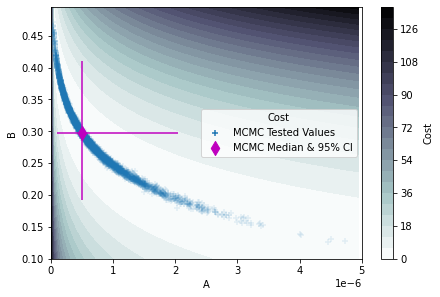

In [65]:
#plot results

#Import packages
import matplotlib.pyplot as plt
import statistics

origin = 'lower'
nr, nc = Z.shape
#print(f"x = {nr}")
#print(f"x = {nc}")
fig1, ax2 = plt.subplots(constrained_layout=True)
CS = ax2.contourf(A, B, Z, 25, cmap=plt.cm.bone_r, origin=origin)
plt.xlabel("A")
plt.ylabel("B")
#add model results
cost = plt.scatter(tracking_table2.a.iloc[::100], tracking_table2.b.iloc[::100],marker = '+', 
                   alpha = 0.1, label = "MCMC Tested Values")
#superimpose minimum model result value
#find minimum cost then get a and b at that value
#loc = tracking_table2[tracking_table2['old_cost']==min(tracking_table2.old_cost)].index.values
#min_mod = plt.plot(tracking_table2.a[loc[0]], tracking_table2.b[loc[0]],marker = 's', markerfacecolor=None, markeredgecolor = 'r', 
#                   markeredgewidth=2, label = "MCMC Minimum", linestyle="None")
#superimpose optimum minimum value
#opt_min = plt.plot(2.3547e-07, 0.3506,marker = 'o', markerfacecolor = 'gold', markeredgecolor = 'k', label = "Optimum Minimum",
#                  linestyle="None")
#superimpose mean model result and 95% confidence interval
#add 95% CI
#plt.errorbar(statistics.mean(tracking_table2.a), statistics.mean(tracking_table2.b),
#                           xerr=1.96*statistics.stdev(tracking_table2.a), yerr=1.96*statistics.stdev(tracking_table2.b), ecolor='m')

plt.errorbar(statistics.median(tracking_table2.a.iloc[::100]), statistics.median(tracking_table2.b.iloc[::100]),
            xerr=np.array([[statistics.median(tracking_table2.a.iloc[::100]) - np.quantile(tracking_table2.a.iloc[::100], 0.025)],
            [np.quantile(tracking_table2.a.iloc[::100], 0.975) - statistics.median(tracking_table2.a.iloc[::100])]]),
            yerr=np.array([[statistics.median(tracking_table2.b.iloc[::100]) - np.quantile(tracking_table2.b.iloc[::100], 0.025)],
            [np.quantile(tracking_table2.b.iloc[::100], 0.975) - statistics.median(tracking_table2.b.iloc[::100])]]),
                           ecolor='m')

mean_mod = plt.scatter(statistics.median(tracking_table2.a.iloc[::100]), 
                       statistics.median(tracking_table2.b.iloc[::100]),marker = 'd', c = 'm', s = 100, 
                      label = "MCMC Median & 95% CI")
plt.xlim([0, 5e-06])

# Make a colorbar for the ContourSet returned by the contourf call.
cbar = fig1.colorbar(CS)
cbar.ax.set_ylabel('Cost')

#make legend
leg = plt.legend(loc='center right', title = "Cost")
for lh in leg.legendHandles: 
    lh.set_alpha(1)

plt.savefig(f'{path}{fig_name2}/a_vs_b_model_results_comparison.png', dpi = 300, bbox_inches = 'tight')

In [36]:
#minimization function

#function that goes from total carbon / particle to c flux/particle
def flux_fit_unique(unknown, pi, data,trap_flux,vol_calc):
    index = 0
    est_flux = []
    carbon =  np.zeros(len(data));
    def V2C(N,A,B,V):
        C = N*A*V**B
        return(C)
    #adding some values and variables to the table
    pi.loc['A', 'aggregate'] = unknown[0]
    pi.loc['A', 'dense_detritus'] = unknown[1]
    pi.loc['A', 'large_loose_pellet'] = unknown[2]
    pi.loc['A', 'long_fecal_pellet'] = unknown[3]
    pi.loc['A', 'mini_pellet'] = unknown[4]
    pi.loc['A', 'short_pellet'] = unknown[5]
    pi.loc['A', 'unidentified'] = unknown[6]
    pi.loc['B', 'aggregate'] = unknown[7]
    pi.loc['B', 'dense_detritus'] = unknown[8]
    pi.loc['B', 'large_loose_pellet'] = unknown[9]
    pi.loc['B', 'long_fecal_pellet'] = unknown[10]
    pi.loc['B', 'mini_pellet'] = unknown[11]
    pi.loc['B', 'short_pellet'] = unknown[12]
    pi.loc['B', 'unidentified'] = unknown[13]

    for x in np.unique(data.station):
        data_1station = data[data["station"] == x]
        meta_station = cruise_meta[cruise_meta["Station"] == x]
        cast = meta_station.Cast.astype(np.int64).reset_index(drop=True)
        cast2 = cast.item()
        #output_conc = pd.read_pickle(f"D:/GIT/NGA_particles_flux_publication/Data/SKQ201915S_{x}_uvp_conc_backgroundsub_edge_thresh.pkl")
        for x1 in np.unique(data_1station.depth):
            #meta_depth = depth_level[(depth_level["Cast"] == cast2) & (depth_level["Depth (m)"] == float(x1))]
            data_1depth = data_1station[data_1station["depth"] == x1]
            #data_1depth = data_1depth.reset_index()
            C = np.array([])
            for x3 in np.unique(data_1depth.tube):
                trap_flux[index] = depth_level[(depth_level["Cast"] == cast2) & (depth_level["Depth (m)"] == float(x1))]["Average POC Flux (mg C m^-2 d^-1)"]
                data_1tube =  data_1depth[data_1depth["tube"] == x3]
                #data_1tube = data_1tube.reset_index()
                #start here-sum of all types (sum of all sizes ( number flux * a (ESD to vol)^b ))
                for x2 in particle_types:
                    V = np.array(vol_calc.loc[:,x2], dtype = float) #edited
                    A = pi[x2][0]
                    B = pi[x2][1]
                    N = np.array(data_1tube[f'{x2}_number_counted'], dtype = float)
                    C = np.concatenate((C, V2C(N,A,B,V)), axis = 0)
                est_flux.append((C.sum(axis = 0)*float(data_1tube.imaged_area.iloc[0]))/(cruise_meta.Cast[11] * float(meta_station["Deployment Length (Days)"])))          
                index = index + 1
    residuals=np.log10(trap_flux)-np.log10(est_flux)
    this=sum(residuals**2)
    return this, pi, trap_flux, est_flux, residuals

1.1076612702617457
       agg_a      dd_a llp_a lfp_a      mp_a      sp_a     uid_a     agg_b  \
0   0.000009  0.002205   0.0  -0.0  0.000951  0.001968  0.000004  0.002868   
1   0.000009  0.002205   0.0  -0.0  0.000951  0.001968  0.000004  0.003058   
2   0.000009  0.002205   0.0  -0.0  0.000951  0.001968  0.000004  0.003037   
3   0.000009  0.002205   0.0  -0.0  0.000951  0.001968  0.000004  0.003183   
4   0.000009  0.002205   0.0  -0.0  0.000951  0.001968  0.000004  0.003113   
..       ...       ...   ...   ...       ...       ...       ...       ...   
95  0.000009  0.002205  -0.0  -0.0  0.000951  0.001968  0.000004  0.007679   
96  0.000009  0.002205  -0.0  -0.0  0.000951  0.001968  0.000004  0.007803   
97  0.000009  0.002205  -0.0  -0.0  0.000951  0.001968  0.000004  0.007978   
98  0.000009  0.002205  -0.0  -0.0  0.000951  0.001968  0.000004  0.008642   
99  0.000009  0.002205  -0.0  -0.0  0.000951  0.001968  0.000004   0.00868   

        dd_b     llp_b     lfp_b      mp_b  

C:\Users\STEPHA~1\AppData\Local\Temp/ipykernel_4760/296697852.py:169: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


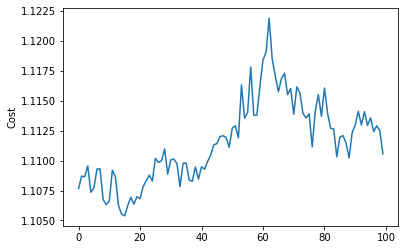

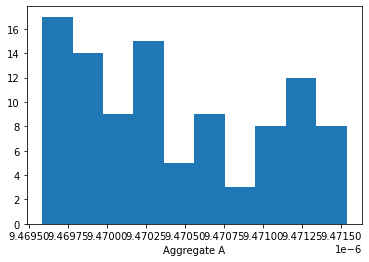

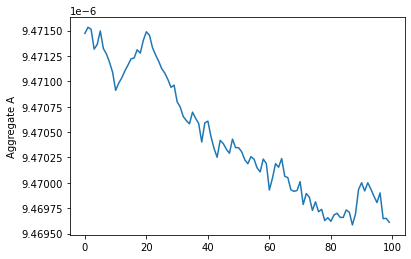

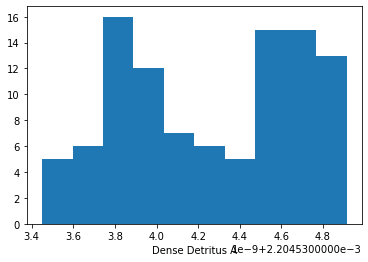

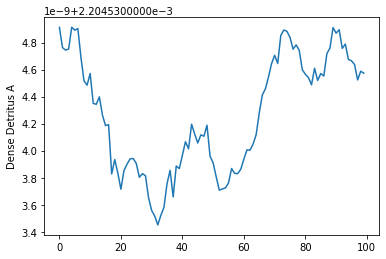

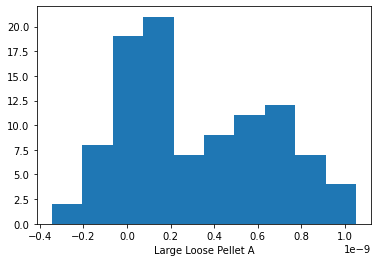

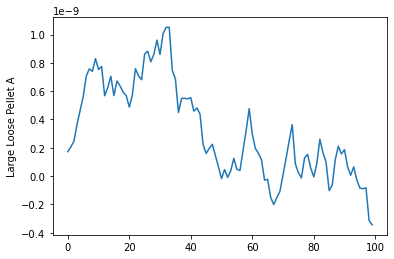

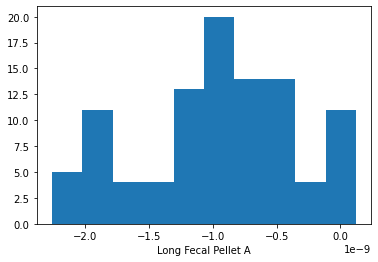

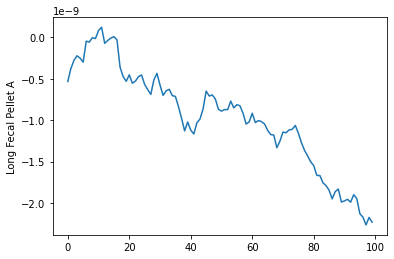

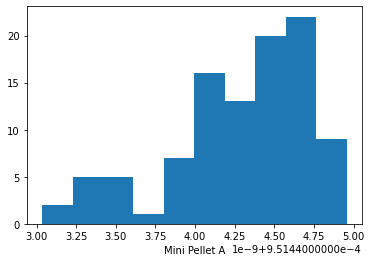

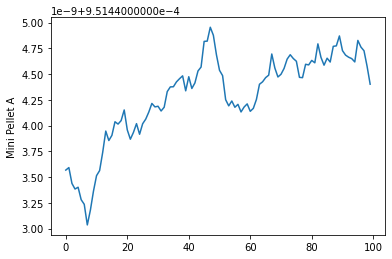

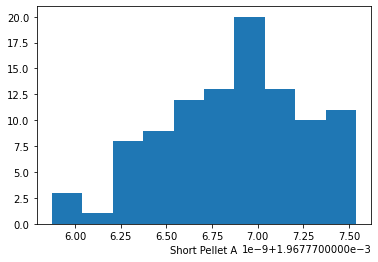

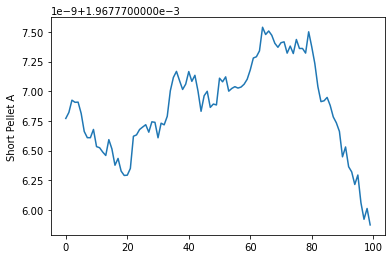

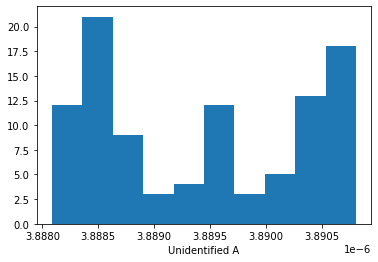

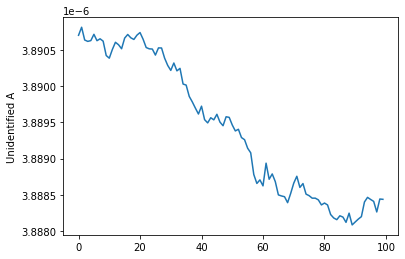

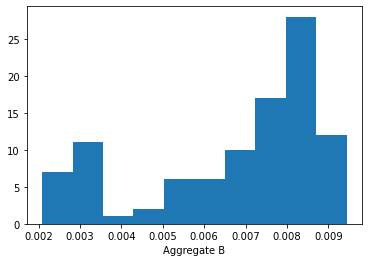

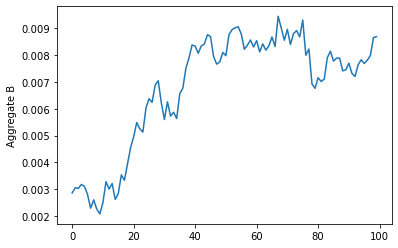

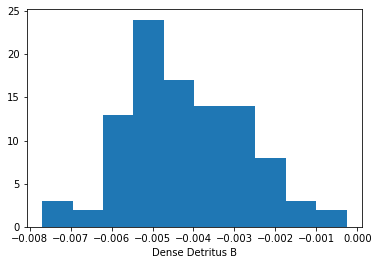

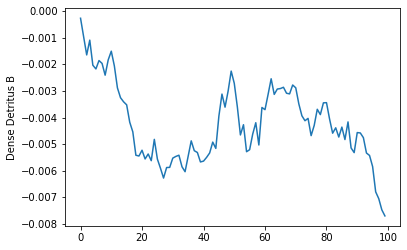

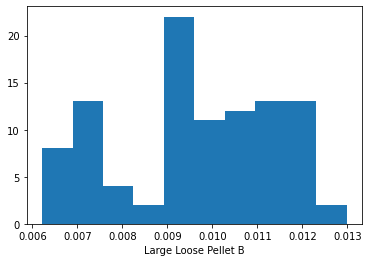

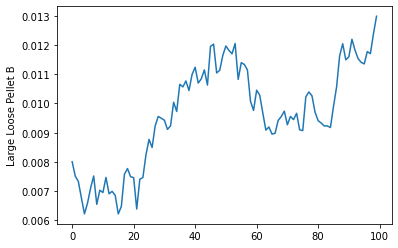

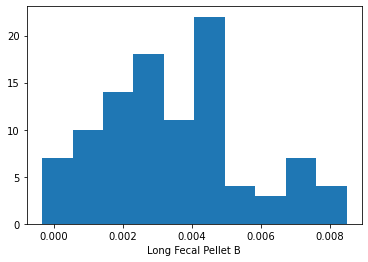

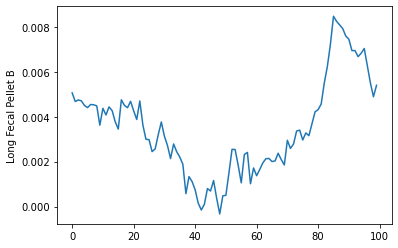

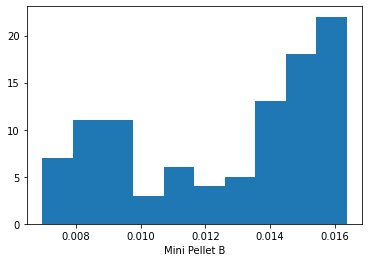

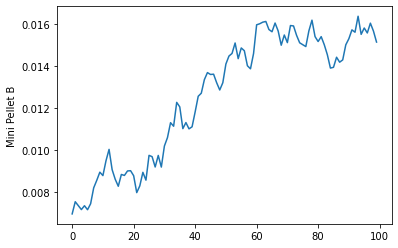

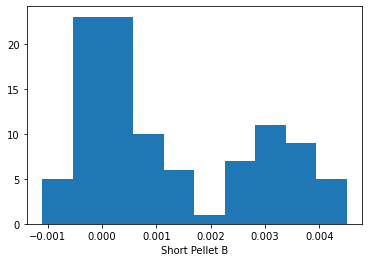

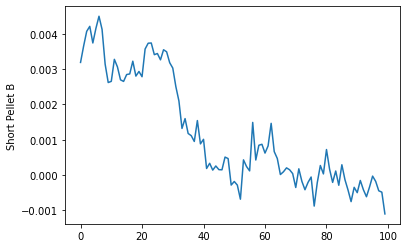

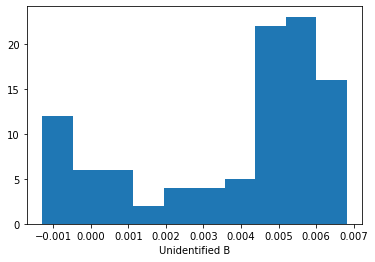

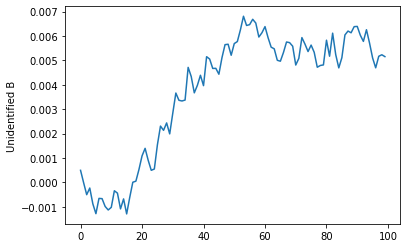

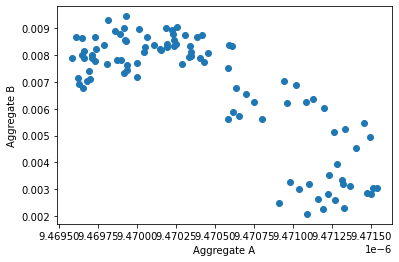

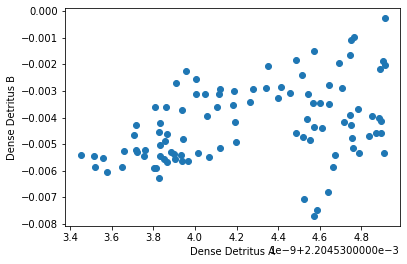

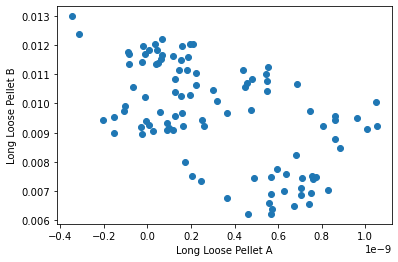

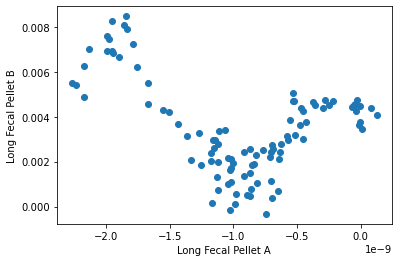

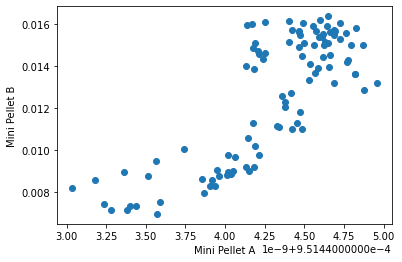

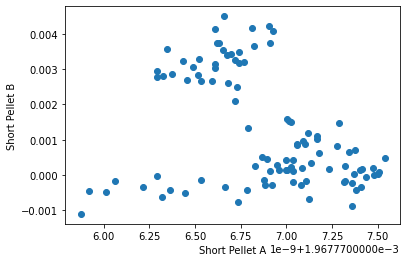

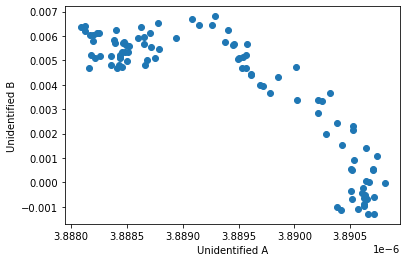

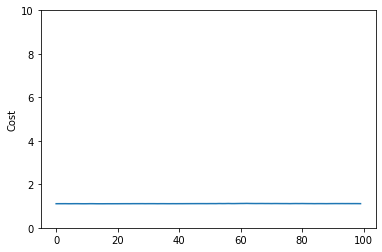

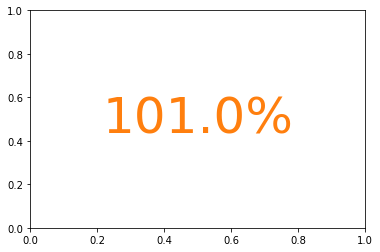

In [37]:
#hard coding minimization procedure using Tom's script in R Example Optimization via maximum likelihood
#Unique A and B values for every particle type
trap_flux = np.zeros(26) #edit this as you add more stations

#general starting values
#x0 = [10**(-9),10**(-9),10**(-9),10**(-9),10**(-9),10**(-9),10**(-9), 1,1,1,1,1,1,1]

#starting values same as results of optimize.minimize
x0 = [9.47022931e-06, 2.20453514e-03, 0.00000000e+00, 0.00000000e+00,
       9.51445132e-04, 1.96777658e-03, 3.88965539e-06, 1.24858052e-06,
       9.95475019e-06, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.57452628e-05, 7.36891391e-06]
scale = [10**(-10),10**(-10),10**(-10),10**(-10),10**(-10),10**(-10),10**(-10),
         0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005]
iterations = 100
exponent_scale = 50
fig_name = f"unique_A&B_Ascale_{scale[0]}_Bscale_{scale[7]}_Astart{x0[0]}_Bstart{x0[7]}_exp_scale_{exponent_scale}_#{iterations}" ### new

#check if directory exists
isExist = os.path.exists(f"{path}{fig_name}")
#make directory if it doesn't exist 
if not isExist:
    # Create a new directory because it does not exist 
    os.makedirs(f"{path}{fig_name}")
    print("The new directory is created!")

counter = 0
old_cost = inf
new_parameters = x0
old_parameters = x0
header = ['agg_a','dd_a','llp_a','lfp_a','mp_a','sp_a','uid_a','agg_b','dd_b','llp_b','lfp_b','mp_b','sp_b','uid_b','old_cost']
tracking_table = pd.DataFrame(index = range(iterations), columns = range(len(header)))
tracking_table.columns = header

for i in range(0, iterations+1):
    new_cost, parameters, trap_flux, est_flux, residuals = flux_fit_unique(new_parameters, parameters, data2, trap_flux, vol_by_esd_type)
    new_parameters = [parameters.loc['A', 'aggregate'],parameters.loc['A', 'dense_detritus'],parameters.loc['A', 'large_loose_pellet'],
                      parameters.loc['A', 'long_fecal_pellet'],parameters.loc['A', 'mini_pellet'],parameters.loc['A', 'short_pellet'],
                      parameters.loc['A', 'unidentified'],parameters.loc['B', 'aggregate'], parameters.loc['B', 'dense_detritus'], 
                     parameters.loc['B', 'large_loose_pellet'], parameters.loc['B', 'long_fecal_pellet'], parameters.loc['B', 'mini_pellet'], 
                     parameters.loc['B', 'short_pellet'], parameters.loc['B', 'unidentified']]
    ## Better fit, replace old location with new location
    if new_cost < old_cost or np.random.rand(1) < np.exp(-exponent_scale * (new_cost - old_cost)): #-0.5 changed to - 50
        old_cost = new_cost
        old_parameters = new_parameters
    ## Either way, take a step
    new_parameters = np.random.normal(loc = old_parameters, scale = scale, size = len(new_parameters))
new_cost, parameters, trap_flux, est_flux, residuals = flux_fit_unique(new_parameters, parameters, data2, trap_flux, vol_by_esd_type)

print(new_cost)

for i in range(0, iterations+1):
    new_cost, parameters, trap_flux, est_flux, residuals = flux_fit_unique(new_parameters, parameters, data2, trap_flux, vol_by_esd_type)
    new_parameters = [parameters.loc['A', 'aggregate'],parameters.loc['A', 'dense_detritus'],parameters.loc['A', 'large_loose_pellet'],
                      parameters.loc['A', 'long_fecal_pellet'],parameters.loc['A', 'mini_pellet'],parameters.loc['A', 'short_pellet'],
                      parameters.loc['A', 'unidentified'],parameters.loc['B', 'aggregate'], parameters.loc['B', 'dense_detritus'], 
                     parameters.loc['B', 'large_loose_pellet'], parameters.loc['B', 'long_fecal_pellet'], parameters.loc['B', 'mini_pellet'], 
                     parameters.loc['B', 'short_pellet'], parameters.loc['B', 'unidentified']]    ## Better fit, replace old location with new location
    if new_cost < old_cost or np.random.rand(1) < np.exp(-exponent_scale * (new_cost - old_cost)): #-0.5 changed to - 50
        old_cost = new_cost
        old_parameters = new_parameters
        counter = counter + 1
    ## Either way, take a step
    new_parameters = np.random.normal(loc = old_parameters, scale = scale, size = len(new_parameters))
    tracking_table.agg_a[i] = old_parameters[0]
    tracking_table.dd_a[i] = old_parameters[1]
    tracking_table.llp_a[i] = old_parameters[2]
    tracking_table.lfp_a[i] = old_parameters[3]
    tracking_table.mp_a[i] = old_parameters[4]
    tracking_table.sp_a[i] = old_parameters[5]
    tracking_table.uid_a[i] = old_parameters[6]
    tracking_table.agg_b[i] = old_parameters[7]
    tracking_table.dd_b[i] = old_parameters[8]
    tracking_table.llp_b[i] = old_parameters[9]
    tracking_table.lfp_b[i] = old_parameters[10]
    tracking_table.mp_b[i] = old_parameters[11]
    tracking_table.sp_b[i] = old_parameters[12]
    tracking_table.uid_b[i] = old_parameters[13]
    tracking_table.old_cost[i] = old_cost
print(tracking_table)
tracking_table.to_pickle(f"{path}{fig_name}/tracking_table_{fig_name}.pkl")
percent_accepted = counter / iterations * 100
print(f"Your percent accepted rate is {percent_accepted}%.")
print("If this number is below 23% consider decreasing one of your scale values or visa versa")

import matplotlib.pyplot as plt
plt.figure()
plt.plot(tracking_table.old_cost)
plt.ylabel("Cost")
plt.savefig(f'{path}{fig_name}/old_cost_{fig_name}.png', dpi = 300, bbox_inches = 'tight')
plt.figure()
plt.hist(tracking_table.agg_a)
plt.xlabel("Aggregate A")
plt.savefig(f'{path}{fig_name}/agg_a_hist_{fig_name}.png', dpi = 300, bbox_inches = 'tight')
plt.figure()
plt.plot(tracking_table.agg_a)
plt.ylabel("Aggregate A")
plt.savefig(f'{path}{fig_name}/agg_a_time_{fig_name}.png', dpi = 300, bbox_inches = 'tight')
plt.figure()
plt.hist(tracking_table.dd_a)
plt.xlabel("Dense Detritus A")
plt.savefig(f'{path}{fig_name}/dd_a_hist_{fig_name}.png', dpi = 300, bbox_inches = 'tight')
plt.figure()
plt.plot(tracking_table.dd_a)
plt.ylabel("Dense Detritus A")
plt.savefig(f'{path}{fig_name}/dd_a_time_{fig_name}.png', dpi = 300, bbox_inches = 'tight')
plt.figure()
plt.hist(tracking_table.llp_a)
plt.xlabel("Large Loose Pellet A")
plt.savefig(f'{path}{fig_name}/llp_a_hist_{fig_name}.png', dpi = 300, bbox_inches = 'tight')
plt.figure()
plt.plot(tracking_table.llp_a)
plt.ylabel("Large Loose Pellet A")
plt.savefig(f'{path}{fig_name}/llp_a_time_{fig_name}.png', dpi = 300, bbox_inches = 'tight')
plt.figure()
plt.hist(tracking_table.lfp_a)
plt.xlabel("Long Fecal Pellet A")
plt.savefig(f'{path}{fig_name}/lfp_a_hist_{fig_name}.png', dpi = 300, bbox_inches = 'tight')
plt.figure()
plt.plot(tracking_table.lfp_a)
plt.ylabel("Long Fecal Pellet A")
plt.savefig(f'{path}{fig_name}/lfp_a_time_{fig_name}.png', dpi = 300, bbox_inches = 'tight')
plt.figure()
plt.hist(tracking_table.mp_a)
plt.xlabel("Mini Pellet A")
plt.savefig(f'{path}{fig_name}/mp_a_hist_{fig_name}.png', dpi = 300, bbox_inches = 'tight')
plt.figure()
plt.plot(tracking_table.mp_a)
plt.ylabel("Mini Pellet A")
plt.savefig(f'{path}{fig_name}/mp_a_time_{fig_name}.png', dpi = 300, bbox_inches = 'tight')
plt.figure()
plt.hist(tracking_table.sp_a)
plt.xlabel("Short Pellet A")
plt.savefig(f'{path}{fig_name}/sp_a_hist_{fig_name}.png', dpi = 300, bbox_inches = 'tight')
plt.figure()
plt.plot(tracking_table.sp_a)
plt.ylabel("Short Pellet A")
plt.savefig(f'{path}{fig_name}/sp_a_time_{fig_name}.png', dpi = 300, bbox_inches = 'tight')
plt.figure()
plt.hist(tracking_table.uid_a)
plt.xlabel("Unidentified A")
plt.savefig(f'{path}{fig_name}/uid_a_hist_{fig_name}.png', dpi = 300, bbox_inches = 'tight')
plt.figure()
plt.plot(tracking_table.uid_a)
plt.ylabel("Unidentified A")
plt.savefig(f'{path}{fig_name}/uid_a_time_{fig_name}.png', dpi = 300, bbox_inches = 'tight')
plt.figure()
plt.hist(tracking_table.agg_b)
plt.xlabel("Aggregate B")
plt.savefig(f'{path}{fig_name}/agg_b_hist_{fig_name}.png', dpi = 300, bbox_inches = 'tight')
plt.figure()
plt.plot(tracking_table.agg_b)
plt.ylabel("Aggregate B")
plt.savefig(f'{path}{fig_name}/agg_b_time_{fig_name}.png', dpi = 300, bbox_inches = 'tight')
plt.figure()
plt.hist(tracking_table.dd_b)
plt.xlabel("Dense Detritus B")
plt.savefig(f'{path}{fig_name}/dd_b_hist_{fig_name}.png', dpi = 300, bbox_inches = 'tight')
plt.figure()
plt.plot(tracking_table.dd_b)
plt.ylabel("Dense Detritus B")
plt.savefig(f'{path}{fig_name}/dd_b_time_{fig_name}.png', dpi = 300, bbox_inches = 'tight')
plt.figure()
plt.hist(tracking_table.llp_b)
plt.xlabel("Large Loose Pellet B")
plt.savefig(f'{path}{fig_name}/llp_b_hist_{fig_name}.png', dpi = 300, bbox_inches = 'tight')
plt.figure()
plt.plot(tracking_table.llp_b)
plt.ylabel("Large Loose Pellet B")
plt.savefig(f'{path}{fig_name}/llp_b_time_{fig_name}.png', dpi = 300, bbox_inches = 'tight')
plt.figure()
plt.hist(tracking_table.lfp_b)
plt.xlabel("Long Fecal Pellet B")
plt.savefig(f'{path}{fig_name}/lfp_b_hist_{fig_name}.png', dpi = 300, bbox_inches = 'tight')
plt.figure()
plt.plot(tracking_table.lfp_b)
plt.ylabel("Long Fecal Pellet B")
plt.savefig(f'{path}{fig_name}/lfp_b_time_{fig_name}.png', dpi = 300, bbox_inches = 'tight')
plt.figure()
plt.hist(tracking_table.mp_b)
plt.xlabel("Mini Pellet B")
plt.savefig(f'{path}{fig_name}/mp_b_hist_{fig_name}.png', dpi = 300, bbox_inches = 'tight')
plt.figure()
plt.plot(tracking_table.mp_b)
plt.ylabel("Mini Pellet B")
plt.savefig(f'{path}{fig_name}/mp_b_time_{fig_name}.png', dpi = 300, bbox_inches = 'tight')
plt.figure()
plt.hist(tracking_table.sp_b)
plt.xlabel("Short Pellet B")
plt.savefig(f'{path}{fig_name}/sp_b_hist_{fig_name}.png', dpi = 300, bbox_inches = 'tight')
plt.figure()
plt.plot(tracking_table.sp_b)
plt.ylabel("Short Pellet B")
plt.savefig(f'{path}{fig_name}/sp_b_time_{fig_name}.png', dpi = 300, bbox_inches = 'tight')
plt.figure()
plt.hist(tracking_table.uid_b)
plt.xlabel("Unidentified B")
plt.savefig(f'{path}{fig_name}/uid_b_hist_{fig_name}.png', dpi = 300, bbox_inches = 'tight')
plt.figure()
plt.plot(tracking_table.uid_b)
plt.ylabel("Unidentified B")
plt.savefig(f'{path}{fig_name}/uid_b_time_{fig_name}.png', dpi = 300, bbox_inches = 'tight')
plt.figure()
plt.scatter(tracking_table.agg_a, tracking_table.agg_b)
plt.xlabel("Aggregate A")
plt.ylabel("Aggregate B")
plt.savefig(f'{path}{fig_name}/agg_a_vs_b_{fig_name}.png', dpi = 300, bbox_inches = 'tight')
plt.figure()
plt.scatter(tracking_table.dd_a, tracking_table.dd_b)
plt.xlabel("Dense Detritus A")
plt.ylabel("Dense Detritus B")
plt.savefig(f'{path}{fig_name}/dd_a_vs_b_{fig_name}.png', dpi = 300, bbox_inches = 'tight')
plt.figure()
plt.scatter(tracking_table.llp_a, tracking_table.llp_b)
plt.xlabel("Long Loose Pellet A")
plt.ylabel("Long Loose Pellet B")
plt.savefig(f'{path}{fig_name}/llp_a_vs_b_{fig_name}.png', dpi = 300, bbox_inches = 'tight')
plt.figure()
plt.scatter(tracking_table.lfp_a, tracking_table.lfp_b)
plt.xlabel("Long Fecal Pellet A")
plt.ylabel("Long Fecal Pellet B")
plt.savefig(f'{path}{fig_name}/lfp_a_vs_b_{fig_name}.png', dpi = 300, bbox_inches = 'tight')
plt.figure()
plt.scatter(tracking_table.mp_a, tracking_table.mp_b)
plt.xlabel("Mini Pellet A")
plt.ylabel("Mini Pellet B")
plt.savefig(f'{path}{fig_name}/mp_a_vs_b_{fig_name}.png', dpi = 300, bbox_inches = 'tight')
plt.figure()
plt.scatter(tracking_table.sp_a, tracking_table.sp_b)
plt.xlabel("Short Pellet A")
plt.ylabel("Short Pellet B")
plt.savefig(f'{path}{fig_name}/sp_a_vs_b_{fig_name}.png', dpi = 300, bbox_inches = 'tight')
plt.figure()
plt.scatter(tracking_table.uid_a, tracking_table.uid_b)
plt.xlabel("Unidentified A")
plt.ylabel("Unidentified B")
plt.savefig(f'{path}{fig_name}/uid_a_vs_b_{fig_name}.png', dpi = 300, bbox_inches = 'tight')
plt.figure()
plt.plot(tracking_table.old_cost)
plt.ylabel("Cost")
plt.ylim([0, 10])
plt.savefig(f'{path}{fig_name}/old_cost_fixed_ylim_{fig_name}.png', dpi = 300, bbox_inches = 'tight')
plt.figure()
text_kwargs = dict(ha='center', va='center', fontsize=50, color='C1')
plt.text(0.5, 0.5, f'{percent_accepted}%', **text_kwargs)
plt.savefig(f'{path}{fig_name}/percent_accepted_{fig_name}.png', dpi = 300, bbox_inches = 'tight')

In [12]:
#global A and B
#minimization function

#function that goes from total carbon / particle to c flux/particle
def flux_fit_global_min(unknown, pi, data,trap_flux,vol_calc):
    index = 0
    est_flux = []
    carbon =  np.zeros(len(data));
    def V2C(N,A,B,V):
        C = N*A*V**B
        return(C)
    #adding some values and variables to the table
    pi.loc['A', 'aggregate'] = unknown[0]
    pi.loc['A', 'dense_detritus'] = unknown[0]
    pi.loc['A', 'large_loose_pellet'] = unknown[0]
    pi.loc['A', 'long_fecal_pellet'] = unknown[0]
    pi.loc['A', 'mini_pellet'] = unknown[0]
    pi.loc['A', 'short_pellet'] = unknown[0]
    pi.loc['A', 'unidentified'] = unknown[0]
    pi.loc['B', 'aggregate'] = unknown[1]
    pi.loc['B', 'dense_detritus'] = unknown[1]
    pi.loc['B', 'large_loose_pellet'] = unknown[1]
    pi.loc['B', 'long_fecal_pellet'] = unknown[1]
    pi.loc['B', 'mini_pellet'] = unknown[1]
    pi.loc['B', 'short_pellet'] = unknown[1]
    pi.loc['B', 'unidentified'] = unknown[1]

    for x in np.unique(data.station):
        data_1station = data[data["station"] == x]
        meta_station = cruise_meta[cruise_meta["Station"] == x]
        cast = meta_station.Cast.astype(np.int64).reset_index(drop=True)
        cast2 = cast.item()
        #output_conc = pd.read_pickle(f"D:/GIT/NGA_particles_flux_publication/Data/SKQ201915S_{x}_uvp_conc_backgroundsub_edge_thresh.pkl")
        for x1 in np.unique(data_1station.depth):
            #meta_depth = depth_level[(depth_level["Cast"] == cast2) & (depth_level["Depth (m)"] == float(x1))]
            data_1depth = data_1station[data_1station["depth"] == x1]
            #data_1depth = data_1depth.reset_index()
            C = np.array([])
            for x3 in np.unique(data_1depth.tube):
                trap_flux[index] = depth_level[(depth_level["Cast"] == cast2) & (depth_level["Depth (m)"] == float(x1))]["Average POC Flux (mg C m^-2 d^-1)"]
                data_1tube =  data_1depth[data_1depth["tube"] == x3]
                data_1tube = data_1tube.reset_index()
                #start here-sum of all types (sum of all sizes ( number flux * a (ESD to vol)^b ))
                for x2 in particle_types:
                    V = np.array(vol_calc.loc[:,x2], dtype = float) #edited
                    A = pi[x2][0]
                    B = pi[x2][1]
                    N = np.array(data_1tube[f'{x2}_number_counted'], dtype = float)
                    C = np.concatenate((C, V2C(N,A,B,V)), axis = 0)
                est_flux.append((C.sum(axis = 0)*float(data_1tube.imaged_area.iloc[0]))/(cruise_meta.Cast[11] * float(meta_station["Deployment Length (Days)"])))          
                index = index + 1
    residuals=np.log10(trap_flux)-np.log10(est_flux)
    this=sum(residuals**2)
    return this

In [13]:
#script to call minimization function

#data2 needs index size of 26?

#unknown = [10**(-9), 10**(-9), 1, 1]
#sol = flux_fit(unknown, parameters, data2)


#data_1station = data2[(data2["station"] == 'GAK1') | (data2["station"] == 'GAK15')  | (data2["station"] == 'GAK5') | (data2["station"] == 'KOD5') ] #| (data2["station"] == 'GAK5')
#print(data_1station)                                                                                                      


from scipy import optimize
x0 = [10**(-9), 1]
trap_flux = np.zeros(26) #edit this as you add more stations
#sol = optimize.fmin(flux_fit, x0, args=(parameters, data2), maxfun = 10000, retall = False, full_output = True ) #, method = 'TNC'
sol = optimize.minimize(flux_fit_global_min, x0, args=(parameters, data2, trap_flux, vol_by_esd_type) , method = 'L-BFGS-B', bounds = ((0, 1), (0,5),), options = {'eps': 1e-12, "maxfun": 10000, "retall": False, "full_output": True})# (0, 1))) ,jac = None, method = 'TNC'
#sol = optimize.fmin_l_bfgs_b(flux_fit, x0, args=(parameters, data_1station),bounds = [(0, 1), (0, 1), (0, 5), (0,5)], maxfun = 10000,approx_grad = True,  iprint = 0, epsilon = 1e-12) #

print(sol)

C:\Users\STEPHA~1\AppData\Local\Temp/ipykernel_8360/1095334617.py:17: OptimizeWarning: Unknown solver options: retall, full_output
  sol = optimize.minimize(flux_fit_global_min, x0, args=(parameters, data2, trap_flux, vol_by_esd_type) , method = 'L-BFGS-B', bounds = ((0, 1), (0,5),), options = {'eps': 1e-12, "maxfun": 10000, "retall": False, "full_output": True})# (0, 1))) ,jac = None, method = 'TNC'


      fun: 1.7703583631228013
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-6.65563160e+01, -6.66148551e-04])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 225
      nit: 42
     njev: 75
   status: 0
  success: True
        x: array([2.35471093e-07, 3.50654628e-01])


In [40]:
#global A and B
#minimization function

#function that goes from total carbon / particle to c flux/particle
def flux_fit_unique_min(unknown, pi, data,trap_flux,vol_calc):
    index = 0
    est_flux = []
    carbon =  np.zeros(len(data));
    def V2C(N,A,B,V):
        C = N*A*V**B
        return(C)
    #adding some values and variables to the table
    pi.loc['A', 'aggregate'] = unknown[0]
    pi.loc['A', 'dense_detritus'] = unknown[1]
    pi.loc['A', 'large_loose_pellet'] = unknown[2]
    pi.loc['A', 'long_fecal_pellet'] = unknown[3]
    pi.loc['A', 'mini_pellet'] = unknown[4]
    pi.loc['A', 'short_pellet'] = unknown[5]
    pi.loc['A', 'unidentified'] = unknown[6]
    pi.loc['B', 'aggregate'] = unknown[7]
    pi.loc['B', 'dense_detritus'] = unknown[8]
    pi.loc['B', 'large_loose_pellet'] = unknown[9]
    pi.loc['B', 'long_fecal_pellet'] = unknown[10]
    pi.loc['B', 'mini_pellet'] = unknown[11]
    pi.loc['B', 'short_pellet'] = unknown[12]
    pi.loc['B', 'unidentified'] = unknown[13]

    for x in np.unique(data.station):
        data_1station = data[data["station"] == x]
        meta_station = cruise_meta[cruise_meta["Station"] == x]
        cast = meta_station.Cast.astype(np.int64).reset_index(drop=True)
        cast2 = cast.item()
        #output_conc = pd.read_pickle(f"D:/GIT/NGA_particles_flux_publication/Data/SKQ201915S_{x}_uvp_conc_backgroundsub_edge_thresh.pkl")
        for x1 in np.unique(data_1station.depth):
            #meta_depth = depth_level[(depth_level["Cast"] == cast2) & (depth_level["Depth (m)"] == float(x1))]
            data_1depth = data_1station[data_1station["depth"] == x1]
            #data_1depth = data_1depth.reset_index()
            C = np.array([])
            for x3 in np.unique(data_1depth.tube):
                trap_flux[index] = depth_level[(depth_level["Cast"] == cast2) & (depth_level["Depth (m)"] == float(x1))]["Average POC Flux (mg C m^-2 d^-1)"]
                data_1tube =  data_1depth[data_1depth["tube"] == x3]
                data_1tube = data_1tube.reset_index()
                #start here-sum of all types (sum of all sizes ( number flux * a (ESD to vol)^b ))
                for x2 in particle_types:
                    V = np.array(vol_calc.loc[:,x2], dtype = float) #edited
                    A = pi[x2][0]
                    B = pi[x2][1]
                    N = np.array(data_1tube[f'{x2}_number_counted'], dtype = float)
                    C = np.concatenate((C, V2C(N,A,B,V)), axis = 0)
                est_flux.append((C.sum(axis = 0)*float(data_1tube.imaged_area.iloc[0]))/(cruise_meta.Cast[11] * float(meta_station["Deployment Length (Days)"])))          
                index = index + 1
    residuals=np.log10(trap_flux)-np.log10(est_flux)
    this=sum(residuals**2)
    return this

In [41]:
#script to call minimization function

#data2 needs index size of 26?

#unknown = [10**(-9), 10**(-9), 1, 1]
#sol = flux_fit(unknown, parameters, data2)


#data_1station = data2[(data2["station"] == 'GAK1') | (data2["station"] == 'GAK15')  | (data2["station"] == 'GAK5') | (data2["station"] == 'KOD5') ] #| (data2["station"] == 'GAK5')
#print(data_1station)


from scipy import optimize
x0 = [10**(-9),10**(-9),10**(-9),10**(-9),10**(-9),10**(-9),10**(-9), 1, 1,1,1,1,1,1]
trap_flux = np.zeros(26) #edit this as you add more stations
#sol = optimize.fmin(flux_fit, x0, args=(parameters, data2), maxfun = 10000, retall = False, full_output = True ) #, method = 'TNC'
sol = optimize.minimize(flux_fit_unique_min, x0, args=(parameters, data2, trap_flux, vol_by_esd_type) , method = 'L-BFGS-B', bounds = ((0, 1),(0, 1),(0, 1),(0, 1),(0, 1),(0, 1),(0, 1), (0,5),(0,5),(0,5),(0,5),(0,5),(0,5),(0,5),), options = {'eps': 1e-12, "maxfun": 10000, "retall": False, "full_output": True})# (0, 1))) ,jac = None, method = 'TNC'
#sol = optimize.fmin_l_bfgs_b(flux_fit, x0, args=(parameters, data_1station),bounds = [(0, 1), (0, 1), (0, 5), (0,5)], maxfun = 10000,approx_grad = True,  iprint = 0, epsilon = 1e-12) #

print(sol)

C:\Users\STEPHA~1\AppData\Local\Temp/ipykernel_4760/4091576448.py:17: OptimizeWarning: Unknown solver options: retall, full_output
  sol = optimize.minimize(flux_fit_unique_min, x0, args=(parameters, data2, trap_flux, vol_by_esd_type) , method = 'L-BFGS-B', bounds = ((0, 1),(0, 1),(0, 1),(0, 1),(0, 1),(0, 1),(0, 1), (0,5),(0,5),(0,5),(0,5),(0,5),(0,5),(0,5),), options = {'eps': 1e-12, "maxfun": 10000, "retall": False, "full_output": True})# (0, 1))) ,jac = None, method = 'TNC'


      fun: 1.0979512026524563
 hess_inv: <14x14 LbfgsInvHessProduct with dtype=float64>
      jac: array([-8.50430837e-02,  4.44089212e-04,  3.16866533e+01,  1.00664366e+02,
        7.32747199e-03, -4.44089212e-04,  3.23296945e-01, -1.88737914e-02,
        6.43929355e-02,  0.00000000e+00,  0.00000000e+00,  1.45883305e-01,
        3.41282558e-01, -5.35127498e-02])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 1530
      nit: 91
     njev: 102
   status: 0
  success: True
        x: array([9.47022931e-06, 2.20453514e-03, 0.00000000e+00, 0.00000000e+00,
       9.51445132e-04, 1.96777658e-03, 3.88965539e-06, 1.24858052e-06,
       9.95475019e-06, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.57452628e-05, 7.36891391e-06])


In [108]:
#save V flux and C flux in data

def flux_fit_final(unknown, pi, data, particle_types):
    for x in particle_types:
        globals()[f"{x}_Vflux"] = []# um^3 m^(-2) d^(-1)
        globals()[f"{x}_Cflux"] = []
        globals()[f"{x}_Cflux_uncertainity"] = []
    index = 0
    trap_flux = np.zeros(26) #edit this as you add more stations
    est_flux = []
    carbon =  np.zeros(len(data));
    def V2C(N,A,B,V):
        C = N*A*V**B
        return(C)
    def V_sphere(ESD): 
        return (4/3)*np.pi*(ESD/2)**3
    def V_llfp(ESD):
        w = (553 * ESD)/(ESD+996)
        l = (np.pi*(ESD/2)**2)/w
        return l*np.pi*(w/2)**2
    def V_lfp(ESD):
        w = (187*ESD)/(ESD + 424)
        l = (np.pi*(ESD/2)**2)/w
        return l*np.pi*(w/2)**2
    def V_ellipsoid(ESD):
        w = (0.54 * ESD)
        l = ESD**2/w
        return (4/3)*(l/2)*np.pi*(w/2)**2
    def V_cuboid(ESD):
        w = 0.63*ESD
        l = (np.pi*(ESD/2)**2)/w
        return l*w*(w/4)
    #adding some values and variables to the table
#    pi.loc[ 0:2, 'aggregate'] = unknown[0:2]
#    pi.loc['A', 'dense_detritus'] = unknown[2]
#    pi.loc['A', 'large_loose_pellet'] = unknown[2]
#    pi.loc['A', 'long_fecal_pellet'] = unknown[2]
#    pi.loc['A', 'mini_pellet'] = unknown[2]
#    pi.loc['A', 'short_pellet'] = unknown[2]
#    pi.loc['B', 'dense_detritus'] = unknown[3]
#    pi.loc['B', 'large_loose_pellet'] = unknown[3]
#    pi.loc['B', 'long_fecal_pellet'] = unknown[3]
#    pi.loc['B', 'mini_pellet'] = unknown[3]
#    pi.loc['B', 'short_pellet'] = unknown[3]
#    pi.loc[ 0:2, 'unidentified'] = unknown[0:2]

    pi.loc['A', 'aggregate'] = unknown[0]
    pi.loc['A', 'dense_detritus'] = unknown[1]
    pi.loc['A', 'large_loose_pellet'] = unknown[1]
    pi.loc['A', 'long_fecal_pellet'] = unknown[1]
    pi.loc['A', 'mini_pellet'] = unknown[1]
    pi.loc['A', 'short_pellet'] = unknown[1]
    pi.loc['A', 'unidentified'] = unknown[0]
    pi.loc['B', 'aggregate'] = unknown[2]
    pi.loc['B', 'dense_detritus'] = unknown[3]
    pi.loc['B', 'large_loose_pellet'] = unknown[3]
    pi.loc['B', 'long_fecal_pellet'] = unknown[3]
    pi.loc['B', 'mini_pellet'] = unknown[3]
    pi.loc['B', 'short_pellet'] = unknown[3]
    pi.loc['B', 'unidentified'] = unknown[2]
    print(pi)
    
    for x in np.unique(data.station):
        data_1station = data[data["station"] == x]
        meta_station = cruise_meta[cruise_meta["Station"] == x]
        cast = meta_station.Cast.astype(np.int64).reset_index(drop=True)
        cast2 = cast.item()
        results = list(map(int, np.unique(data_1station.depth)))
        results.sort()
        for x1 in results: #np.unique(data_1station.depth):
            meta_depth = depth_level[(depth_level["Cast"] == cast2) & (depth_level["Depth (m)"] == float(x1))]
            data_1depth = data_1station[data_1station["depth"] == str(x1)]
            data_1depth = data_1depth.reset_index()
            C = np.array([])
            for x3 in np.unique(data_1depth.tube):
                trap_flux[index] = meta_depth["Average POC Flux (mg C m^-2 d^-1)"]
                data_1tube =  data_1depth[data_1depth["tube"] == x3]
                data_1tube = data_1tube.reset_index()
                for x2 in particle_types:
                    if x2 == 'aggregate' or x2 == 'dense_detritus' or x2 == 'mini_pellet' or x2 == 'rhizaria' or x2 == 'unidentified':
                        V = V_sphere(np.array(data_1tube.bin_mid, dtype = float))
                    if x2 == 'large_loose_pellet':
                        V = V_llfp(np.array(data_1tube.bin_mid, dtype = float))
                    if x2 == 'long_fecal_pellet' or x2 == 'phytoplankton':
                        V = V_lfp(np.array(data_1tube.bin_mid, dtype = float))
                    if x2 == 'short_pellet':
                        V = V_ellipsoid(np.array(data_1tube.bin_mid, dtype = float))
                    if x2 == 'salp_pellet':
                        V = V_cuboid(np.array(data_1tube.bin_mid, dtype = float))
                    A = pi[x2][0]
                    B = pi[x2][1]
                    N = np.array(data_1tube[f'{x2}_number_counted'], dtype = float)
                    #C = np.concatenate((C, V2C(N,A,B,V)), axis = 0)
                    C = V2C(N,A,B,V)
                    exec(f'{x2}_Vflux.append((V*N*float(data_1tube.imaged_area[0]))/(cruise_meta.Cast[11] * float(meta_station["Deployment Length (Days)"])))')
                    exec(f'{x2}_Cflux.append((C*float(data_1tube.imaged_area[0]))/(cruise_meta.Cast[11] * float(meta_station["Deployment Length (Days)"])))')
                index = index + 1 
    for x2 in particle_types:
        exec(f"{x2}_Vflux2 = np.array({x2}_Vflux).reshape((np.array({x2}_Vflux).size,1))")
        exec(f"{x2}_Cflux2 = np.array({x2}_Cflux).reshape((np.array({x2}_Vflux).size,1))")
        exec(f"data['{x2}_Vflux'] = {x2}_Vflux2")
        exec(f"data['{x2}_Cflux'] = {x2}_Cflux2")
    return pi, data

In [109]:
#data_1station = data2[data2["station"] == 'GAK15']
from scipy import optimize
#x0 = [2.49E-10,1.81E-11, 0.776167, 0.918658]
#x0 = [1.65051990e-10, 1.04338863e-11, 7.97152354e-01, 9.60561701e-01]
#x0 = [6.57467169e-11, 9.05303612e-12, 8.46849322e-01, 9.82432135e-01]
#x0 = [1.4218030411824774e-07, 5.754353818930051e-07, 0.36549916002165256, 0.38235262861709085]
x0 = [1.48194665267822E-10, 1.19644740536206E-11, 0.8, 1]
#data_sub = data2[(data2["station"] == 'GAK1')  | (data2["station"] == 'GAK15') | (data2["station"] == 'GAK9') | (data2["station"] == 'KOD5')] #| (data2["station"] == 'GAK5')
(parameters2, data3) = flux_fit_final(x0, parameters, data2, particle_types)
#print(parameters2)
print(data3)
#save as excel sheet
data3.to_excel('D:/GIT/NGA_particles_flux_publication/Data/formatted_binned_data__SKQ201915s.xlsx')

  aggregate dense_detritus large_loose_pellet long_fecal_pellet mini_pellet  \
A       0.0            0.0                0.0               0.0         0.0   
B       0.8              1                  1                 1           1   

  phytoplankton rhizaria salp_pellet short_pellet unidentified  
A           0.0      0.0         0.0          0.0          0.0  
B         0.811    0.939           1            1          0.8  
    station      deployment_time depth tube         imaged_area  \
0      GAK1             0.326375    27   E1   2.257491299848762   
1      GAK1             0.326375    27   E1   2.257491299848762   
2      GAK1             0.326375    27   E1   2.257491299848762   
3      GAK1             0.326375    27   E1   2.257491299848762   
4      GAK1             0.326375    27   E1   2.257491299848762   
..      ...                  ...   ...  ...                 ...   
879    KOD5  0.26437499999999997    27   B3  2.2623098109820114   
880    KOD5  0.2643749999999999

In [110]:
#reformat data 
#station, Depth, type, size, number counted, flux, flux uncertainity, v_flux, c_flux
#make sure to average GAK15,
particle_types2 = ['aggregate', 'amphipod', 'copepod', 'dense_detritus', 'fiber', 'foraminifera', 'large_loose_pellet', 'long_fecal_pellet',
                  'mini_pellet', 'phytoplankton', 'pteropod', 'pteropod_like', 'rhizaria', 'salp_pellet', 'short_pellet', 'zooplankton', 'zooplankton_part', 'unidentified']
mids = list(map(float, np.unique(data3.bin_mid)))
mids.sort()

station = []
depth = [] #m
tube = []
part_type = []
bin_mid = [] #um
bin_width = [] #um
imaged_area = [] #scale to go from imaged area to total gel area
deployment_time = []
number_counted = [] # number
num_flux = [] # number m^(-2) d^(-1) -- notnormalized 
num_flux_uncertainity = []  # number m^(-2) d^(-1) -- not normalized 
v_flux = []
c_flux = []
for x1 in np.unique(data3.station):
    print(x1)
    data_1station = data3[data3["station"] == x1]
    depths = list(map(int, np.unique(data_1station.depth)))
    depths.sort()
    #print(depths)
    for x2 in depths:
        #print(x2)
        data_1depth = data_1station[data_1station["depth"] == str(x2)]
        #if x1 == "GAK15":
        for x3 in np.unique(data_1depth.tube):
            #print(x3)
            data_1tube = data_1depth[data_1depth["tube"] == x3]
            #print(data_1tube)
            for x4 in particle_types2:
                for x5 in mids:
                    data_1size = data_1tube[data_1tube["bin_mid"] == str(x5)]
                    data_1size.reset_index(drop=True, inplace = True)
                    station.append(x1)
                    depth.append(x2)
                    tube.append(x3)
                    part_type.append(x4)
                    bin_mid.append(float(data_1size.bin_mid))
                    bin_width.append(float(data_1size.bin_width))
                    imaged_area.append(float(data_1size.imaged_area))
                    deployment_time.append(float(data_1size.deployment_time))
                    exec(f"number_counted.append(float(data_1size.{x4}_number_counted))")
                    exec(f"num_flux.append(float(data_1size.{x4}_flux))")
                    exec(f"num_flux_uncertainity.append(float(data_1size.{x4}_flux_uncertainity))")
                    if x4 == 'aggregate' or x4 == 'dense_detritus' or x4 =='large_loose_pellet' or x4 == 'long_fecal_pellet'or x4 =='mini_pellet' or x4 == 'phytoplankton' or x4 == 'rhizaria' or x4 == 'salp_pellet' or x4 == 'short_pellet' or x4 == 'unidentified':
                        exec(f"v_flux.append(float(data_1size.{x4}_Vflux))")
                        exec(f"c_flux.append(float(data_1size.{x4}_Cflux))")
                    else:
                        v_flux.append(0)
                        c_flux.append(0)

data2 = pd.DataFrame(np.stack((station, depth, tube,part_type, bin_mid, bin_width, number_counted, num_flux, num_flux_uncertainity, v_flux, c_flux, deployment_time, imaged_area), -1), columns=['station', 
                               'depth', 'tube','part_type', 'bin_mid', 'bin_width','number_counted', 'num_flux', 'num_flux_uncertainity', 'v_flux','c_flux', 'deployment_time','imaged_area'])
data2.to_excel('D:/GIT/NGA_particles_flux_publication/Data/formatted_binned_data_type_SKQ201915s.xlsx')
data2

GAK1
GAK15
GAK5
GAK9
KOD10
KOD5


,station,depth,tube,part_type,bin_mid,bin_width,number_counted,num_flux,num_flux_uncertainity,v_flux,c_flux,deployment_time,imaged_area
0,GAK1,27,E1,aggregate,11.399999999999999,2.5999999999999996,0.0,0.0,0.0,0.0,0.0,0.326375,2.257491299848762
1,GAK1,27,E1,aggregate,14.35,3.3000000000000007,0.0,0.0,0.0,0.0,0.0,0.326375,2.257491299848762
2,GAK1,27,E1,aggregate,18.1,4.199999999999999,0.0,0.0,0.0,0.0,0.0,0.326375,2.257491299848762
3,GAK1,27,E1,aggregate,22.799999999999997,5.199999999999999,0.0,0.0,0.0,0.0,0.0,0.326375,2.257491299848762
4,GAK1,27,E1,aggregate,28.7,6.600000000000001,0.0,0.0,0.0,0.0,0.0,0.326375,2.257491299848762
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15907,KOD5,27,B3,unidentified,9245.0,2110.0,0.0,0.0,0.0,0.0,0.0,0.26437499999999997,2.2623098109820114
15908,KOD5,27,B3,unidentified,11650.0,2700.0,0.0,0.0,0.0,0.0,0.0,0.26437499999999997,2.2623098109820114
15909,KOD5,27,B3,unidentified,14700.0,3400.0,0.0,0.0,0.0,0.0,0.0,0.26437499999999997,2.2623098109820114
15910,KOD5,27,B3,unidentified,18500.0,4200.0,0.0,0.0,0.0,0.0,0.0,0.26437499999999997,2.2623098109820114


In [111]:
#format data into a table 
#station, depth, tube, trap derived c flux, error_trap derived c flux estimated total c flux, estimated volume flux
#adding percent c flux by type (agg, ... unid)
from scipy.optimize import curve_fit
particle_types = ['aggregate', 'dense_detritus','large_loose_pellet', 'long_fecal_pellet', 'mini_pellet', 'phytoplankton', 'rhizaria', 'salp_pellet', 'short_pellet','unidentified']

def fit(x, m, b) :
    return m*x + b
station = []
depth = [] #m
tube = []
trap_c_flux = []
trap_c_flux_uncertainity = []
est_c_flux = []
est_v_flux = []
aggregate = []
dense_detritus = []
unidentified = []
large_loose_pellet = []
long_fecal_pellet = []
mini_pellet = []
salp_pellet = []
short_pellet = []
phytoplankton = []
rhizaria = []
aggregate_c = []
dense_detritus_c = []
unidentified_c = []
large_loose_pellet_c = []
long_fecal_pellet_c = []
mini_pellet_c = []
salp_pellet_c = []
short_pellet_c = []
phytoplankton_c = []
rhizaria_c = []
slope_of_PSD = []
mean_size = []
tot_num_conc = []
avg_sink_vel = []
tot_num_flux = []
for x1 in np.unique(data2.station):
    data_1station = data2[data2["station"] == x1]
    meta_station = cruise_meta[cruise_meta["Station"] == x1]
    cast = meta_station.Cast.astype(np.int64).reset_index(drop=True)
    cast2 = cast.item()
    depths = list(map(int, np.unique(data_1station.depth)))
    depths.sort()
    data_1station_sink = data3[data3["station"] == x1]
    for x2 in depths:
        meta_depth = depth_level[(depth_level["Cast"] == cast2) & (depth_level["Depth (m)"] == float(x2))]
        data_1depth = data_1station[data_1station["depth"] == str(x2)]
        data_1depth_sink = data_1station_sink[data_1station_sink["depth"] == str(x2)]
        #if x1 == "GAK15":
        number = []
        PSD = []
        for x3 in np.unique(data_1depth.tube):
            station.append(x1)
            depth.append(x2)
            tube.append(x3)
            trap_c_flux.append(float(meta_depth["Average POC Flux (mg C m^-2 d^-1)"]))
            trap_c_flux_uncertainity.append(float(meta_depth["STD error average POC Flux (mg C m^-2 d^-1)"]))
            data_1tube = data_1depth[data_1depth["tube"] == x3]
            data_1tube_sink = data_1depth_sink[data_1depth_sink["tube"] == x3]
            w = data_1tube_sink.loc[data_1tube_sink['sinking_vel'] == 0]
            avg_sink_vel.append(sum(data_1tube_sink.sinking_vel.astype(np.float64).reset_index(drop=True) * data_1tube_sink.number_counted.astype(np.float64).reset_index(drop=True))/(sum(data_1tube_sink.number_counted.astype(np.float64).reset_index(drop=True))-sum(w.number_counted.astype(np.float64).reset_index(drop=True))))
            tot_num_conc.append(sum(data_1tube_sink.concentration.astype(np.float64).reset_index(drop=True)))
            est_c_flux.append(sum(data_1tube.c_flux.astype(np.float64).reset_index(drop=True)))
            est_v_flux.append(sum(data_1tube.v_flux.astype(np.float64).reset_index(drop=True)))
            mean_size.append(sum(data_1tube.bin_mid.astype(np.float64).reset_index(drop=True)*data_1tube.number_counted.astype(np.float64).reset_index(drop=True))/(sum(data_1tube.number_counted.astype(np.float64).reset_index(drop=True))))
            for x in np.unique(data_1tube.bin_mid.astype(np.float64).reset_index(drop=True)):
                number.append(sum(data_1tube[data_1tube["bin_mid"] == str(x)].number_counted.astype(np.float64).reset_index(drop=True)))
                PSD.append(x)
            loc = np.where(np.array(number) > 0)[0]
            popt, pcov  = curve_fit(fit, np.log10(np.array(PSD)[loc]), np.log10(np.array(number)[loc]))
            slope_of_PSD.append(popt[0])
            tot_num_flux.append(sum(data_1tube.num_flux.astype(np.float64)))
            for x4 in particle_types:
                data_1type = data_1tube[data_1tube["part_type"] == x4]
                exec(f"{x4}.append(sum(data_1type.c_flux.astype(np.float64).reset_index(drop=True))/sum(data_1tube.c_flux.astype(np.float64).reset_index(drop=True)))")             
                exec(f"{x4}_c.append(sum(data_1type.c_flux.astype(np.float64).reset_index(drop=True)))")             

data5 = pd.DataFrame(np.stack((station, depth, tube,trap_c_flux, trap_c_flux_uncertainity, est_c_flux, est_v_flux, aggregate, dense_detritus, unidentified, 
                               large_loose_pellet, long_fecal_pellet, mini_pellet, salp_pellet, short_pellet,phytoplankton, rhizaria, aggregate_c, dense_detritus_c, unidentified_c, 
                               large_loose_pellet_c, long_fecal_pellet_c, mini_pellet_c, salp_pellet_c, short_pellet_c,phytoplankton_c, rhizaria_c,mean_size,slope_of_PSD,tot_num_conc,tot_num_flux, avg_sink_vel), -1), columns=['station', 
                               'depth', 'tube','trap_c_flux','trap_c_flux_uncertainity','est_c_flux','est_v_flux','aggregate', 'dense_detritus',
                                'unidentified', 'large_loose_pellet', 'long_fecal_pellet', 'mini_pellet', 'salp_pellet', 'short_pellet','phytoplankton',
                                'rhizaria', 'agg','den_det','unid','loose_fp','long_fp','mini_fp','salp_fp','short_fp','phyto','rhiz','mean_size','slope_of_PSD', 'tot_num_conc','tot_num_flux','avg_sink_vel'])
data5.to_excel('D:/GIT/NGA_particles_flux_publication/Data/formatted_binned_data_tube_SKQ201915s.xlsx')
data5

,station,depth,tube,trap_c_flux,trap_c_flux_uncertainity,est_c_flux,est_v_flux,aggregate,dense_detritus,unidentified,...,mini_fp,salp_fp,short_fp,phyto,rhiz,mean_size,slope_of_PSD,tot_num_conc,tot_num_flux,avg_sink_vel
0,GAK1,27,E1,398.150729227848,95.7685648040826,369.6176718950762,86202456022977.02,0.8412412604430767,0.008226947030770735,0.041125049877067985,...,0.4996431582112333,0.0,2.5705067910942065,0.863742697526067,0.811479610064133,99.97710912628229,-1.0689783359826424,562362.1168692111,19210564.468177196,15.547683187816258
1,GAK1,53,D1,358.269558207252,81.7418255148796,618.2689653919579,151269580189269.12,0.6699371134145307,0.010159968878312907,0.026949981434196312,...,0.4716950908673129,1.6432508032292252,5.848882092558406,0.38686252187271586,0.1497061221229937,125.42329419583518,-1.0412757660798837,500456.5285690469,15502327.965958979,23.681163583088352
2,GAK1,78,C3,305.813815570576,36.1509952351086,467.92723871466944,89258383880336.69,0.6807988570744272,0.012338420764374856,0.043792769850041144,...,0.09814466315906674,0.0,3.6575230659331304,0.3927590274813809,0.3622003721195713,54.16751976363492,-1.4016637278993223,536172.7660394193,43110186.95687534,20.706832605500875
3,GAK1,103,B1,209.74455527955,7.66581685911836,698.8356585075616,165504855545404.34,0.6747543112742405,0.0034479090316142788,0.037326522903740215,...,14.88256970960895,0.0,5.478834440210935,0.5458002503559438,1.3093248395027994,120.61679781764767,-0.9210335696082491,705019.2396616079,15947031.836652953,15.136123422138409
4,GAK1,128,A1,465.301925379784,62.9633155279178,398.43869275837585,73616185419736.6,0.6522251799472678,0.005859691150838213,0.03435963686129758,...,0.5840433572469019,0.2384236821412321,1.8823747158100612,0.12279977032410973,0.4574629109913015,69.67793469008744,-1.221887158535573,844735.5442583147,25664724.113696206,7.502660836320719
5,GAK15,27,E1,232.178291670058,76.7226796095952,187.76505824883643,72381812861571.16,0.6527573534067663,0.018880296089197196,0.08839625755657438,...,1.3472519705216643,0.0,22.13999807894131,0.3299628843705059,0.1037871009359851,98.36151581426648,-1.164184831291469,21355.317009767747,4359899.826111827,46.479562919980644
6,GAK15,27,E3,232.178291670058,76.7226796095952,167.35459394045847,34409756486962.64,0.520412710483555,0.029253316765283584,0.09863036705258088,...,3.8945998879447403,0.0,31.200420766115585,0.0,0.040038948541847634,129.63108638743455,-1.0931165556271958,21355.317009767747,3362345.3571494967,55.979552371910636
7,GAK15,53,D1,123.618645995111,25.4452800822746,136.74942169991414,28419028017823.03,0.4753690228657237,0.0133757030292566,0.06516328315400696,...,0.6270287047846144,5.977782217246458,15.958496424281028,0.5906709993751693,0.014242544698152445,82.22512776831346,-1.0715787093282811,25943.75832478336,4016099.720428229,26.100401045983272
8,GAK15,53,D3,123.618645995111,25.4452800822746,194.53599109055125,48623197508023.32,0.5537509747786797,0.02726628284591466,0.08763553453441289,...,1.8448590717295743,0.0,21.084660049781938,0.0,0.0,133.46540178571428,-1.0926557926628624,25943.75832478336,2894815.0171097284,34.449524166751516
9,GAK15,78,C1,128.659969306109,75.3585140318845,152.04082603483533,40264718014705.56,0.571930315502636,0.015508242736213642,0.14293610539105106,...,2.457685287276022,0.0,9.105140600783802,0.4495587697398392,0.007382786706746801,154.98759750390016,-0.78649800028859,41893.39262688381,2429538.6947633564,22.843136755403336


GAK1
                           27          53          78          103         128
aggregate           310.937636  414.201326  318.564329  471.542373  259.871748
dense_detritus        3.040825    6.281593    5.773483    2.409522    2.334728
unidentified         15.200545   16.662337   20.491830   26.085105   13.690209
large_loose_pellet    5.000859   14.652500    5.583774   10.426017   18.347086
long_fecal_pellet    30.692434  157.970812  113.003195  166.156112  100.909818
mini_pellet           0.499643    0.471695    0.098145   14.882570    0.584043
salp_pellet           0.000000    1.643251    0.000000    0.000000    0.238424
short_pellet          2.570507    5.848882    3.657523    5.478834    1.882375
phytoplankton         0.863743    0.386863    0.392759    0.545800    0.122800
rhizaria              0.811480    0.149706    0.362200    1.309325    0.457463
                          27         53         78         103        128
aggregate           84.124126  66.993711  68.079886 

findfont: Font family ['helvetica'] not found. Falling back to DejaVu Sans.


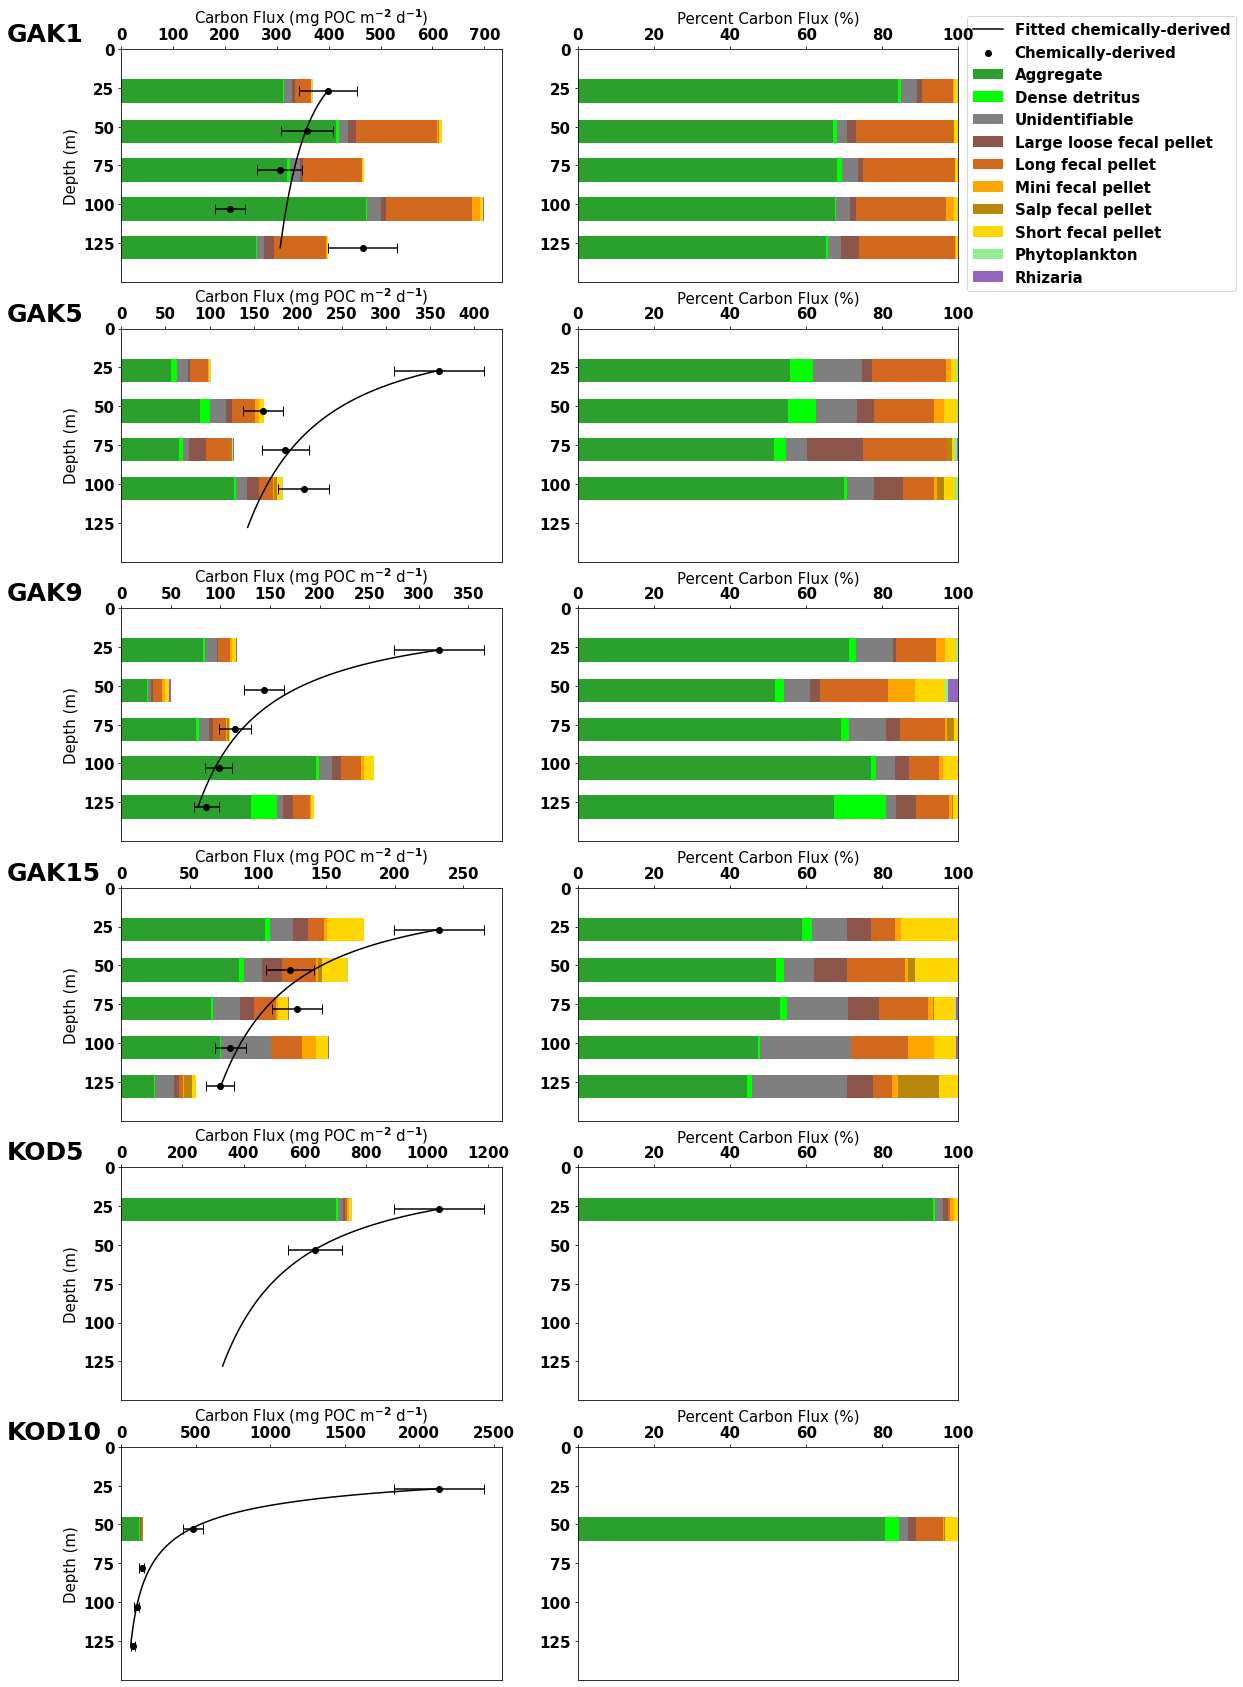

<Figure size 432x288 with 0 Axes>

In [112]:
#one fig C plots
import matplotlib.axes as ax
data = data3

particle_types = ['aggregate', 'dense_detritus','unidentified', 'large_loose_pellet', 'long_fecal_pellet', 'mini_pellet', 'salp_pellet', 'short_pellet','phytoplankton', 'rhizaria']
particle_types_label = ['Aggregate', 'Dense detritus','Unidentifiable', 'Large loose fecal pellet', 'Long fecal pellet', 'Mini fecal pellet', 'Salp fecal pellet', 'Short fecal pellet','Phytoplankton', 'Rhizaria']

index1 = 1
for x3 in ['GAK1', 'GAK5', 'GAK9', 'GAK15', 'KOD5', 'KOD10']: #np.unique(data.station):
    print(x3)
    data_1station = data[data["station"] == x3]
    meta_station = cruise_meta[cruise_meta["Station"] == x3]
    cast = meta_station.Cast.astype(np.int64).reset_index(drop=True)
    cast2 = cast.item()
    df1 = pd.DataFrame()
    depth = list(map(int, np.unique(data_1station.depth)))
    depth.sort()
    for x2 in depth:
        column_names = []
        column_names.append(x2)
        data_1depth = data_1station[(data_1station['depth']==str(x2))]
        matrix = []
        for x4 in particle_types: 
            #double check GAK15, I don't know if it's working or if I need to divide by 2
            if x3 == 'GAK15':
                exec(f"matrix = np.hstack((matrix, sum(data_1depth.{x4}_Cflux)/2))")
            else:
                exec(f"matrix = np.hstack((matrix, sum(data_1depth.{x4}_Cflux)))")
        df = pd.DataFrame(matrix, columns=column_names, index=particle_types)
        df1 = pd.concat([df1, df], axis=1)  
    print(df1)
    print(df1/df1.sum(axis = 0)*100)
        
    font = {'family' : 'helvetica', 'weight' : 'bold', 'size'   : 15}
    plt.rc('font', **font)
    colors = ['tab:green', 'lime','tab:gray', 'tab:brown', 'chocolate','orange','darkgoldenrod','gold','lightgreen','tab:purple' ]
    sub_depth = depth_level[depth_level.Cast == cast2]
    y1 = sub_depth["Depth (m)"].astype(np.int64).reset_index(drop=True)
    x1 = sub_depth["Average POC Flux (mg C m^-2 d^-1)"]
    x1_error = sub_depth["STD error average POC Flux (mg C m^-2 d^-1)"]

    z_shallow = y1[len(y1)-1]
    f_shallow = x1.iloc[-1]
    y = y1.iloc[0:-1].astype(np.int64).reset_index(drop=True)
    x = x1.iloc[0:-1].astype(np.int64).reset_index(drop=True) #[206.435432, 185.8733174, 160.3168873];
    
    def poc_attenuation(b, f_shallow, z_shallow, x,y):
        f_est = []
        for x30 in range(0,len(x)):
            f_est.append(f_shallow * (y[x30]/z_shallow)**(-b))
        residuals=np.log10(x) - np.log10(f_est)[:,0]
        this=sum(residuals**2)
        #print(this)
        #print(b)
        return this#, pi
    x0 = [1]
    sol = optimize.minimize(poc_attenuation, x0, args= (f_shallow, z_shallow, x,y))
    #print(sol)
    print(x3)
    print(sol.x)
    
    #POC_flux = np.zeros(len(y1))
    for index in range(0, len(y1)-1):
        f = x[index]
        z = y[index]
        #POC_flux[index] = -np.log10(f/f_shallow)/np.log10(z/z_shallow)
    #b = np.mean(POC_flux)
    b = sol.x
    z = np.arange(z_shallow, 129, 1)
    f_z = f_shallow*(z/z_shallow)**(-b)
    y = depth
    fig2 = plt.figure(2, figsize = (15, 30))
    plt.subplot(len(np.unique(data.station)), 2, index1)
    plt.gca().invert_yaxis()
    plt.gca().xaxis.tick_top()
    plt.ylabel("Depth (m)")
    plt.yticks(np.arange(0, 150, step=25))
    plt.ylim((150, 0))
    #plt.xlabel("Estimated POC Flux (mg C m^-2 d^-1)")
#    exec(f"plt.xlabel('{x3} Carbon Flux (mg POC $m^{-2}$ d$^{-1}$)')")
    plt.xlabel('Carbon Flux (mg POC m$^{-2}$ d$^{-1}$)')

    plt.gca().xaxis.set_label_position('top') 

    index = 0
    bot = np.zeros(len(depth))
    for x in particle_types:
        plt.barh(y, df1.iloc[index, :], left = bot, color = colors[index], height = 15)
        bot = bot + df1.iloc[index, :]
        index = index + 1
    p1 = plt.scatter(x1, y1, c = 'k',zorder=2)
    #plt.errorbar(x1, y1, yerr=None, xerr=x1_error, ecolor='k', capsize = 5,  ls='none')
    plt.errorbar(x1, y1, yerr=None, xerr=x1*rel_unc, ecolor='k', capsize = 5,  ls='none')
    plt.plot(f_z,z,'-',color = 'k')
    #font = {'family' : 'helvetica', 'weight' : 'bold', 'size'   : 12}
    #plt.rc('font', **font)
    limit = plt.gca().get_xlim()
    #print(limit[1])
    exec(f"plt.text(({limit[1]}-({limit[1]*1.3})), -5, '{x3}', dict(size=25))")
    if 'GAK1' in x3:
        legend = plt.legend(['Fitted chemically-derived', 'Chemically-derived'] + particle_types_label, bbox_to_anchor=(1.95, 0.5, 1., .102), loc='right')
    if 'GAK15' in x3:
        legend.remove()
    #exec(f"plt.savefig(f'C:/Users/Stephanie/GIT/NGA_particles_flux_publication/Plots/Particle_types_trap_fitted_{x3}.png', dpi = 300, bbox_inches = 'tight')")

    #Percentage of types
    plt.subplot(len(np.unique(data.station)), 2, index1+1)
    font = {'family' : 'helvetica', 'weight' : 'bold', 'size'   : 15}
    plt.rc('font', **font)
    plt.gca().invert_yaxis()
    plt.gca().xaxis.tick_top()
    #plt.ylabel("Depth (m)")
    plt.yticks(np.arange(0, 150, step=25))
    plt.ylim((150, 0))
    plt.xlim((0, 100))
    exec(f"plt.xlabel('Percent Carbon Flux (%)')")
    plt.gca().xaxis.set_label_position('top') 
    index = 0
    bot = np.zeros(len(depth))
    for x in particle_types:
        plt.barh(y, df1.iloc[index, :]/df1.sum(axis = 0)*100, left = bot, color = colors[index], height = 15)
        bot = bot + df1.iloc[index, :]/df1.sum(axis = 0)*100
        index = index + 1
    font = {'family' : 'helvetica', 'weight' : 'bold', 'size'   : 12}
    plt.rc('font', **font)
    #leg = plt.legend(particle_types, bbox_to_anchor=(0.53, 0.41, 1., .102), loc='right')
    del df1
    del df
    index1 = index1 + 2

exec(f"plt.savefig(f'D:/GIT/NGA_particles_flux_publication/Plots/Particle_types_percent_all.png', dpi = 300, bbox_inches = 'tight')")
plt.show()
plt.clf()